# 2. Stage  Two - Data Understanding <a class="anchor"></a>

This project utilizes the Wine Quality dataset from the UCI Machine Learning Repository containing 1,599 red and 4,898 white Portuguese wine samples. The data is provided as two clean CSV files (winequality-red.csv, winequality-white.csv) with identical schemas and no missing values.

Each sample is described by 11 physicochemical input variables and a single sensory quality score rated on a scale of 0 to 10. The input features are:
* fixed acidity
* volatile acidity 
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

The dataset was originally published by Cortez et al. (2009). This dataset is now a standard machine learning benchmark for classification tasks due to its real-world applicability and rich feature set. <br>

The dataset can be found in -
https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/bike-sharing-UCI-275.csv

In [1383]:
# Import Libraries Required
!pip3 -q install modin
!pip3 -q install matplotlib
!pip3 -q install numpy
!pip3 -q install seaborn
!pip3 -q install plotly
!pip3 -q install wget
!pip3 -q install imbalanced-learn
!pip3 -q install scikit-learn
!pip3 -q install lime
!pip3 -q install shap

In [1384]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [1385]:
!mkdir -p dataset # create a directory to store the dataset files

# download the files from the URL to the dataset directory
!wget -q -O dataset/bike-sharing-UCI-275.csv "https://raw.githubusercontent.com/Arifuzzaman-Munaf/dataset/main/bike-sharing-UCI-275.csv"

In [1386]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_colwidth", 100)

# load the dataset
df = pd.read_csv("dataset/bike-sharing-UCI-275.csv")

## 2.2 Describe Data <a class="anchor"></a>

In [1387]:
# Display the first 10 rows of the dataset
df.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  2011-01-09       1   0     1        0        0           0   
9       10  2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   
6           2  0.196522  0.208839  0.498696   0.168726     148        1362   
7           2  0.165000  0.162254  0.535833   0.266804      68         891   
8           1  0.138333  0.116175  0.434167   0.361950      54         768   
9           1  0.150833  0.150888  0.482917   0.223267      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [1388]:
df.tail(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
721      722  2012-12-22       1   1    12        0        6           0   
722      723  2012-12-23       1   1    12        0        0           0   
723      724  2012-12-24       1   1    12        0        1           1   
724      725  2012-12-25       1   1    12        1        2           0   
725      726  2012-12-26       1   1    12        0        3           1   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
721           1  0.265833  0.236113  0.441250   0.407346     205        1544   
722           1  0.245833  0.259471  0.515417   0.133083     408        1379   
723           2  0.231304  0.258900  0.791304   0.077230     174         746   
724           2  0.291304  0.294465  0.734783   0.168726     440         573   
725           3  0.243333  0.220333  0.823333   0.316546       9         432   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
721  1749  
722  1787  
723   920  
724  1013  
725   441  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [1389]:
# show the columns of the dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1390]:
rows, columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 731 rows and 16 columns.


In [1391]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [1392]:
#Rename the columns better understanding the data
df.rename(columns={'instant':'record_id',
                    'dteday':'datetime',
                    'yr':'year',
                    'mnth':'month',
                    'weathersit':'weather_condition',
                    'hum':'humidity',
                    'cnt':'bike_count'}, 
                    inplace=True)

# Display the first 10 rows of the dataset
df.head(5)

record_id    datetime  season  year  month  holiday  weekday  workingday  \
0          1  2011-01-01       1     0      1        0        6           0   
1          2  2011-01-02       1     0      1        0        0           0   
2          3  2011-01-03       1     0      1        0        1           1   
3          4  2011-01-04       1     0      1        0        2           1   
4          5  2011-01-05       1     0      1        0        3           1   

   weather_condition      temp     atemp  humidity  windspeed  casual  \
0                  2  0.344167  0.363625  0.805833   0.160446     331   
1                  2  0.363478  0.353739  0.696087   0.248539     131   
2                  1  0.196364  0.189405  0.437273   0.248309     120   
3                  1  0.200000  0.212122  0.590435   0.160296     108   
4                  1  0.226957  0.229270  0.436957   0.186900      82   

   registered  bike_count  
0         654         985  
1         670         801  
2        1229        1349  
3        1454        1562  
4        1518        1600

In [1393]:
# display the descriptive statistics of the dataset 
# transpose the dataframe to display the statistics in a more readable format
df.describe(include="number").T

count         mean          std        min          25%  \
record_id          731.0   366.000000   211.165812   1.000000   183.500000   
season             731.0     2.496580     1.110807   1.000000     2.000000   
year               731.0     0.500684     0.500342   0.000000     0.000000   
month              731.0     6.519836     3.451913   1.000000     4.000000   
holiday            731.0     0.028728     0.167155   0.000000     0.000000   
weekday            731.0     2.997264     2.004787   0.000000     1.000000   
workingday         731.0     0.683995     0.465233   0.000000     0.000000   
weather_condition  731.0     1.395349     0.544894   1.000000     1.000000   
temp               731.0     0.495385     0.183051   0.059130     0.337083   
atemp              731.0     0.474354     0.162961   0.079070     0.337842   
humidity           731.0     0.627894     0.142429   0.000000     0.520000   
windspeed          731.0     0.190486     0.077498   0.022392     0.134950   
casual             731.0   848.176471   686.622488   2.000000   315.500000   
registered         731.0  3656.172367  1560.256377  20.000000  2497.000000   
bike_count         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                           50%          75%          max  
record_id           366.000000   548.500000   731.000000  
season                3.000000     3.000000     4.000000  
year                  1.000000     1.000000     1.000000  
month                 7.000000    10.000000    12.000000  
holiday               0.000000     0.000000     1.000000  
weekday               3.000000     5.000000     6.000000  
workingday            1.000000     1.000000     1.000000  
weather_condition     1.000000     2.000000     3.000000  
temp                  0.498333     0.655417     0.861667  
atemp                 0.486733     0.608602     0.840896  
humidity              0.626667     0.730209     0.972500  
windspeed             0.180975     0.233214     0.507463  
casual              713.000000  1096.000000  3410.000000  
registered         3662.000000  4776.500000  6946.000000  
bike_count         4548.000000  5956.000000  8714.000000

In [1394]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          731 non-null    int64  
 1   datetime           731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  bike_count         731 non-null    int64  
dtypes: float64(4), int64(

In [1395]:
# display the first 30 rows of the dataset
# use the light_palette function to create a color map
# use the style.background_gradient function to apply the color map to the dataframe
cm = sns.light_palette("green", as_cmap=True)
df.head(30).style.background_gradient(cmap=cm) 

## 2.3 Verify Data Quality <a class="anchor"></a>
## 2.3.1 Missing Values
In previous steps, while checking data info, it was visible that the dataset contains no missing or null values. But there will be another programmatic check for further confirmation.

In [1396]:
print("Total number of missing values in each column:")

# display the total number of missing values in the dataset
pd.DataFrame(df.isnull().sum(), columns=["total"])

Total number of missing values in each column:


total
record_id              0
datetime               0
season                 0
year                   0
month                  0
holiday                0
weekday                0
workingday             0
weather_condition      0
temp                   0
atemp                  0
humidity               0
windspeed              0
casual                 0
registered             0
bike_count             0

<Axes: >

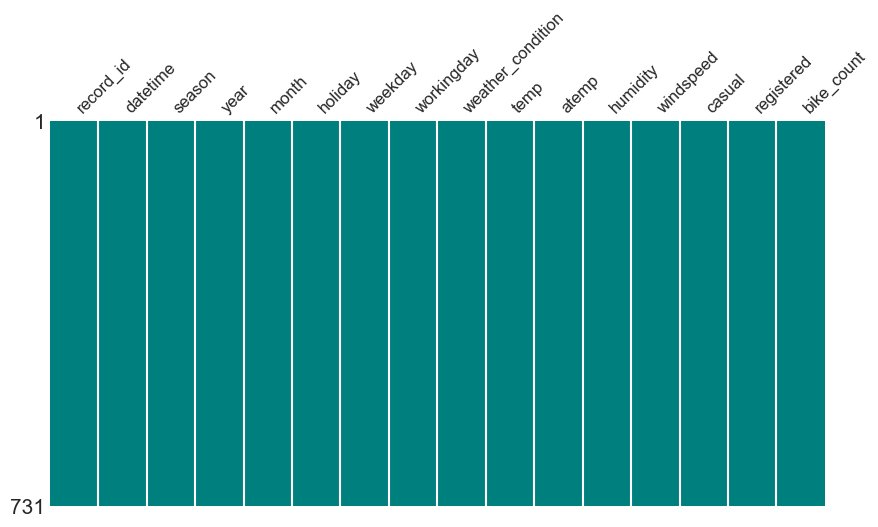

In [1397]:
# missingno matrix plot for the dataset
# shows the missing values in the dataset using bar chart
msno.matrix(df,labels=[df.columns],fontsize=12, color=(0.0, 0.5, 0.5), figsize=(10,5),sparkline=False)

The bar chart displays the count of non-null values for each feature in the dataset, showing that all columns contain complete data with 731 entries each. This indicates that the dataset is clean with no missing values across any of the variables, ensuring reliability for further preprocessing and analysis.

## 2.3.2 Data Type verification
The Datatype Verification process ensures if each column in the Bike Sharing dataset is aligned with its intended format before further analysis. First, the actual data types are compared against a predefined schema and any mismatches are reported clearly. For example, the script checks that dteday is a proper datetime, categorical variables like season or holiday are integers, and numerical measures such as temp, atemp, hum, and windspeed are floats. Once discrepancies are identified, the script automatically corrects them by coercing values into the desired types, safely handling errors and finalizing integers where possible. After corrections, the updated schema is displayed, confirming that the dataset is now clean, consistent, and ready for reliable analysis.

In [1398]:
from pandas.api.types import (
    is_integer_dtype,
    is_float_dtype,
    is_datetime64_any_dtype,
)

# Define the expected data types for each column in the dataset
desired_dtypes = {
    "datetime": "datetime64[ns]",    # Timestamp when rental occurred
    "season": "int64",               # Season of year (1-4)
    "year": "int64",                 # Year (0=2011, 1=2012)
    "month": "int64",                # Month (1-12)
    "holiday": "int64",              # Holiday flag (0/1)
    "weekday": "int64",              # Day of week (0-6)
    "workingday": "int64",           # Working day flag (0/1)
    "weather_condition": "int64",              # Weather category (1-4)
    "temp": "float64",               # temperature in Celsius
    "atemp": "float64",              # feeling temperature in Celsius
    "humidity": "float64",           # humidity percentage
    "windspeed": "float64",          # wind speed
    "casual": "int64",               # Count of casual users
    "registered": "int64",           # Count of registered users
    "bike_count": "int64",           # Total rental count
    "record_id": "int64",            # Unique row identifier
}

def canonical_dtype(dtype_obj) -> str:
    """
    This function takes a pandas/numpy dtype object and returns a standardized string 
    representation to enable reliable dtype comparisons.

    Returns:
        str: The standardized string representation of the dtype
    """
    if is_datetime64_any_dtype(dtype_obj):
        return "datetime64[ns]"
    if is_integer_dtype(dtype_obj):
        return "int64"
    if is_float_dtype(dtype_obj):
        return "float64"
    return str(dtype_obj)

# Compare actual vs desired data types
# Create a dictionary of actual data types for each column
actual_canon = {col: canonical_dtype(dt) for col, dt in df.dtypes.to_dict().items()}

# Create a dictionary of mismatches between actual and desired data types
mismatches = {
    col: {"expected": exp, "actual": actual_canon.get(col, "MISSING")}
    for col, exp in desired_dtypes.items()
    if actual_canon.get(col) != exp
}

print("Column-wise data type verification report:")
if mismatches:
    for col, info in mismatches.items():
        print(f"Column '{col}': expected {info['expected']}, got {info['actual']}")
else:
    print("All columns match desired datatypes")

print("-" * 50)

if mismatches:
    # Fix mismatches between actual and desired data types
    for col, info in mismatches.items():
        # Get the expected data type for the column
        target = info["expected"]
        # Convert datetime64[ns] to datetime
        if target == "datetime64[ns]":
            df[col] = pd.to_datetime(df[col], errors="coerce")
        # Convert integer types to Int64
        elif target.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")
            # If no nulls, convert to plain int64
            if df[col].isna().sum() == 0:
                df[col] = df[col].astype("int64")
        # Convert float types to float64
        elif target.startswith("float"):    
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("float64")


        print("Column-wise data type verification report after correction:")
        print(df.dtypes)


Column-wise data type verification report:
Column 'datetime': expected datetime64[ns], got object
--------------------------------------------------
Column-wise data type verification report after correction:
record_id                     int64
datetime             datetime64[ns]
season                        int64
year                          int64
month                         int64
holiday                       int64
weekday                       int64
workingday                    int64
weather_condition             int64
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
bike_count                    int64
dtype: object


The datatype verification process revealed that the datetime column was initially stored as an object instead of the required datetime64[ns], which could have caused issues in time-series analysis. After applying the correction, all columns were successfully aligned with their expected datatypes. This ensures the dataset is now clean, consistent and ready for accurate downstream analysis under the CRISP-DM framework.

For further data validation, we define the following input lists:
- Categorical inputs: ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

- Interval (continuous) inputs: ['temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual']
These lists will be used in subsequent steps for range and domain logic checks.

`Note`

Categorical features need to be converted into One-hot encoding label because most machine learning models cannot directly interpret categorical variables represented as integers, since they may mistakenly assume an ordinal relationship between the values. By converting each category into a separate binary feature (0 or 1), one-hot encoding removes this false ordering, ensures equal treatment of all categories, and allows models to correctly capture the influence of categorical variables on predictions.




In [1399]:
interval_inputs = ['temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual']
categorical_inputs = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
time_series_inputs = ['datetime']

## 2.3.3 Duplicate Record Verification
In this section, duplicate records within the dataset are checked to ensure data integrity. The process involves counting the number of completely duplicated rows and verifying that the record_id column contains only unique values. Since record_id serves as the primary identifier for each entry, confirming its uniqueness guarantees that no observation is duplicated or misrepresented. This verification step is essential to maintain dataset reliability, prevent bias in analysis and ensure that each record contributes only once to modeling and decision-making.

In [1400]:
# count the number of duplicate rows
dup_rows = df.duplicated().sum()

# check if the record_id is unique
record_id_unique = df["record_id"].is_unique

# print the number of duplicate rows and if the record_id is unique
print(f"Duplicate rows: {dup_rows}")
print(f"record_id is unique: {record_id_unique}")

Duplicate rows: 0
record_id is unique: True


## 2.3.4 Verify Ranges and Domain Logic
In this step, categorical ranges and business rules were validated to ensure the dataset’s integrity. Specifically:

- Categorical validation: Checked season, year, month, holiday, weekday, workingday, and weather against their allowed sets to confirm no invalid category codes exist.

- Bike count consistency: Verified that bike_count always equals the sum of casual and registered riders, with mismatches flagged if found.

Together, these verifications confirm that categorical values are within expected ranges and  the dataset maintains logical consistency for further analysis.

### Range Verification - Categorical

In [1401]:
# Allowed value sets for categorical inputs
allowed_values = {
    "season": {1, 2, 3, 4},      # Season of year (1-4)
    "year": {0, 1},              # Year (0=2011, 1=2012)
    "month": {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, # Month (1-12)
    "holiday": {0, 1},           # Holiday flag (0/1)
    "weekday": {0, 1, 2, 3, 4, 5, 6}, # Day of week (0-6)
    "workingday": {0, 1},          # Working day flag (0/1)
    "weather_condition": {1, 2, 3, 4},       # Weather category (1-4)
}

# check if the values in the dataset are within the allowed sets and store invalid ranges
invalid_ranges = {}
for col, allowed_values in allowed_values.items():
    invalid_values = set(df[col]) - allowed_values
    if invalid_values:
        invalid_ranges[col] = invalid_values

# print the invalid ranges
if invalid_ranges:
    print("Invalid ranges found in the columns:")
    for col, invalid_values in invalid_ranges.items():
        print(f"{col}: {invalid_values}")
else:
    print("No invalid ranges found in the categorical columns")

No invalid ranges found in the categorical columns


In [1402]:
def feature_range_summary(df, feature_cols):
    """
    Returns a DataFrame summarizing min, max, and range for each feature.
    args:
        df: pandas DataFrame
        feature_cols: list of interval features column names
    returns:
        pandas DataFrame with feature column names, min, max, and range
    """
    feature_max = df[feature_cols].max()
    feature_min = df[feature_cols].min()
    feature_ranges = feature_max - feature_min

    summary = pd.DataFrame({
        "Feature": feature_cols,
        "Min": feature_min.values,
        "Max": feature_max.values,
        "Range": feature_ranges.values
    })
    return summary

feature_range_summary(df, interval_inputs)

Feature        Min          Max        Range
0        temp   0.059130     0.861667     0.802537
1       atemp   0.079070     0.840896     0.761826
2    humidity   0.000000     0.972500     0.972500
3   windspeed   0.022392     0.507463     0.485071
4  registered  20.000000  6946.000000  6926.000000
5      casual   2.000000  3410.000000  3408.000000

It is clearly visible that some features such as temp, atemp, humidity, and windspeed already fall within a normalized [0–1] range, while others like registered and casual span ranges in the thousands. This creates a significant imbalance in feature scales, where variables with large ranges can dominate model learning and reduce the contribution of smaller-scale features. So, scaling is clearly required to ensure fair representation of all features. Among the available methods, MinMax scaling is the most suitable choice because it brings all features into a consistent [0–1] range, aligning the naturally scaled variables with those on a larger scale, while preserving the original distribution patterns.

### Domain Logic Verification

In [1403]:
# total bike count should equal sum of casual and registered riders
total_match = (df["bike_count"] == df["casual"] + df["registered"]).all()
mismatch_count = (~(df["bike_count"] == df["casual"] + df["registered"])).sum()

print(f"Total bike count matches sum of casual and registered riders: {total_match}")
if not total_match:
    print(f"Found {mismatch_count} records with mismatched totals")
    mismatches = df[df["bike_count"] != df["casual"] + df["registered"]].head() 
    if not mismatches.empty:
        print("Sample of mismatches:")
        print(mismatches[["bike_count", "casual", "registered"]])


Total bike count matches sum of casual and registered riders: True


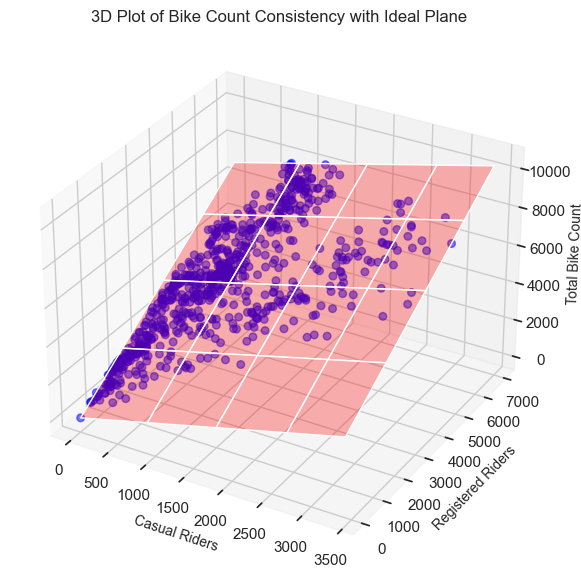

In [1404]:
# Initialize 3D plot
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d")

# Sample data points for better performance while maintaining visual representation
# Using random sampling to avoid bias and reduce memory/computation requirements
sample_size = min(1000, len(df))  # Cap sample size at 1000 points
sample_idx = np.random.choice(len(df), sample_size, replace=False)

ax.scatter(df["casual"].iloc[sample_idx], 
          df["registered"].iloc[sample_idx],
          df["bike_count"].iloc[sample_idx],
          c="blue", alpha=0.5, label="Data Points",
          # Add s parameter for consistent point size
          s=30)

# Generate reference plane showing ideal relationship where total = casual + registered
casual_min, casual_max = df["casual"].min(), df["casual"].max()
registered_min, registered_max = df["registered"].min(), df["registered"].max()
grid_points = 20  # Reduced grid density for better performance

# Create mesh grid for reference plane
casual_grid = np.linspace(casual_min, casual_max, grid_points)
registered_grid = np.linspace(registered_min, registered_max, grid_points)
casual_mesh, registered_mesh = np.meshgrid(casual_grid, registered_grid)
bike_count_mesh = casual_mesh + registered_mesh  # Ideal relationship plane

ax.plot_surface(casual_mesh, registered_mesh, bike_count_mesh,
               color="red", alpha=0.3, 
               rstride=5, cstride=5,  
               label="Ideal Plane: Total = Casual + Registered")

# Set descriptive labels and title
ax.set_xlabel("Casual Riders", fontsize=10)
ax.set_ylabel("Registered Riders", fontsize=10)
ax.set_zlabel("Total Bike Count", fontsize=10)
ax.set_title("3D Plot of Bike Count Consistency with Ideal Plane")

plt.show()

The verification process confirmed that the dataset is clean, valid, and logically consistent. First, all categorical variables (season, year, month, holiday, weekday, workingday, and weather) were checked against their predefined domains and no invalid values were detected, ensuring categorical integrity. Second, the consistency check between bike_count and the sum of casual and registered riders returned True, confirming that total counts are accurately computed without mismatches across the dataset. Finally, the 3D scatter plot with an ideal reference plane visually demonstrated this relationship, where all data points align perfectly with the plane defined by:

Bike Count = Casual + Registered

This strong alignment validates the internal logic of the dataset, providing confidence that the data is both accurate and ready for exploratory data analysis.

## 2.3.5 Data Inconsistency

### Negative Entries

In [1405]:
# Check for negative values in each column
pd.DataFrame(df[df.select_dtypes(include=['int64', 'float64']).columns].lt(0).sum(), columns=["total"])

total
record_id              0
season                 0
year                   0
month                  0
holiday                0
weekday                0
workingday             0
weather_condition      0
temp                   0
atemp                  0
humidity               0
windspeed              0
casual                 0
registered             0
bike_count             0

The analysis of the dataset for negative values across all numeric columns confirmed that there are no negative entries present. This indicates that all recorded values such as counts, temperatures and other measurements are valid within expected ranges. The absence of negative values supports the integrity of the data and suggests that there are no data entry errors or logical inconsistencies related to value sign which is essential for reliable downstream analysis.

### Holiday Vs Working Day Conflict

In [1406]:
# Check for logical conflicts between holiday and workingday columns
# A day should not be both a holiday and a working day
holiday_conflicts = df[(df["holiday"] == 1) & (df["workingday"] == 1)]
print("Columns with Holiday/Workingday conflicts:", len(holiday_conflicts))

Columns with Holiday/Workingday conflicts: 0


There was no sign of inconsistency in logic as shown the output but there would a visual diagram for further confirmation of this data logic.  

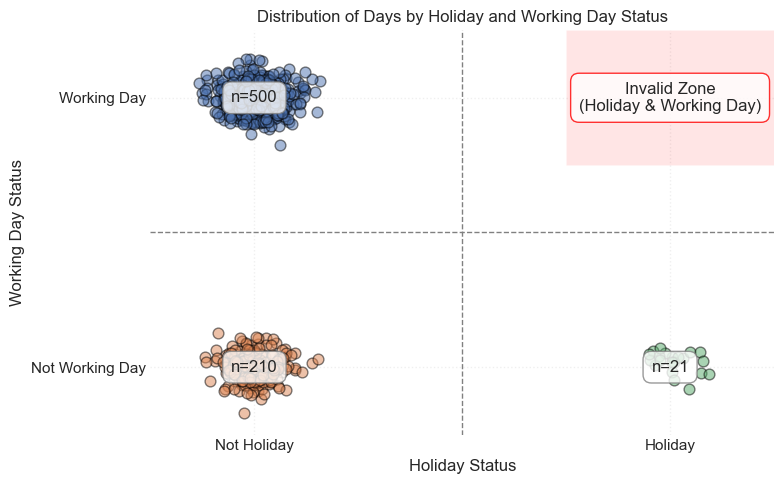

In [1407]:
# Create visualization of holiday vs workingday
fig, ax = plt.subplots(figsize=(8, 5))

# Define point configurations
points = [
    ((df['holiday'] == 0) & (df['workingday'] == 1), (0.3, 0.7)),
    ((df['holiday'] == 0) & (df['workingday'] == 0), (0.3, 0.3)),
    ((df['holiday'] == 1) & (df['workingday'] == 0), (0.7, 0.3))
]

# Plot points with jitter
for mask, pos in points:
    data = df[mask]
    # Add jitter to prevent point overlap
    x = pos[0] + np.random.normal(0, 0.02, len(data))
    y = pos[1] + np.random.normal(0, 0.02, len(data))
    
    # Plot points with jitter
    ax.scatter(x, y, s=60, alpha=0.5, edgecolor='black', linewidth=1)
    ax.annotate(f'n={len(data)}', xy=pos, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Mark invalid region (Holiday & Working Day)
invalid_zone = plt.Rectangle((0.6, 0.6), 0.2, 0.2, fc='red', alpha=0.1)
ax.add_patch(invalid_zone)
ax.annotate('Invalid Zone\n(Holiday & Working Day)', 
           xy=(0.7, 0.7), ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='red', alpha=0.8))

# Add separator lines to the plot
# Vertical separator between Not Holiday (0.3) and Holiday (0.7)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
# Horizontal separator between Not Working Day (0.3) and Working Day (0.7)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

# Customize plot
ax.set_xlim(0.2, 0.8) # set the x-axis limits
ax.set_ylim(0.2, 0.8) # set the y-axis limits
ax.set_xlabel('Holiday Status')
ax.set_ylabel('Working Day Status')
ax.set_xticks([0.3, 0.7])
ax.set_yticks([0.3, 0.7])
ax.set_xticklabels(['Not Holiday', 'Holiday'])
ax.set_yticklabels(['Not Working Day', 'Working Day'])
ax.grid(True, linestyle=':', alpha=0.3) # add grid lines
ax.set_title('Distribution of Days by Holiday and Working Day Status')

plt.tight_layout()
plt.show()

Findings from the plot:
- The majority of records (n=500) fall in the Not Holiday & Workingday group representing typical weekdays.
- n=210 records fall in the Not Holiday & Not Workingday group corresponding to weekends.
- n=21 records fall in the Holiday & Not Workingday group representing actual holidays.
- Importantly, the conflict zone (Holiday = 1 and Workingday = 1) is highlighted in red, but it contains 0 records, confirming that no day is incorrectly marked as both a holiday and a working day.

## 2.3.6 Outliers

Outliers were initially detected using the Modified Z-Score method, which is a robust alternative to the standard Z-score. Instead of relying on the mean and standard deviation (which are sensitive to extreme values), this approach uses the median and the Median Absolute Deviation (MAD) to measure data spread. For each feature, the modified Z-score was calculated as

$$
\mathrm{MZS} = 0.6745 \times \frac{x_i - \mathrm{median}}{\mathrm{MAD}}
$$

Any observation with |MZS| > 3.5 was flagged as an outlier, while the rest were considered normal. This method provides a more reliable way of detecting anomalies in skewed or non-normally distributed data.


In [1408]:
def modified_z_score(feature):
    """
    Efficiently compute the modified Z-score for a given pandas Series.

    Args:
        feature: pandas Series of a feature

    Returns:
        np.ndarray: Modified Z-score values for the input feature.
    """
    # Compute the median and Median Absolute Deviation (MAD)
    median = np.median(feature)
    mad = np.median(np.abs(feature - median))

    # If MAD is zero, return zeros to prevent division by zero
    if mad == 0:
        return np.zeros(feature.shape, dtype=float)

    # Vectorized calculation of the modified Z-score
    return 0.6745 * (feature - median) / mad


def outliers_count(df, features):
    """
    Count the number of outliers in the dataset for each feature.

    Args:
        df: pandas DataFrame containing the data
        features: list of feature names

    Returns:
        pandas DataFrame containing the number of outliers for each feature
    """
    # Compute the modified Z-score for all specified features in a vectorized manner
    mzs = df[features].apply(modified_z_score, axis=0)

    # Identify outliers using the standard threshold (|Z| > 3.5)
    outlier_counts = (np.abs(mzs) > 3.5).sum(axis=0)

    return outlier_counts


In [1409]:
outlier_counts = outliers_count(df, interval_inputs)

pd.DataFrame(outlier_counts, columns=['Outlier Counts'])

Outlier Counts
temp                     0
atemp                    0
humidity                 1
windspeed                2
registered               0
casual                  14

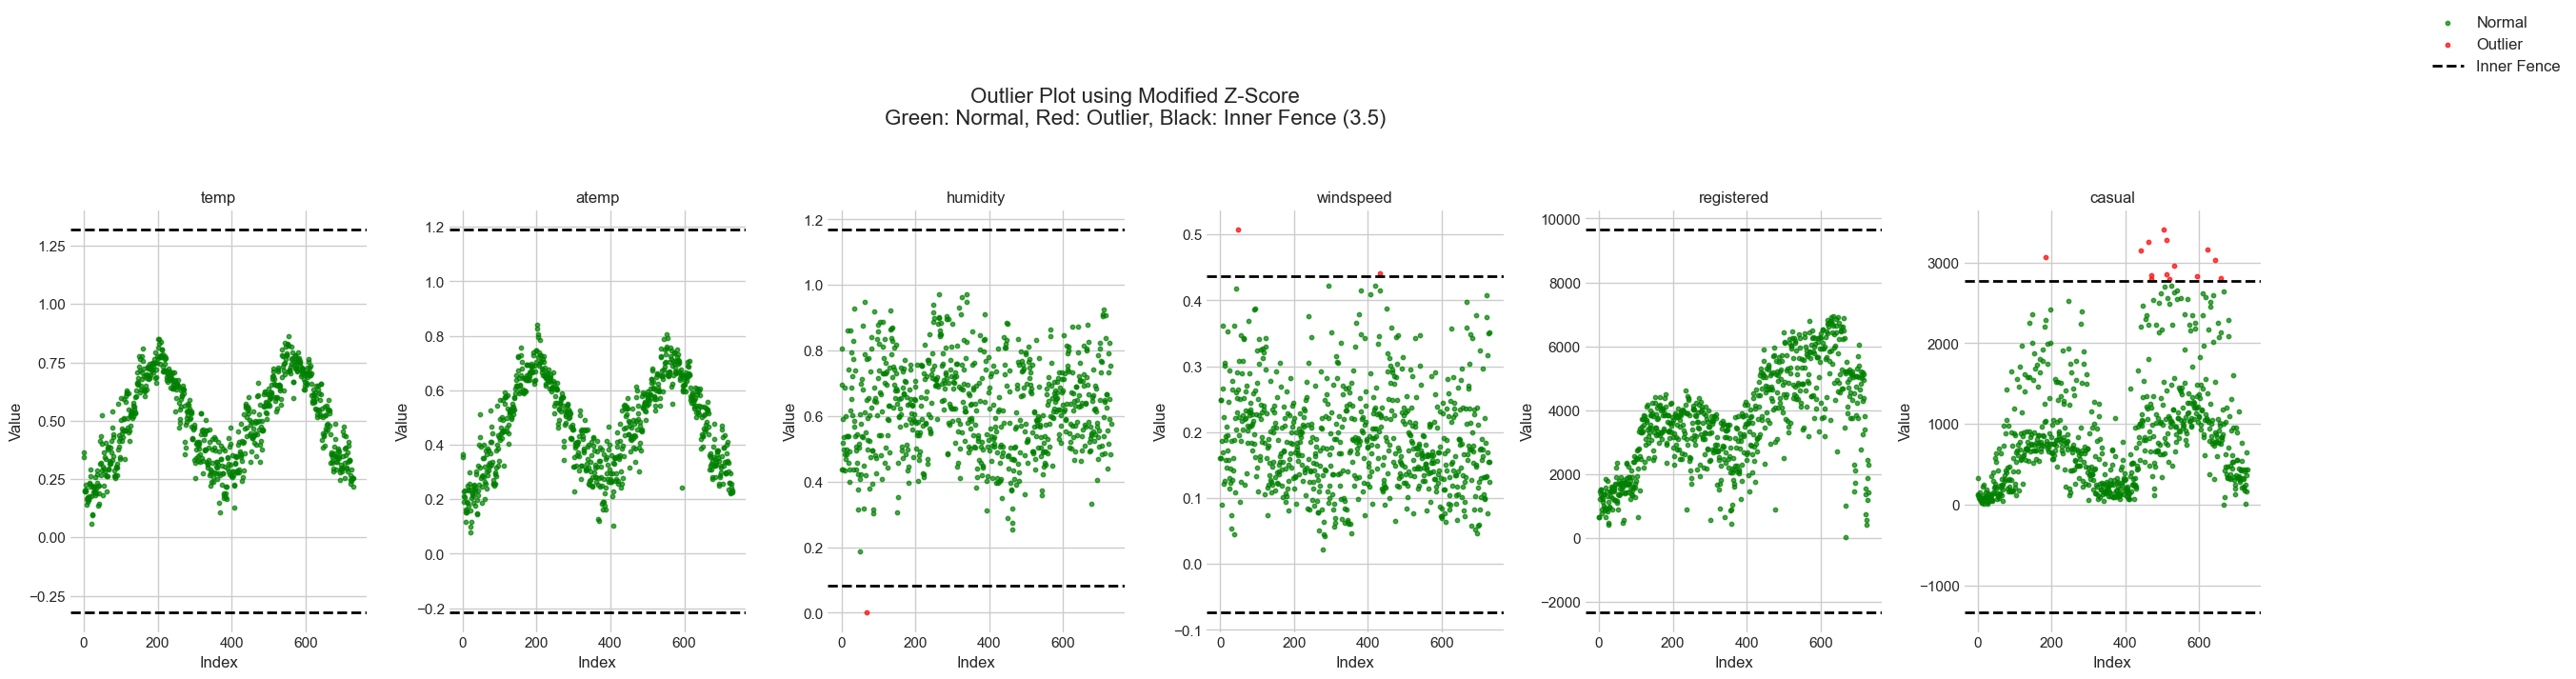

In [1410]:
def plot_outliers(df, features):
    """
    Plot the outliers for each feature in the dataset.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        features (list): List of feature names to plot.
    """
    n_features = len(features)
    fig, axes = plt.subplots(1, n_features, figsize=(4 * n_features, 6), squeeze=False)
    axes = axes[0]

    # Precompute medians and MADs for all features
    medians = df[features].median()
    mads = df[features].sub(medians).abs().median()

    # Precompute modified Z-scores for all features at once
    mzs_df = df[features].apply(modified_z_score, axis=0)

    for idx, feature in enumerate(features):
        ax = axes[idx]
        values = df[feature].values
        median = medians[feature]
        mad = mads[feature] if mads[feature] != 0 else 1e-8  # Prevent division by zero

        # Identify outliers using the modified Z-score threshold
        mzs = mzs_df[feature].values
        outlier_mask = np.abs(mzs) > 3.5

        # Plot normal and outlier points
        ax.scatter(df.index[~outlier_mask], values[~outlier_mask], color='green', s=10,
                   label='Normal' if idx == 0 else None, alpha=0.7)
        ax.scatter(df.index[outlier_mask], values[outlier_mask], color='red', s=10,
                   label='Outlier' if idx == 0 else None, alpha=0.7)

        # Calculate and plot inner fences (±3.5 MAD/0.6745)
        inner_fence = 3.5 * (mad / 0.6745)
        ax.axhline(median + inner_fence, color='black', linestyle='--', linewidth=2,
                   label='Inner Fence' if idx == 0 else None)
        ax.axhline(median - inner_fence, color='black', linestyle='--', linewidth=2)

        ax.set_title(feature, fontsize=12)
        ax.set_xlabel("Index")
        ax.set_ylabel("Value")

    # Consolidate unique legend entries across all axes
    handles, labels = [], []
    for ax in axes:
        h, l = ax.get_legend_handles_labels()
        for handle, label in zip(h, l):
            if label and label not in labels:
                handles.append(handle)
                labels.append(label)
    if handles:
        fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.13, 1.2), fontsize=12)
    fig.suptitle(
        "Outlier Plot using Modified Z-Score\n"
        "Green: Normal, Red: Outlier, Black: Inner Fence (3.5)",
        y=1.05, fontsize=16
    )
    plt.tight_layout()
    plt.show()

# Plot outliers for the specified interval features
plot_outliers(df, interval_inputs)


From the table record and plot, it was clearly notable that features such as 'temp', ‘atemp’ , ‘registered’ contained no outliers according to modified z-score. Column ‘casual’ had the highest number of outliers(only 14). ‘humidity’ and ‘windspeed’ tended to have negligible amount of outliers. To identify common outliers across atleast 2 features, a outlier detection process was employed in next cell.

In [1411]:
def detect_outliers(df, features, threshold=3.5, min_features=2):
    """
    Return a DataFrame containing all rows that are outliers
    based on modified z-score

    Args:
        df (pd.DataFrame): DataFrame to check.
        features (list): List of numeric feature names.
        threshold (float): Modified z-score threshold for outlier detection.
        min_features (int): Minimum number of features a row must be an outlier in to be flagged.

    Returns:
        pd.DataFrame: Rows where the number of outlier features exceeds min_features-1.
    """
    # Vectorized computation of modified z-scores for all features
    z_scores = np.abs(np.column_stack([modified_z_score(df[col].values) for col in features]))
    outlier_mask = z_scores > threshold

    # Count outlier features per row
    outlier_counts = outlier_mask.sum(axis=1)

    # Select rows with outliers in at least min_features columns
    return df.loc[outlier_counts >= min_features].copy()


outlier_rows = detect_outliers(df, interval_inputs)
print(f"Number of rows with outliers in more than 2 features: {len(outlier_rows)}")

Number of rows with outliers in more than 2 features: 0


So modified z-score analysis revealed that there were no outliers across interval inputs and no outlier clipping is required.

A second verification using One-Class Support Vector Machine (OCSVM)  will be performed to further exploration of outliers that modified z-score approach could not reveal. Outliers will detected with a One-Class Support Vector Machine (OCSVM) trained on standardized interval features: temp, atemp, humidity, windspeed, register and casual. Features wil be scaled with StandardScaler to zero mean/unit variance, then an OCSVM with RBF kernel, gamma="auto", and nu=0.05 (≈5% expected anomalies) wil be fitted to learn the boundary of normal behavior. Predictions (1 = inlier, -1 = outlier) will be stored in df["ocsvm_outlier"] and the total outlier count will be reported.

**Why this method.**
- Unsupervised & robust: Suitable when explicit anomaly labels are unavailable, learning “normal” directly from data.
- Multivariate & non-linear: Captures joint, non-linear relationships among weather and demand variables that univariate z-score/IQR rules can miss.
- Controllable sensitivity: nu provides a principled control over the tolerated fraction of anomalies.

To aid interpretation, pairwise 2D decision boundaries will be plotted for (temp,bike_count), (humidity,bike_count), (windspeed,bike_count), (atemp,bike_count) and so on. For each pair, data will be re-scaled and a lightweight 2D OCSVM was fitted only for visualization, rendering the decision contour (boundary at decision_function=0), shaded normal region and marking inliers vs. outliers. 

In [1412]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Select relevant numeric features for outlier detection
X = df[interval_inputs]

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize One-Class SVM for anomaly detection
# kernel="rbf": radial basis function kernel
# gamma="auto": kernel coefficient set to 1/n_features
# nu=0.05: an upper bound on the fraction of outliers
oc_svm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.05)
oc_svm.fit(X_scaled)  # Fit the model to the scaled data

# Predict anomalies: 1 for inliers, -1 for outliers
preds = oc_svm.predict(X_scaled)
df["ocsvm_outlier"] = preds  # Add predictions to the DataFrame

In [1413]:
# Count outliers
outlier_count = (preds == -1).sum()
print(f"Detected outliers: {outlier_count} out of {len(df)}")

# Show sample outliers
print(df[df["ocsvm_outlier"] == -1][interval_inputs].head())

Detected outliers: 39 out of 731
        temp     atemp  humidity  windspeed  registered  casual
8   0.138333  0.116175  0.434167   0.361950         768      54
21  0.059130  0.079070  0.400000   0.171970         888      93
22  0.096522  0.098839  0.436522   0.246600         836     150
23  0.097391  0.117930  0.491739   0.158330        1330      86
31  0.192174  0.234530  0.829565   0.053213        1313      47


The One-Class SVM model identified 39 outliers out of 731 total records (~5.34%) which were unidentified by modified z-score approach.
These flagged instances represent unusual patterns across weather variables (temp, atemp, humidity, windspeed) and user count(registered, casual) that deviate from the learned distribution of normal conditions.

For example, some detected outliers show high bike counts (e.g., 1416 at index 23 where registered=1330, casual=86) despite relatively moderate weather conditions, while others reflect unusually high humidity or atypical combinations of features. This indicates that the OCSVM is capturing both anomalies and weather-demand mismatches rather than just extreme univariate values.

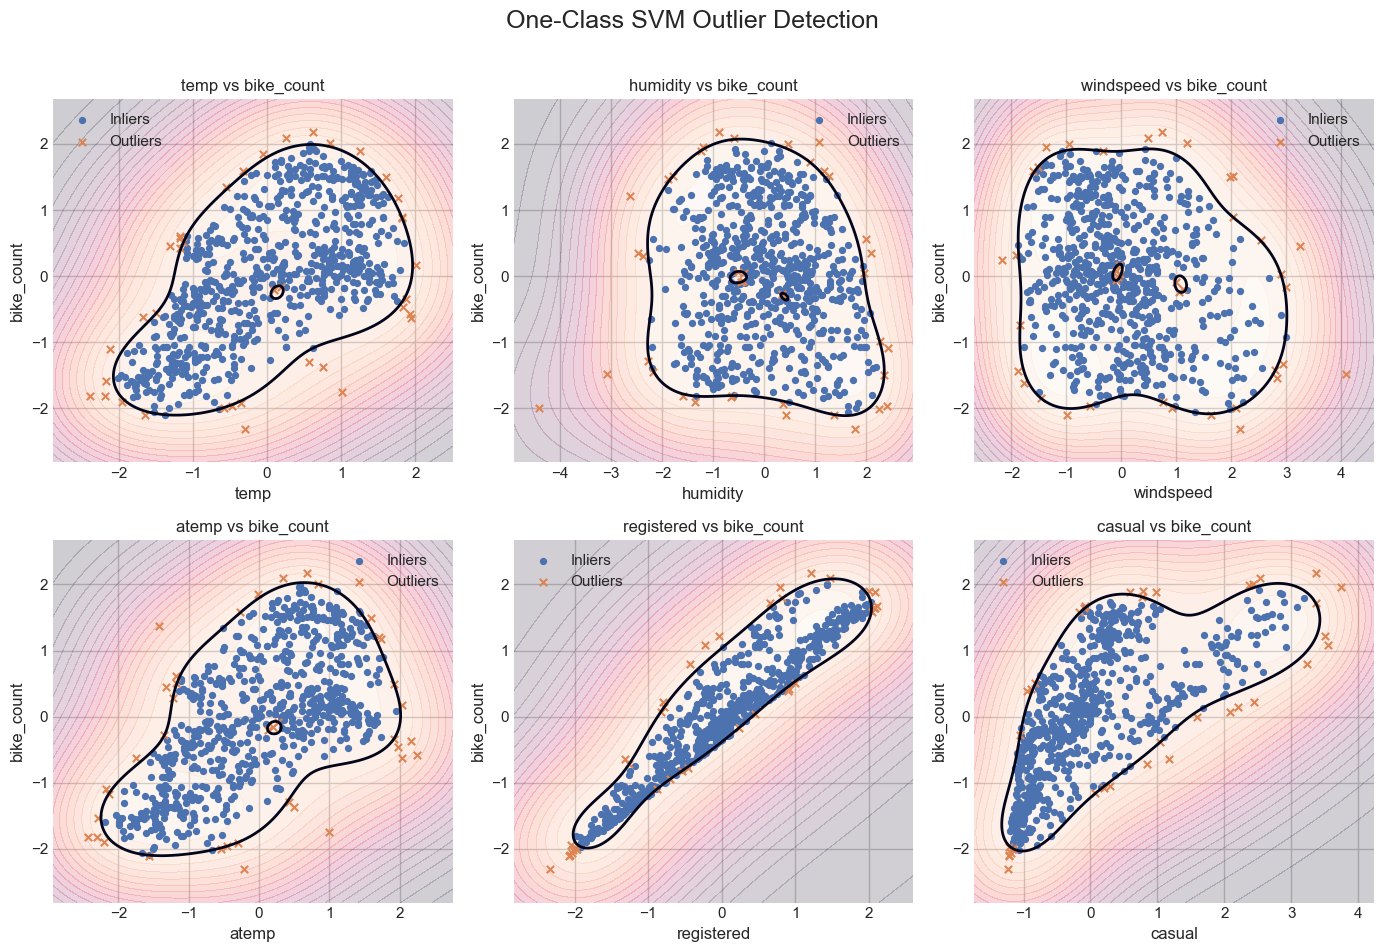

In [1414]:
# Define feature pairs to visualize outlier detection relationships
pairs = [
    ("temp", "bike_count"),
    ("humidity", "bike_count"),
    ("windspeed", "bike_count"),
    ("atemp", "bike_count"),
    ("registered", "bike_count"),
    ("casual", "bike_count")
]

def plot_ocsvm(df, pairs):
    """
    Visualize One-Class SVM outlier detection results for multiple feature pairs side by side.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the features.
        pairs (list of tuple): List of (x_col, y_col) feature pairs to plot.
    """
    # Calculate the number of rows and columns for the subplots
    n = len(pairs)
    ncols = 3
    nrows = -(-n // ncols)  # Ceiling division for number of rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
    axes = axes.flatten()

    # Iterate through each feature pair and plot the SVM decision boundary and outliers
    for idx, (x_col, y_col) in enumerate(pairs):
        ax = axes[idx]
        # Ensure both columns exist in the DataFrame
        if x_col not in df.columns or y_col not in df.columns:
            raise ValueError(f"Columns {x_col} and/or {y_col} not found in DataFrame.")

        # Extract and standardize the two features for SVM
        X_pair = df[[x_col, y_col]].astype(float).values
        Xs = StandardScaler().fit_transform(X_pair)

        # Create a mesh grid for decision boundary visualization
        x_min, x_max = Xs[:, 0].min() - 0.5, Xs[:, 0].max() + 0.5
        y_min, y_max = Xs[:, 1].min() - 0.5, Xs[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        # Fit One-Class SVM on the pair for 2D visualization
        oc_local = OneClassSVM(kernel="rbf", nu=0.05, gamma="auto")
        oc_local.fit(Xs)

        # Predict the decision boundary and outliers
        Z = oc_local.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        preds_pair = oc_local.predict(Xs)

        # Plot SVM decision boundary and shade regions
        ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.contourf(xx, yy, Z, levels=20, alpha=0.2)

        # Plot inliers and outliers
        in_mask = preds_pair == 1
        out_mask = preds_pair == -1
        ax.scatter(Xs[in_mask, 0], Xs[in_mask, 1], s=18, label="Inliers")
        ax.scatter(Xs[out_mask, 0], Xs[out_mask, 1], s=28, marker="x", label="Outliers")

        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"{x_col} vs {y_col}")
        ax.legend()

    fig.suptitle("One-Class SVM Outlier Detection", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# Run the side-by-side outlier detection plots for the specified feature pairs
plot_ocsvm(df, pairs)


`Observation`

The One-Class SVM plots demonstrate how the model distinguishes typical bike rental patterns (inliers) from anomalies (outliers) across key features. For weather related variables (temperature, apparent temperature, humidity, and windspeed), the decision boundary encloses the dense cluster of normal demand while isolating unusual values near the extremes, suggesting rare environmental conditions. For user-related variables (registered and casual), the separation is sharper. Registered users show a strong linear relationship with bike demand, with only a few anomalies, whereas casual users exhibit a broader spread with more irregular cases. Overall, the detected outliers likely represent exceptional weather–demand interactions, unexpected user behavior, or potential data inconsistencies, making them important for further investigation.

### Summary of Data Verification Step

**Data Quality Assessment:**
- Completeness: The dataset contains 731 records with no missing values across all 16 columns.
- Uniqueness: All records are unique; no duplicate entries were identified.
- Validity: All numeric columns contain non-negative values.

**Data Integrity Checks:**
- Datetime Consistency: The ‘datetime’ column has been successfully converted to datetime64[ns] format.
- Categorical Validity: All categorical variables fall within their expected value ranges.
- Logical Consistency: The ‘bike_count’ column is the sum of ‘casual’ and ‘registered’ riders for every record.
- Mutual Exclusivity: The ‘holiday’ and ‘working day’ indicators are mutually exclusive, with no conflicting records.

**Outlier Detection:**
- Method: Both modified Z-score and One-Class SVM (RBF kernel) was applied on standardized numerical features (temp, atemp, humidity, windspeed, and bike_count) to identify anomalies.
- Findings: 39 outliers were detected out of 731 observations. These outliers are primarily located at the boundary of typical feature distributions, representing unusual weather–demand combinations such as unexpected bike counts under extreme temperature, humidity, or windspeed conditions.
- Implication: While the majority of data points fall within normal behavioral patterns, these anomalies may correspond to special events, rare conditions, or potential data inconsistencies. They will be carefully considered in subsequent phases to avoid skewed predictions.

**Dataset Overview:**
- Dimensions: 731 rows × 16 columns
- Distribution: 500 weekday records, 210 weekend records, and 21 holiday records

## 2.4 Initial Data Exploration  <a class="anchor"></a>
## 2.4.1 Data Distribution

### Cardinality

In [1415]:
def cardinality(dataframe):
    """
    Display the number of unique values for each feature in the dataframe,
    excluding any columns specified in exclude_columns.
    """
    nunique_sorted = dataframe.nunique().sort_values()
    return pd.DataFrame({
        "Feature": nunique_sorted.index,
        "Unique Values": nunique_sorted.values
    })

# Example usage:
cardinality(df)

Feature  Unique Values
0                year              2
1             holiday              2
2          workingday              2
3       ocsvm_outlier              2
4   weather_condition              3
5              season              4
6             weekday              7
7               month             12
8                temp            499
9            humidity            595
10             casual            606
11          windspeed            650
12         registered            679
13              atemp            690
14         bike_count            696
15          record_id            731
16           datetime            731

The analysis shows the number of unique values for each feature in the dataset (excluding the ocsvm_outlier column).
- Categorical features like year, holiday, workingday, weather, season, weekday, and month have small sets of unique values, which is expected since they represent discrete categories.

- Continuous/numeric features such as temp (499 unique), humidity (595), windspeed (650), atemp (690), and bike_count (696) have high cardinality, indicating they capture a wide range of measurements.

- Identifiers (record_id and datetime) have 731 unique values, confirming that each record is distinct and having high cardinality.

### Balance of Categorical Inputs 

In [1416]:
# remove the columns that are not needed for the input features
removed_columns = ["ocsvm_outlier", "bike_count", 'record_id']
x_df = df.drop(columns=removed_columns)

# get the target variable
y_df = df['bike_count']
x_df.head()

datetime  season  year  month  holiday  weekday  workingday  \
0 2011-01-01       1     0      1        0        6           0   
1 2011-01-02       1     0      1        0        0           0   
2 2011-01-03       1     0      1        0        1           1   
3 2011-01-04       1     0      1        0        2           1   
4 2011-01-05       1     0      1        0        3           1   

   weather_condition      temp     atemp  humidity  windspeed  casual  \
0                  2  0.344167  0.363625  0.805833   0.160446     331   
1                  2  0.363478  0.353739  0.696087   0.248539     131   
2                  1  0.196364  0.189405  0.437273   0.248309     120   
3                  1  0.200000  0.212122  0.590435   0.160296     108   
4                  1  0.226957  0.229270  0.436957   0.186900      82   

   registered  
0         654  
1         670  
2        1229  
3        1454  
4        1518

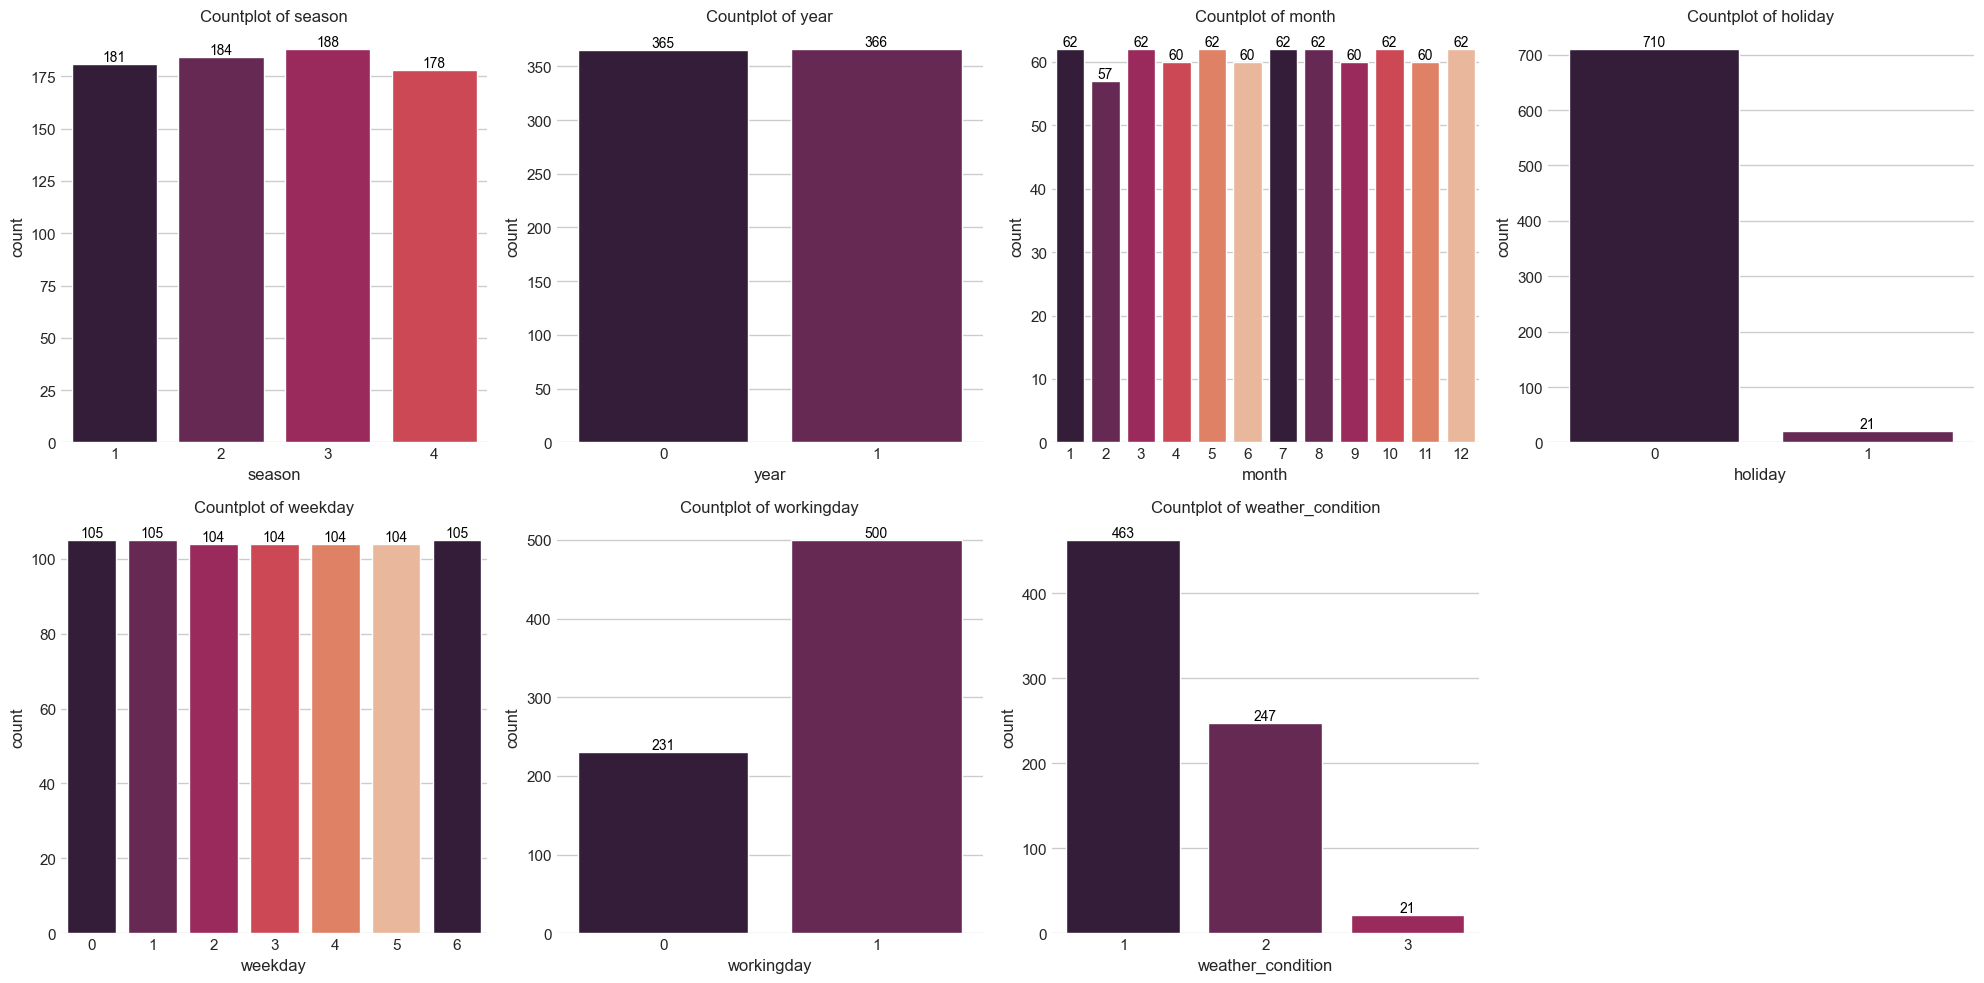

In [1417]:
# Set up the subplot grid
n_cols = 4
n_rows = (len(categorical_inputs) + n_cols - 1) // n_cols  # Ceiling division to get number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Choose a visually appealing color palette for the plots
palette = sns.color_palette("rocket")  # Improved color palette

# Loop through each categorical column and create a countplot
for idx, col in enumerate(categorical_inputs):
    ax = axes[idx]
    sns.countplot(x=col, data=x_df, ax=ax, palette=palette)
    ax.set_title(f'Countplot of {col}')
    # Annotate each bar with its count value
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Hide any unused subplots (in case the grid is larger than the number of categorical columns)
for ax in axes[len(categorical_inputs):]:
    ax.set_visible(False)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

This set of count plots shows the distribution of categorical features:
- Balanced: Season, year, month, and weekday are evenly distributed.
- Imbalanced: Holidays (very few), working days (more common than non-working), and weather (mostly clear, very few rainy/snowy days, no extreme weather).
- These imbalances may bias the model toward normal working days with clear weather, limiting generalization for holidays and rare weather events.

### Central Tendency of Interval Inputs

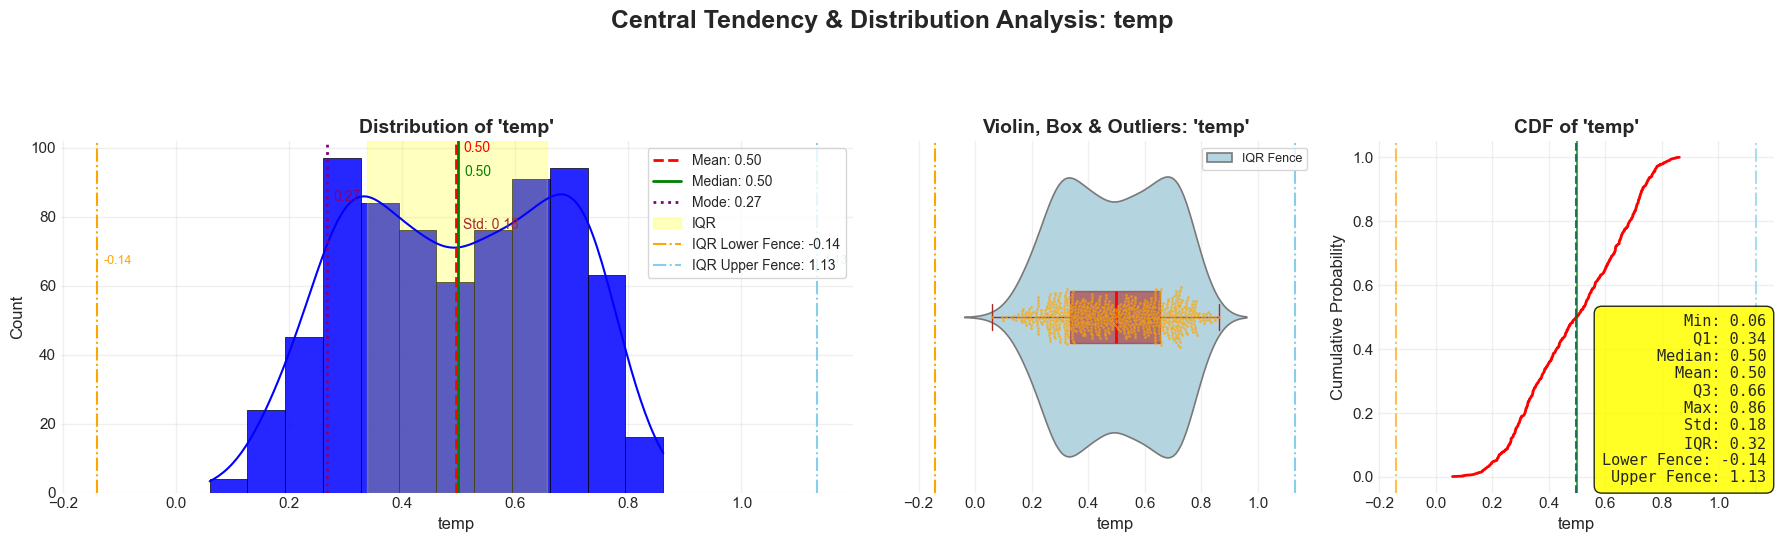

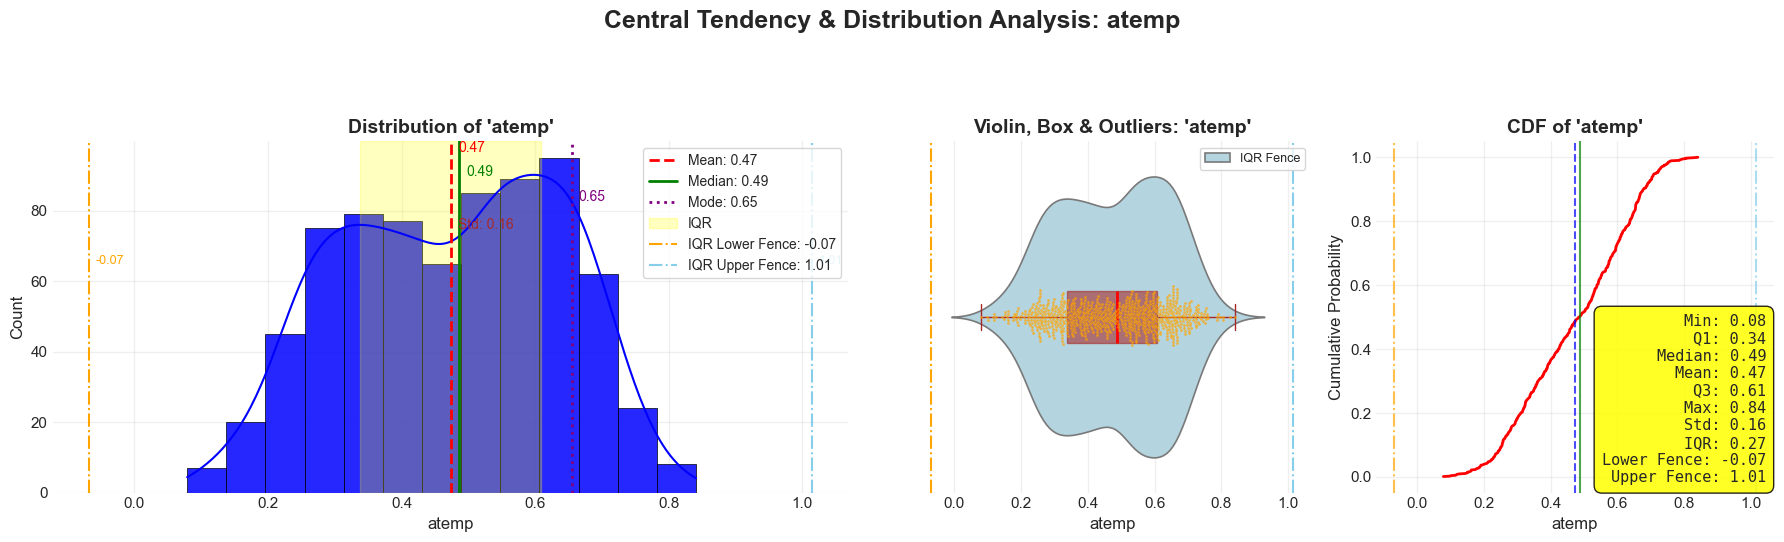

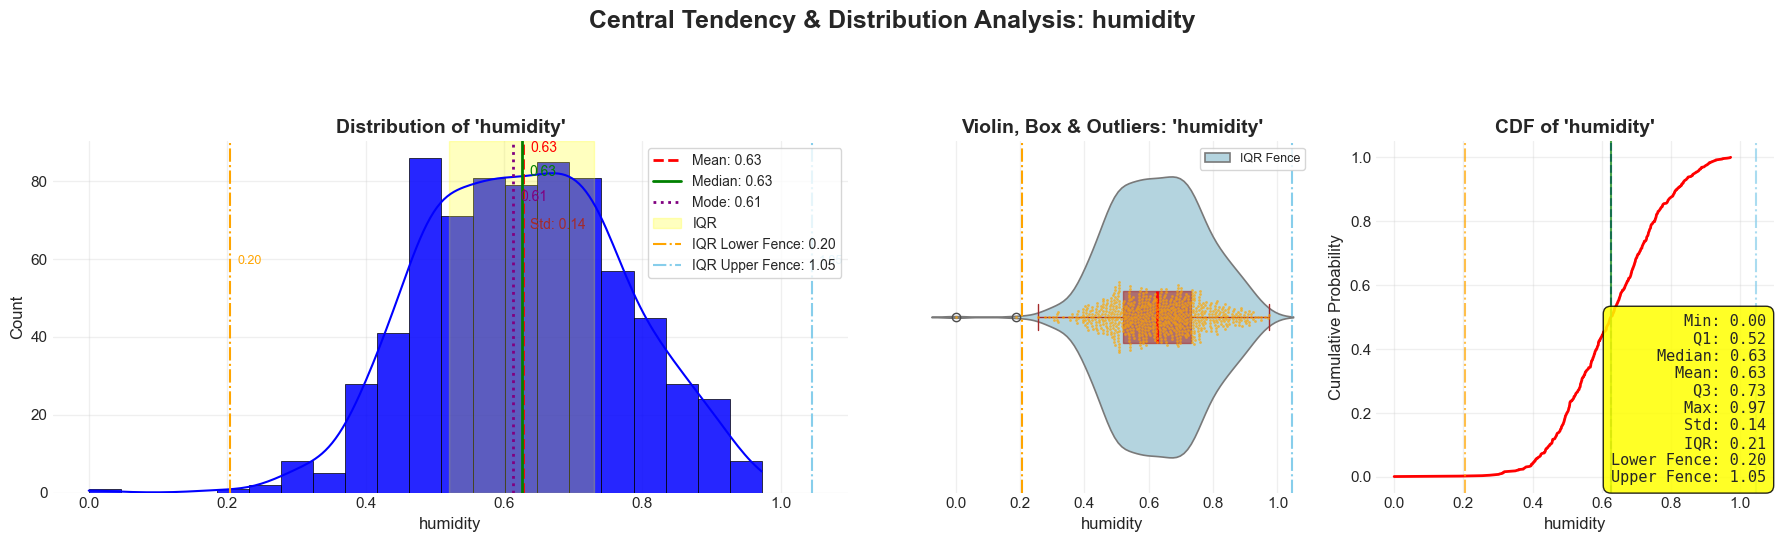

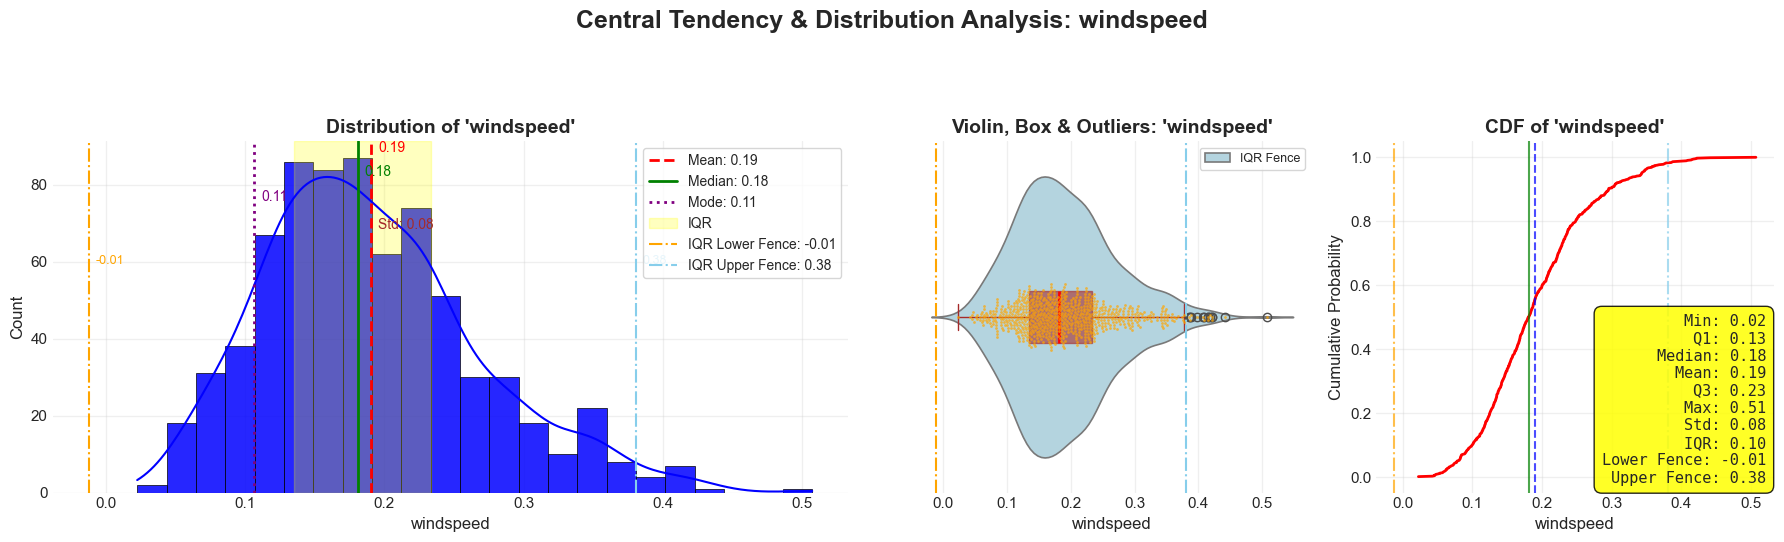

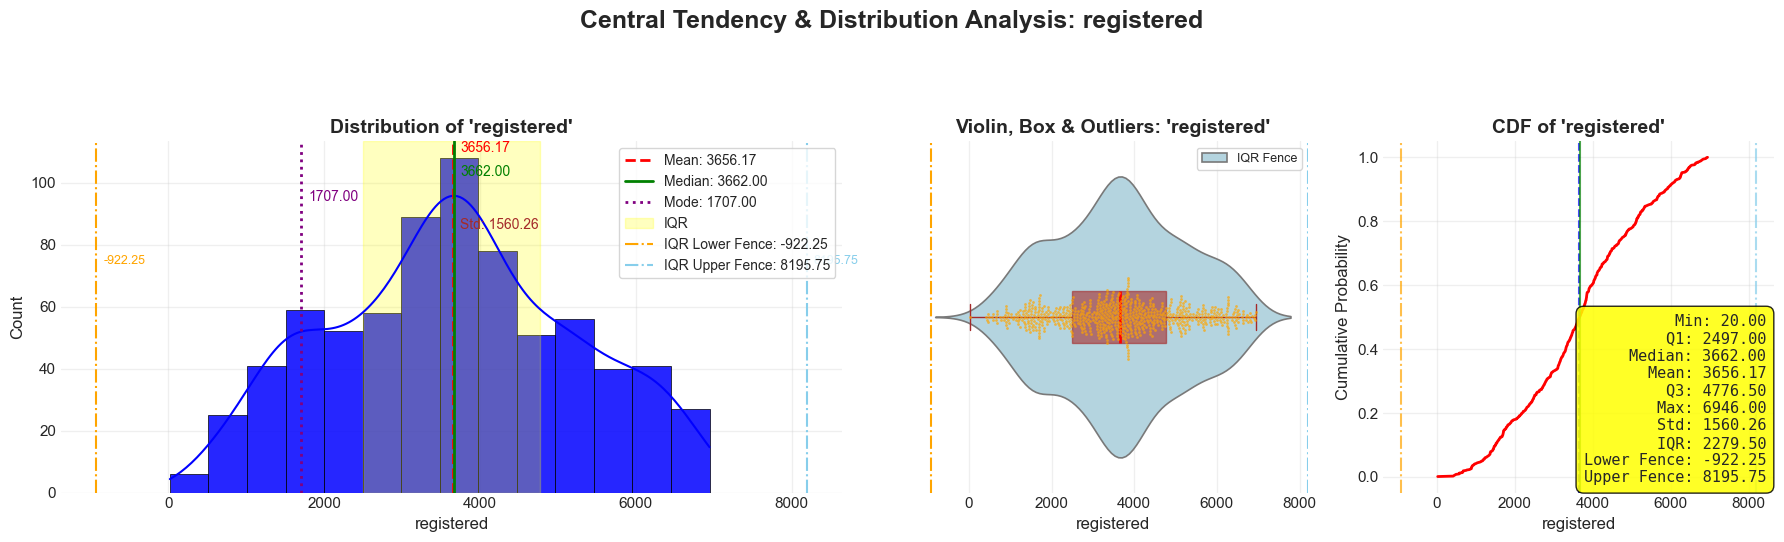

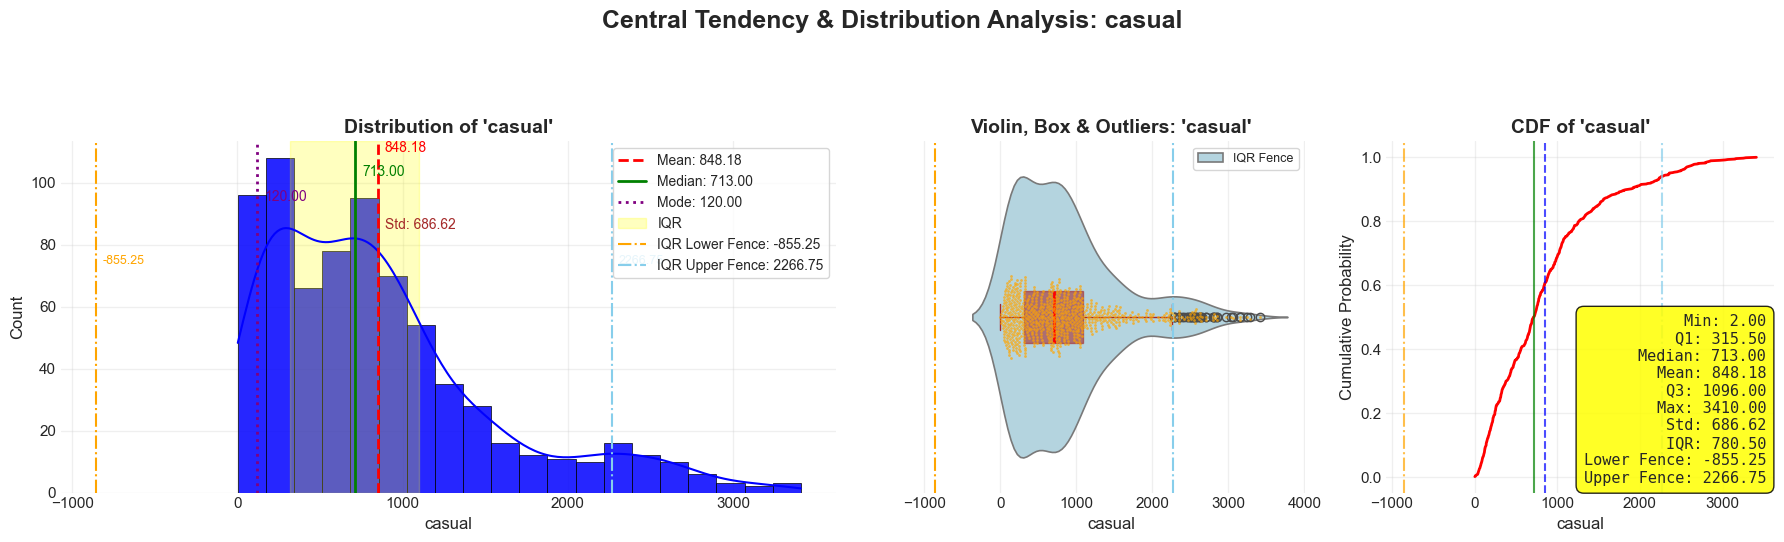

In [1418]:
def plot_central_tendency(df, features):
    """
    Visualization of central tendency and distribution for numerical features.

    Args:
        df: pandas DataFrame containing the data
        features: list of feature names
    """

    # Precompute statistics for all features to avoid repeated computation
    means = df[features].mean()      # Series of means for each feature
    medians = df[features].median()  # Series of medians for each feature
    stds = df[features].std()        # Series of standard deviations for each feature
    mins = df[features].min()        # Series of minimums for each feature
    maxs = df[features].max()        # Series of maximums for each feature
    q1s = df[features].quantile(0.25)  # Series of 25th percentiles (Q1)
    q3s = df[features].quantile(0.75)  # Series of 75th percentiles (Q3)
    modes = df[features].mode().iloc[0] # Series of modes for each feature

    # Plot the statistics for each feature
    for feature in features:
        # Extract precomputed statistics for the current feature
        mean = means[feature]
        median = medians[feature]
        std = stds[feature]
        min_ = mins[feature]
        max_ = maxs[feature]
        mode = modes[feature]
        q1_val = q1s[feature]
        q3_val = q3s[feature]
        iqr = q3_val - q1_val
        lower_fence = q1_val - 1.5 * iqr
        upper_fence = q3_val + 1.5 * iqr

        # Create a figure with 3 subplots: histogram, violin/box, and CDF
        fig, axes = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 1, 1]})

        # Histogram with KDE and central tendency lines
        sns.histplot(
            data=df, x=feature, color='blue', kde=True, ax=axes[0], 
            edgecolor='black', linewidth=0.5, alpha=0.85  # Style the histogram
        )

        # Add vertical lines for mean, median, and mode
        axes[0].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
        axes[0].axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}', linewidth=2)
        axes[0].axvline(mode, color='purple', linestyle=':', label=f'Mode: {mode:.2f}', linewidth=2)
        # Highlight the interquartile range (IQR) as a shaded region
        axes[0].axvspan(q1_val, q3_val, color='yellow', alpha=0.25, label='IQR')
        # Add IQR fences as dashed black lines
        axes[0].axvline(lower_fence, color='orange', linestyle='-.', linewidth=1.5, label=f'IQR Lower Fence: {lower_fence:.2f}')
        axes[0].axvline(upper_fence, color='skyblue', linestyle='-.', linewidth=1.5, label=f'IQR Upper Fence: {upper_fence:.2f}')
        axes[0].legend(loc='upper right', fontsize=10, frameon=True)  # Show legend
        axes[0].grid(alpha=0.3)  # Add grid for readability
        axes[0].set_title(f"Distribution of '{feature}'", fontsize=14, fontweight='bold')
        axes[0].set_xlabel(feature, fontsize=12)
        axes[0].set_ylabel("Count", fontsize=12)

        # Annotate mean, median, mode, and std on the histogram
        ylim = axes[0].get_ylim()[1]  # Get the top y-limit for annotation placement
        axes[0].annotate(f"{mean:.2f}", xy=(mean, ylim*0.97), 
                         xytext=(5, 0), textcoords='offset points', color='red', fontsize=10)
        axes[0].annotate(f"{median:.2f}", xy=(median, ylim*0.90), 
                         xytext=(5, 0), textcoords='offset points', color='green', fontsize=10)
        axes[0].annotate(f"{mode:.2f}", xy=(mode, ylim*0.83), 
                         xytext=(5, 0), textcoords='offset points', color='purple', fontsize=10)
        axes[0].annotate(f"Std: {std:.2f}", xy=(mean, ylim*0.75), 
                         xytext=(5, 0), textcoords='offset points', color='brown', fontsize=10)
        # Annotate IQR fences
        axes[0].annotate(f"{lower_fence:.2f}", xy=(lower_fence, ylim*0.65), 
                         xytext=(5, 0), textcoords='offset points', color='orange', fontsize=9)
        axes[0].annotate(f"{upper_fence:.2f}", xy=(upper_fence, ylim*0.65), 
                         xytext=(5, 0), textcoords='offset points', color='skyblue', fontsize=9)

        # Violin plot with boxplot overlay
        sns.violinplot(
            data=df, x=feature, ax=axes[1], inner=None, color='lightblue', linewidth=1.2
        )
        # Boxplot overlay
        sns.boxplot(
            data=df, x=feature, ax=axes[1], width=0.15, boxprops=dict(alpha=0.6, color='brown'),
            whiskerprops=dict(color='brown'), capprops=dict(color='brown'),
            medianprops=dict(color='red', linewidth=2)  # Overlay boxplot for summary stats
        )
        # Swarmplot can be slow for large data, use only if n < 1000
        if len(df) < 1000:
            sns.swarmplot(
                data=df, x=feature, ax=axes[1], color='orange', size=2, alpha=0.7  # Show individual points if dataset is small
            )
        # Add IQR fences to violin/box plot
        axes[1].axvline(lower_fence, color='orange', linestyle='-.', linewidth=1.5, label='IQR Lower Fence')
        axes[1].axvline(upper_fence, color='skyblue', linestyle='-.', linewidth=1.5, label='IQR Upper Fence')
        axes[1].set_title(f"Violin, Box & Outliers: '{feature}'", fontsize=14, fontweight='bold')
        axes[1].set_xlabel(feature, fontsize=12)
        axes[1].set_yticks([])  # Hide y-axis ticks for clarity
        axes[1].grid(alpha=0.3, axis='x')
        # Add legend for IQR fence only once
        handles, labels = axes[1].get_legend_handles_labels()
        if 'IQR Fence' not in labels:
            axes[1].legend(['IQR Fence'], loc='upper right', fontsize=9, frameon=True)

        # Cumulative Distribution Function (CDF)
        sorted_vals = np.sort(df[feature].values)  # Sort values for CDF
        cdf = np.linspace(0, 1, len(sorted_vals), endpoint=False) + 1/len(sorted_vals)  # Compute CDF values
        axes[2].plot(sorted_vals, cdf, color='red', linewidth=2)  # Plot CDF
        # Add vertical lines for mean and median
        axes[2].axvline(mean, color='blue', linestyle='--', linewidth=1.5, alpha=0.7)
        axes[2].axvline(median, color='green', linestyle='-', linewidth=1.5, alpha=0.7)
        # Add IQR fences to CDF
        axes[2].axvline(lower_fence, color='orange', linestyle='-.', linewidth=1.5, alpha=0.7)
        axes[2].axvline(upper_fence, color='skyblue', linestyle='-.', linewidth=1.5, alpha=0.7)
        axes[2].set_title(f"CDF of '{feature}'", fontsize=14, fontweight='bold')
        axes[2].set_xlabel(feature, fontsize=12)
        axes[2].set_ylabel("Cumulative Probability", fontsize=12)
        axes[2].grid(alpha=0.3)

        # Add summary statistics box
        stats_text = (
            f"Min: {min_:.2f}\n"
            f"Q1: {q1_val:.2f}\n"
            f"Median: {median:.2f}\n"
            f"Mean: {mean:.2f}\n"
            f"Q3: {q3_val:.2f}\n"
            f"Max: {max_:.2f}\n"
            f"Std: {std:.2f}\n"
            f"IQR: {iqr:.2f}\n"
            f"Lower Fence: {lower_fence:.2f}\n"
            f"Upper Fence: {upper_fence:.2f}"
        )

        # Style for the statistics box
        props = dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.85, edgecolor='black')
        axes[2].text(0.98, 0.02, stats_text, transform=axes[2].transAxes, fontsize=11,
                     verticalalignment='bottom', horizontalalignment='right', bbox=props, family='monospace')

        # Super title and layout
        plt.suptitle(f"Central Tendency & Distribution Analysis: {feature}", fontsize=18, fontweight='bold', y=1.08)
        plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit titles and annotations
        plt.show()  # Display the figure


plot_central_tendency(x_df, interval_inputs)

`Observations`

**1. Temperature (temp)**
- Histogram & KDE: The distribution is fairly symmetric with mean and median around 0.50, suggesting no major skew. The mode is slightly lower (0.27), showing mild multimodality.

- Violin/Box Plot: Most values lie within the IQR (0.32), with no extreme outliers beyond the fences.

- CDF Plot: The cumulative distribution rises steadily, confirming balanced spread with 50% of values below 0.50 and most values between 0.34 (Q1) and 0.66 (Q3).

**2. Feels-like Temperature (atemp)**
- Histogram & KDE: Distribution is slightly right-shifted with mean 0.47 and mode 0.65. Median (0.49) is closer to mean, showing near-symmetric distribution.

- Violin/Box Plot: No severe outliers, spread (IQR = 0.27) is compact compared to temp.

- CDF Plot: Smooth S-shape, with 75% of data below 0.61. The distribution closely mirrors temp, but with slightly higher central tendency.

**3. Humidity**
- Histogram & KDE: Slightly negatively skewed distribution with mean 0.63 and median 0.63. Mode at 0.61 aligns closely, suggesting unimodality.

- Violin/Box Plot: Few visible low-end outliers near 0.0, but most values cluster between 0.52(Q1) and 0.73(Q3).

- CDF Plot: Rapid rise between 0.5–0.7 indicating a large concentration of values in this range. Upper tail is thinner, confirming fewer very high humidity records.

**4. Windspeed**
- Histogram & KDE: Right-skewed distribution with mean 0.19 and median 0.18, but mode much lower (0.11), showing most records have light winds.

- Violin/Box Plot: Outliers are visible at the higher end, though the spread remains tight (IQR = 0.10).

- CDF Plot: Steeper slope between 0.1–0.25, highlighting concentration of values in light to moderate winds. Only a small proportion exceeds 0.3.


**5. Registered Users**
- Histogram & KDE: The distribution is fairly symmetric and bell-shaped, centered around mean = 3656 and median = 3662, indicating balanced spread with little skew. The mode (1707) is lower, suggesting a secondary peak, hence mild multimodality.

- Violin/Box Plot: The spread is wide (IQR = 2279.50), showing variability in daily registered counts. No severe outliers are observed, though the whiskers stretch widely.

- CDF Plot: The cumulative distribution rises steadily, with 50% of values below 3662 and most observations falling between Q1 = 2497 and Q3 = 4776. This indicates that the majority of bike demand is driven by registered users in the mid–high range.

**6. Casual Users**
- Histogram & KDE: The distribution is right-skewed, with most users concentrated at lower counts. The mean (848) is greater than the median (713), confirming skewness. The mode (120) lies much lower, indicating many low-usage days.

- Violin/Box Plot: Wider variability is observed (IQR = 780.5) compared to temp/humidity but smaller than registered users. Several high-end outliers are present, reflecting occasional spikes in casual usage.

- CDF Plot: Steep rise at the lower end shows that 75% of values fall below 1096, meaning casual demand is usually modest. However, the long right tail highlights sporadic days of unusually high casual ridership.

More detail analysis on Skewness along with Kurtosis will be conducted in next phase

### Skewness and Kurtosis

In [1419]:
def summarize_interval_variables(data):
    summary = pd.DataFrame({
        "Minimum": data.min(),
        "Maximum": data.max(),
        "Mean": data.mean(),
        "Standard Deviation": data.std(),
        "Skewness": data.skew(),
        "Kurtosis": data.kurt()
    })
    return summary

interval_summary = summarize_interval_variables(x_df[interval_inputs])

interval_summary

Minimum      Maximum         Mean  Standard Deviation  Skewness  \
temp         0.059130     0.861667     0.495385            0.183051 -0.054521   
atemp        0.079070     0.840896     0.474354            0.162961 -0.131088   
humidity     0.000000     0.972500     0.627894            0.142429 -0.069783   
windspeed    0.022392     0.507463     0.190486            0.077498  0.677345   
registered  20.000000  6946.000000  3656.172367         1560.256377  0.043659   
casual       2.000000  3410.000000   848.176471          686.622488  1.266454   

            Kurtosis  
temp       -1.118864  
atemp      -0.985131  
humidity   -0.064530  
windspeed   0.410922  
registered -0.713097  
casual      1.322074

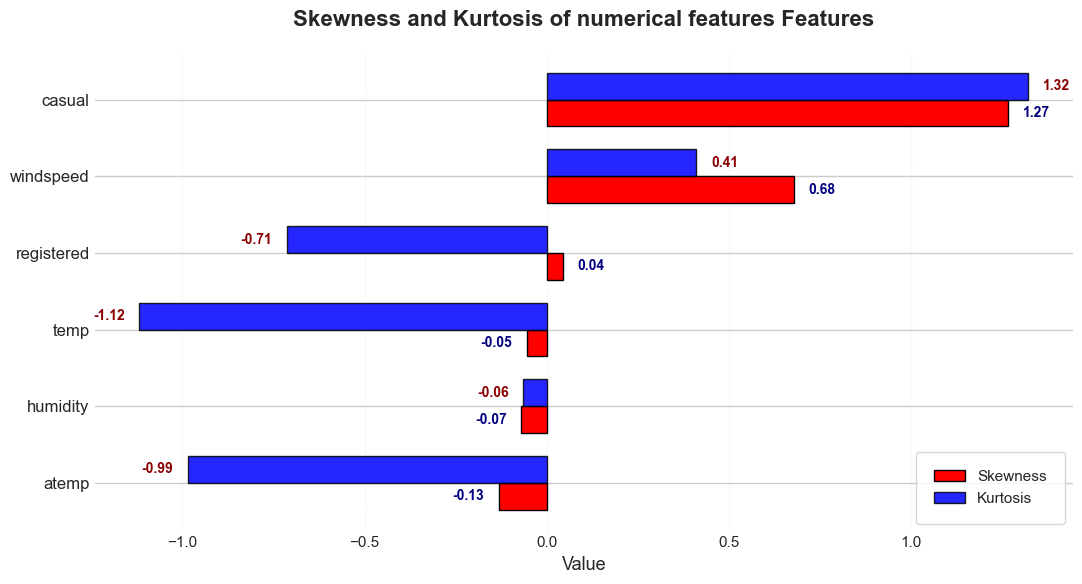

In [1420]:
def plot_skewness_kurtosis(df, split_name="numerical features"):
    """
    Visualize skewness and kurtosis for numerical features in the DataFrame.

    Args:
        df: pandas DataFrame containing the data
        split_name: str, name for the numerical features (for title)
    """
    # Compute skewness and kurtosis directly from the provided DataFrame
    skewness = df.skew().sort_values()
    kurtosis = df.kurt().loc[skewness.index]  # align order with skewness
    features = skewness.index

    # set the figure size
    fig, ax = plt.subplots(figsize=(11, 6))

    # set the bar height
    bar_height = 0.35
    y = np.arange(len(features))


    # Plot skewness and kurtosis bars
    ax.barh(y - bar_height/2, skewness, height=bar_height, color="red", label='Skewness', edgecolor='black')
    ax.barh(y + bar_height/2, kurtosis, height=bar_height, color="blue", label='Kurtosis', edgecolor='black', alpha=0.85)

    # Annotate skewness and kurtosis values on bars
    for i, (sk, ku) in enumerate(zip(skewness, kurtosis)):
        ax.text(sk + (0.04 if sk >= 0 else -0.04), y[i] - bar_height/2, f"{sk:.2f}",
                color='navy', va='center', ha='left' if sk >= 0 else 'right', fontweight='bold', fontsize=10)
        ax.text(ku + (0.04 if ku >= 0 else -0.04), y[i] + bar_height/2, f"{ku:.2f}",
                color='darkred', va='center', ha='left' if ku >= 0 else 'right', fontweight='bold', fontsize=10)

    # Set y-ticks and labels
    ax.set_yticks(y)
    ax.set_yticklabels(features, fontsize=12)
    ax.set_xlabel('Value', fontsize=13)
    ax.set_title(f'Skewness and Kurtosis of {split_name} Features', fontsize=16, fontweight='bold', pad=18)

    # Custom legend
    ax.legend(loc='lower right', fontsize=11, frameon=True, borderpad=1.2)

    # Add grid for easier reading
    ax.grid(axis='x', linestyle=':', alpha=0.3)

    # Remove spines for a cleaner look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Usage
plot_skewness_kurtosis(x_df[interval_inputs])

### Summary of Skewness and Kurtosis Analysis

*Skewness* measures the asymmetry of a distribution. Values between -0.5 and 0.5 are considered approximately symmetric; values between -1 and -0.5 or 0.5 and 1 indicate moderate skewness; values less than -1 or greater than 1 indicate high skewness.

*Kurtosis* measures the "tailedness" of a distribution. A kurtosis near 0 (excess kurtosis) indicates a normal (mesokurtic) distribution. Negative values (platykurtic) indicate lighter tails and a flatter peak, while positive values (leptokurtic) indicate heavier tails and a sharper peak.


- **Casual users** 
    - Skewness ≈ 1.27, Kurtosis ≈ 1.32: Strong positive skew (many low counts with a long right tail) and leptokurtic tails (peaked with more extreme values than normal).

- **Windspeed** 
    - Skewness ≈ 0.68, Kurtosis ≈ 0.41: Moderate positive skew and slightly leptokurtic (somewhat heavier tails).

- **Registered users** 
    - Skewness ≈ 0.04, Kurtosis ≈ −0.71: Nearly symmetric and platykurtic (flatter peak, lighter tails).

- **Temperature (temp)** 
    - Skewness ≈ −0.05, Kurtosis ≈ −1.12: Nearly symmetric with clear platykurtosis (flat, light-tailed).

- **Humidity** 
    - Skewness ≈ −0.07, Kurtosis ≈ −0.06: Almost perfectly symmetric and near-mesokurtic (very close to normal, slightly flat).

- **Apparent temperature (atemp)** 
    - Skewness ≈ −0.13, Kurtosis ≈ −0.99: Slight negative skew and platykurtic (flatter, light-tailed).

**Overall**: 

- Casual usage deviates most from normality (right-skewed with heavy tails)

- windspeed shows moderate right skew 
- registered counts are nearly symmetric but flatter than normal
- temp, atemp, and humidity are close to symmetric with light tails (especially temp and atemp).

## 2.4.2 Correlations  <a class="anchor"></a>

## Interval Inputs

<Figure size 1000x800 with 0 Axes>

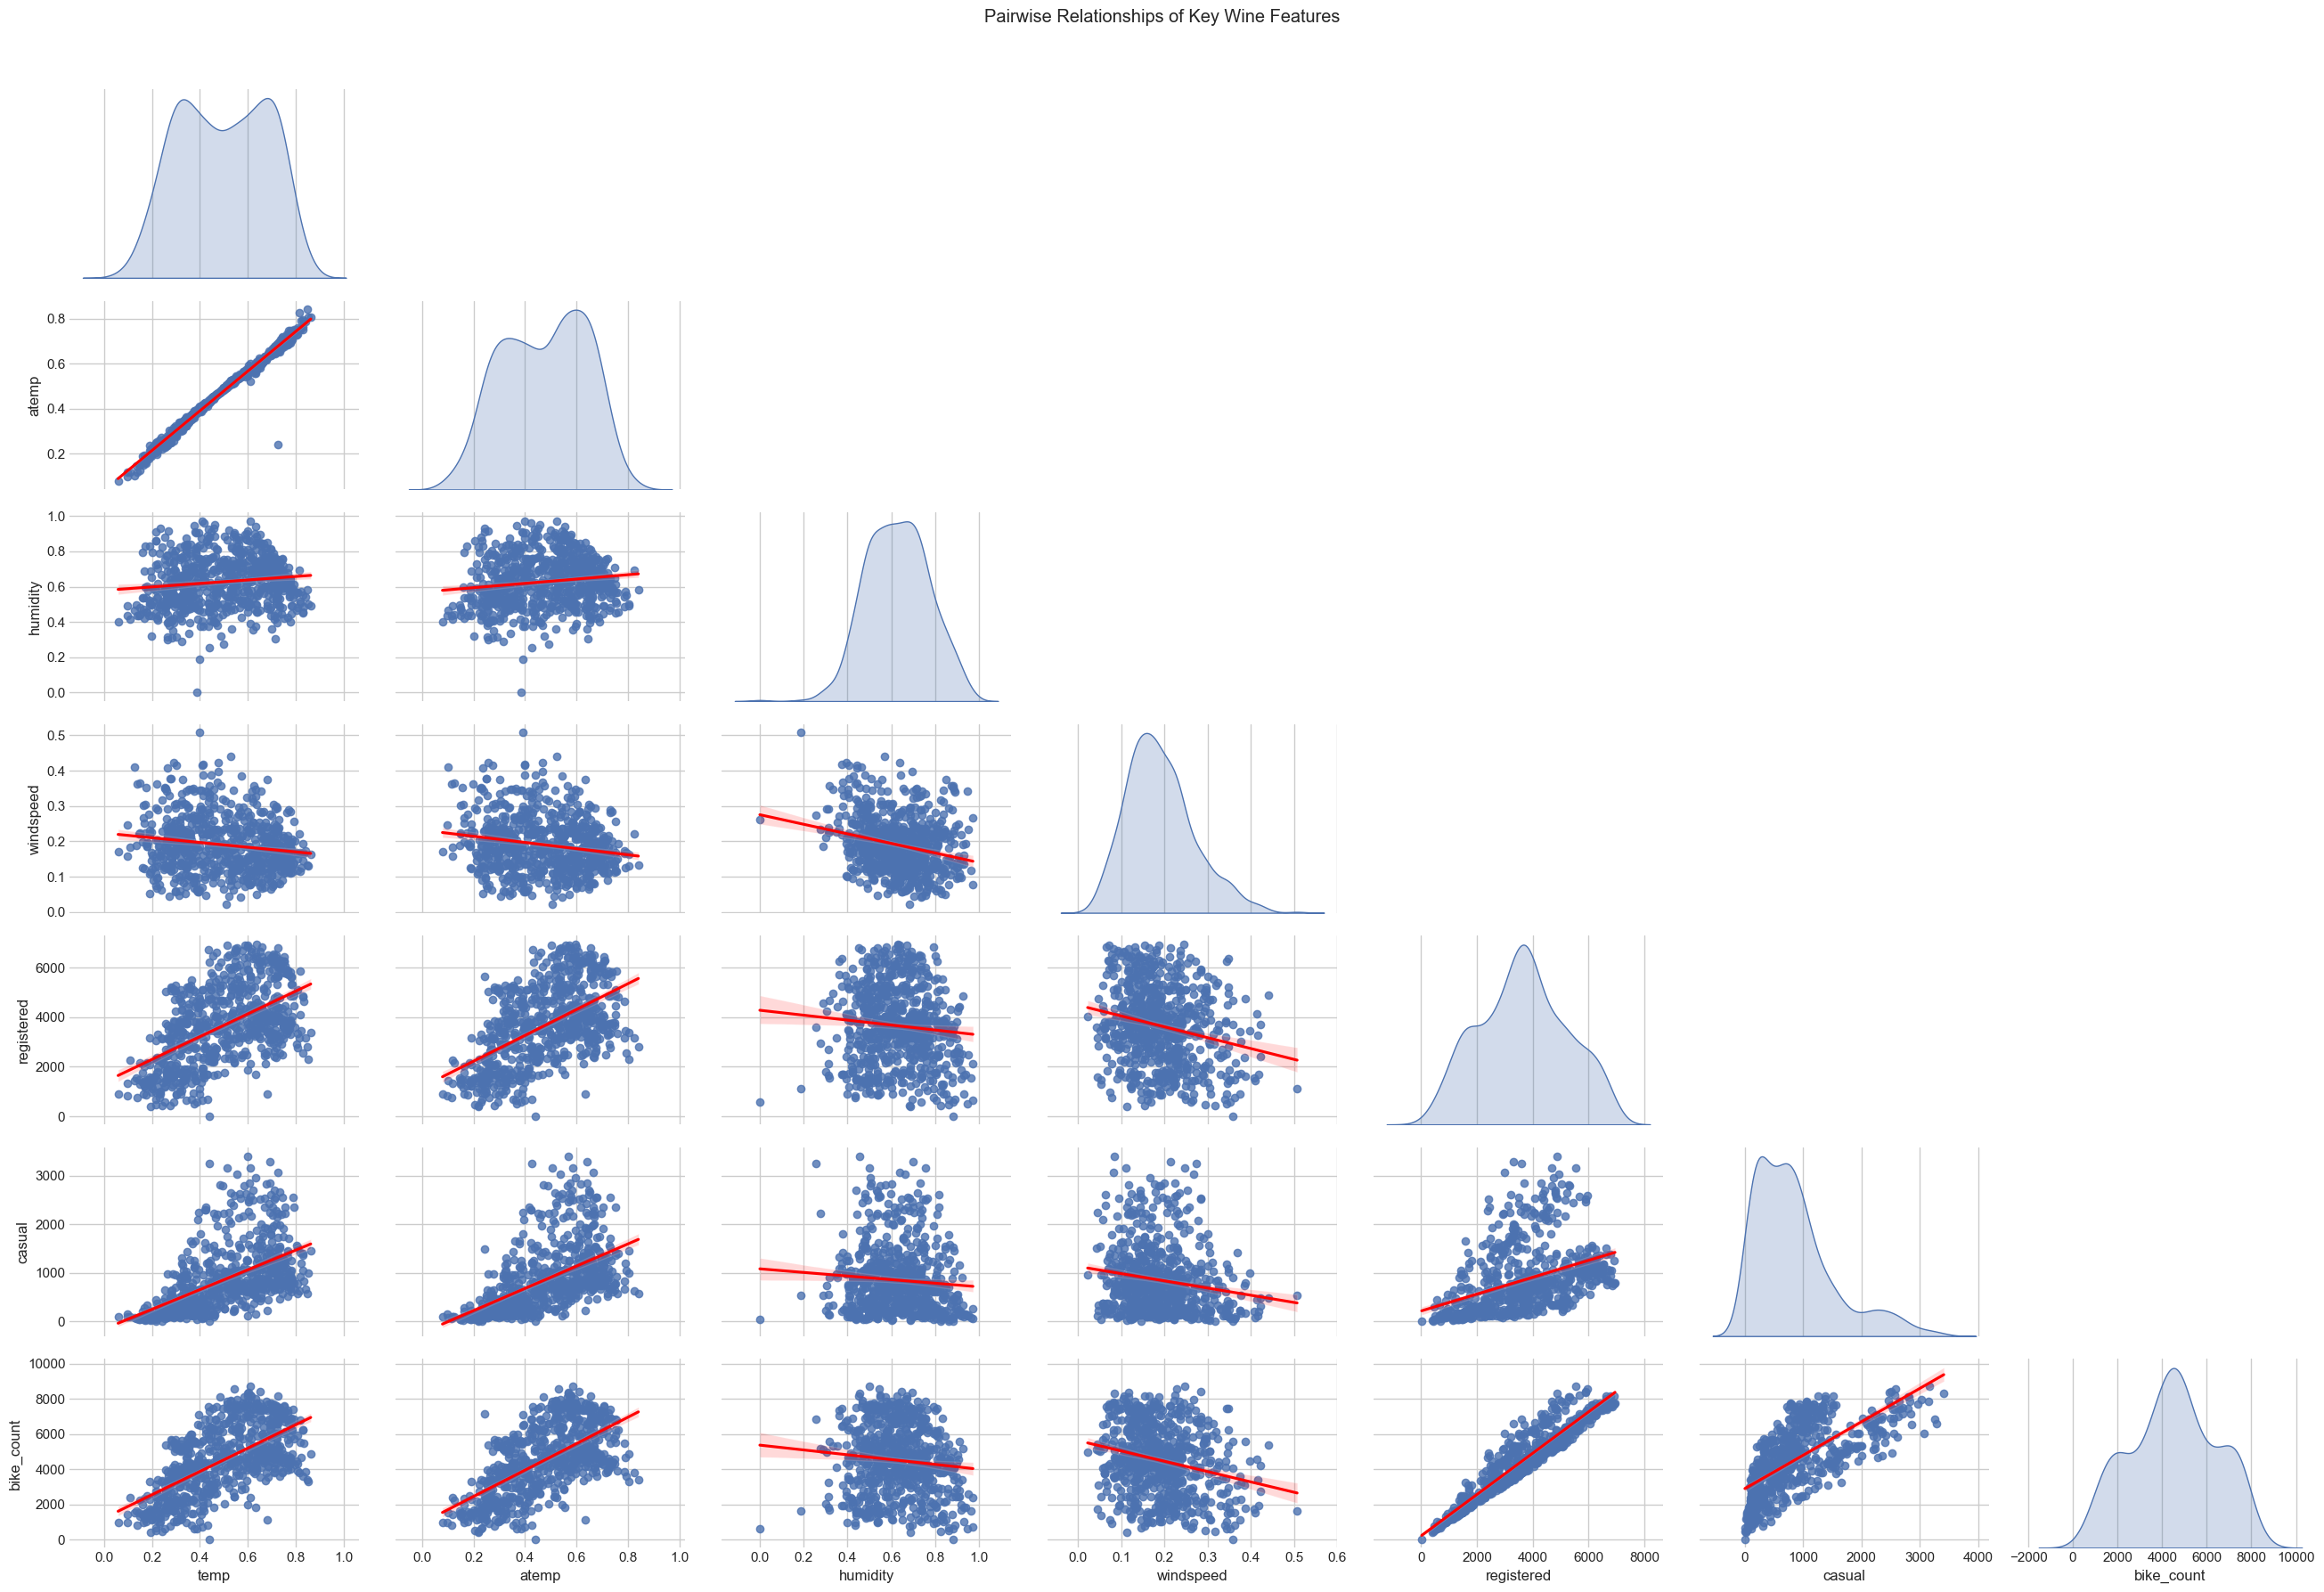

In [1421]:
# set figure size
plt.figure(figsize=(10, 8))

# plot the pairwise relationships of the interval features
sns.pairplot(
    data=df._to_pandas(),  # dataframe to get pairwise relationships
    vars=interval_inputs + ["bike_count"],
    kind='reg',  # kind='reg' refers to regression plot
    diag_kind='kde',    # kde refers to kernel density estimation for the diagonal  # customize regression line
    markers='o',
    corner=True, # corner=True refers to the diagonal plot
    palette='viridis',
    height=2.5,
    aspect=1.5,
    plot_kws={'line_kws': {'color': 'red'}}
)

plt.suptitle("Pairwise Relationships of Key Wine Features", y=1.02) # y is used to set the y-axis position of the title
plt.tight_layout() 
plt.show()

**Feature–Feature Relationships**

1. Temperature and apparent temperature (atemp) exhibit an almost perfect linear relationship. Both variables represent actual and perceived temperature, introducing redundancy. This multicollinearity should be addressed during modeling to avoid inflated variance in parameter estimates.

2. Humidity and windspeed display a weak negative association. These features capture distinct aspects of weather conditions and provide complementary information.

3. Registered and casual users show only a weak positive relationship, indicating that these user groups respond differently to external factors such as time, seasonality, and holidays.

4. Registered users and temperature (including atemp) demonstrate a moderate positive association, suggesting that warmer weather encourages more frequent usage among registered users.

**Feature–Target (Feature vs. bike_count) Relationships**

1. Registered users have a very strong positive linear relationship with bike count. Registered riders are the dominant contributors to overall demand, making this feature the single strongest predictor of total bike count.

2. Casual users also show a strong positive correlation with bike count, though the relationship is more scattered compared to registered users. This reflects greater variability in casual demand, which is often influenced by weekends, holidays, and seasonal effects.

3. Temperature (temp and atemp) demonstrates a clear positive correlation with bike count. Higher temperatures are associated with increased bike rentals, although extremely high temperatures may slightly reduce demand, suggesting a potential non-linear effect.

4. Humidity exhibits a moderate negative correlation with bike count. Higher humidity levels tend to discourage bike usage, though the effect is less pronounced than that of temperature.

5. Windspeed displays only a weak negative relationship with bike count. While extreme wind conditions may deter riders, windspeed overall has a limited predictive contribution compared to other weather factors.

**Key Insights**

The primary predictors of demand are registered users, casual users, and temperature-related variables. Humidity has a secondary, negative influence, while windspeed has only a minor effect. It is important to note the strong multicollinearity between temp and atemp; one of these variables should be excluded or transformed to ensure model stability.

Further analysis will be conducted using both Pearson and Spearman correlation methods to examine relationships between features. 
To assess the importance of features in predicting the target variable (bike_count), Pearson correlation, mutual information (information gain) and entropy reduction techniques will be conducted

In [1422]:
# Compute Pearson correlation
pearson_corr = df[interval_inputs].corr(method="pearson")

# Compute Spearman correlation
spearman_corr = df[interval_inputs].corr(method="spearman")

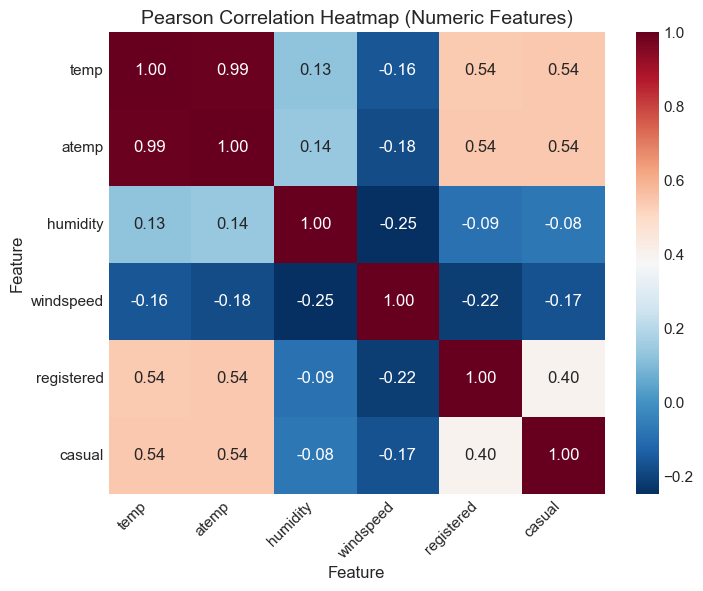

In [1423]:
def plot_heatmap(method):
    # Plot Pearson correlation heatmap with feature names as axis labels
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        method,
        annot=True,
        cmap="RdBu_r",
        fmt=".2f",
        cbar=True, # cbar=True refers to the color bar
        xticklabels=method.columns,
        yticklabels=method.index
    )
    plt.title("Pearson Correlation Heatmap (Numeric Features)", fontsize=14)
    plt.xlabel("Feature")
    plt.ylabel("Feature")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

plot_heatmap(pearson_corr)

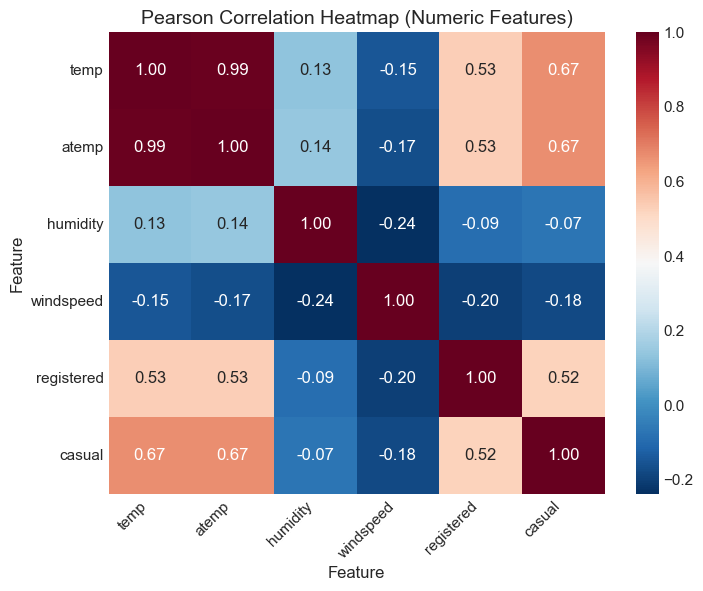

In [1424]:
plot_heatmap(spearman_corr)

**Common Patterns Observed in Both Heatmaps**

1. The relationship between temperature (temp) and apparent temperature (atemp) is characterized by a very strong positive correlation (approximately 0.99) in both visualizations. This confirms a high degree of redundancy between these two variables.

2. Humidity and windspeed exhibit a negative correlation in both heatmaps ( -0.24 and -0.25), indicating that higher humidity levels are generally associated with lower windspeed.

3. There is a moderate positive correlation between registered and casual users in both heatmaps ( 0.40 and 0.52). This suggests that while the two user groups tend to increase together, their relationship is not perfectly aligned.

**Key Differences Between the Two Heatmaps**

The strength of correlations involving the casual user variable differs between the two heatmaps. In the first heatmap, casual users show a moderate correlation with registered users (0.40) and with temp/atemp (0.54). In the second heatmap, these correlations are notably stronger (0.52 with registered users and 0.67 with temp/atemp). This indicates that the relationship between casual riders and temp/atemp is more pronounced in the second analysis.


**Summary**

Both heatmaps consistently reveal the following structural relationships: 
- Temperature and apparent temperature are nearly redundant.  

- Humidity and windspeed are negatively related and 

- Registered and casual users share a moderate positive association. 


### Interval Inputs Vs Target

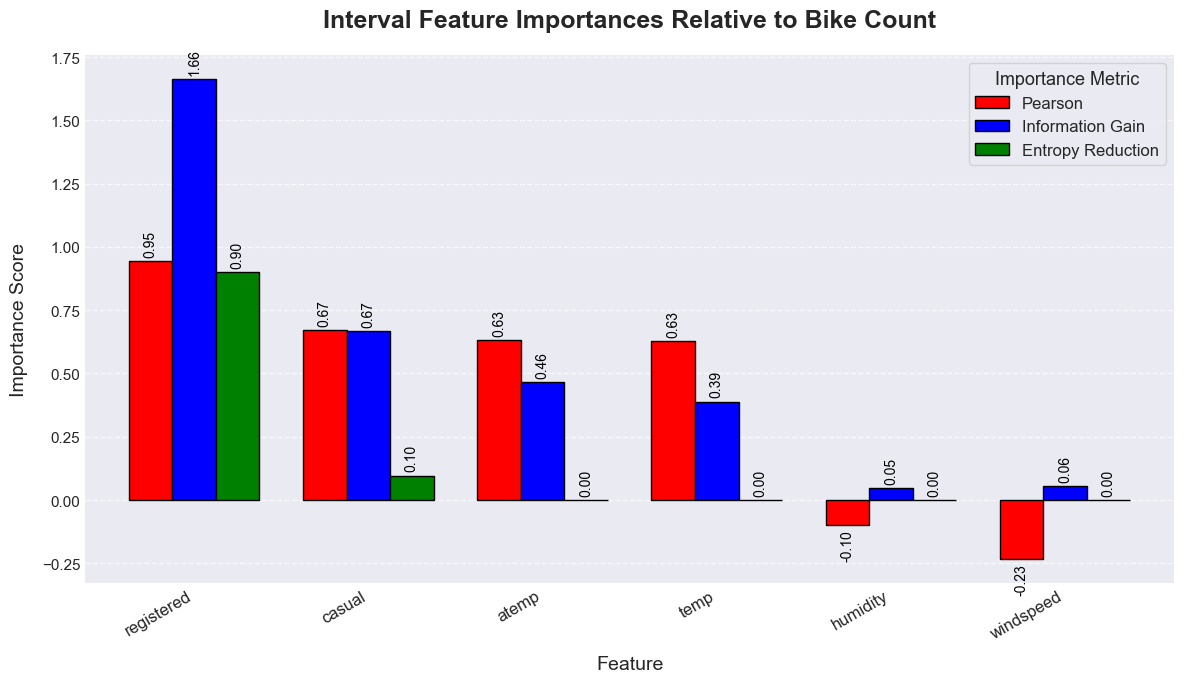

In [1425]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
plt.style.use("seaborn-v0_8-darkgrid")

# Prepare X and y for feature importance analysis
X = df[interval_inputs]
y = df["bike_count"]

# Calculate Pearson correlation between each interval feature and bike_count
pearson_corr = X.apply(lambda col: col.corr(y, method="pearson"))

# Compute Information Gain (Mutual Information) between each feature and bike_count
mi = mutual_info_regression(X, y, random_state=0)
info_gain = pd.Series(mi, index=interval_inputs)

# Calculate Entropy Reduction using feature importances from a Decision Tree regressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X, y)
entropy_reduction = pd.Series(tree.feature_importances_, index=interval_inputs)

# Combine into a summary table
summary_table = pd.DataFrame({
    "Pearson": pearson_corr,
    "Information Gain": info_gain,
    "Entropy Reduction": entropy_reduction
}).sort_values(by="Pearson", ascending=False)

# Create a grouped bar chart to visualize the importance scores for each feature
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the summary table
summary_table.plot(
    kind="bar",
    ax=ax,
    color=["red", "blue", "green"],
    width=0.75,
    edgecolor="black"
)

ax.set_title("Interval Feature Importances Relative to Bike Count", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("Feature", fontsize=14, labelpad=10)
ax.set_ylabel("Importance Score", fontsize=14, labelpad=10)

# Improve x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)

# Add value labels on each bar for clarity
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3, fontsize=10, rotation=90, color="black")


ax.legend(
    title="Importance Metric",
    fontsize=12,
    title_fontsize=13,
    loc="upper right",
    frameon=True
)

# Show grid lines only for the y-axis to enhance readability
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

This plot compares feature importance using Pearson correlation, Information Gain, and Entropy Reduction relative to bike count. Registered users are the strongest driver across all metrics, followed by casual users with moderate importance. Temperature (temp, atemp) shows a positive but weaker effect, while humidity and windspeed contribute minimally. Overall, rider type dominates bike count prediction, with weather factors playing only a secondary role.

## Categorical Inputs

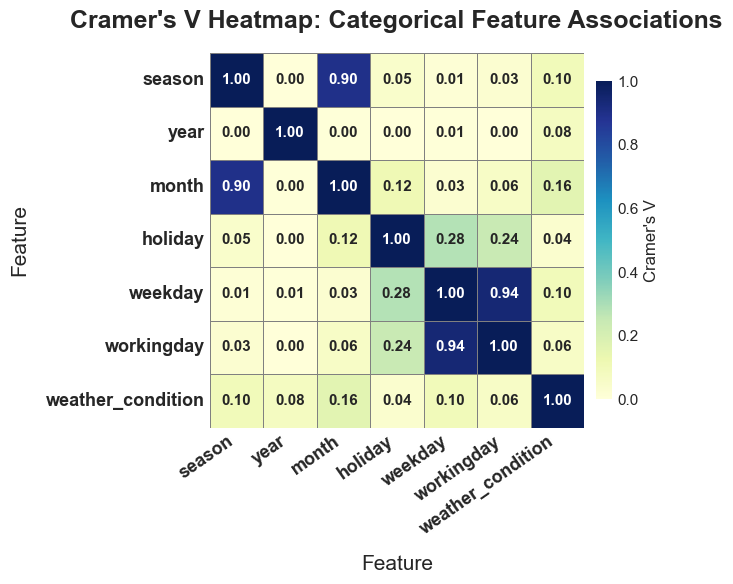

In [1426]:
from scipy.stats.contingency import association

def cramers_v(x, y):
    """
    Compute Cramer's V statistic for categorical-categorical association using scipy.stats.contingency.association.
    Args:
        x: Categorical variable 1 
        y: Categorical variable 2 
    Returns:
        float: Cramér's V statistic
    """
    # Create a confusion matrix
    confusion_matrix = pd.crosstab(x, y)
    return association(confusion_matrix.values, method="cramer", correction=True)

# Compute Cramér's V matrix with feature names and value counts in the labels
feature_labels = [f"{col}\n({df[col].nunique()} values)" for col in categorical_inputs]

cramers_matrix = pd.DataFrame(
    np.eye(len(categorical_inputs)),  # Diagonal = 1.0
    index=feature_labels,
    columns=feature_labels
)

# Compute Cramér's V for each pair of categorical features
for i, col1 in enumerate(categorical_inputs):
    for j, col2 in enumerate(categorical_inputs):
        # only compute the upper triangle of the matrix
        if i < j:
            v = cramers_v(df[col1], df[col2])
            cramers_matrix.iloc[i, j] = v
            cramers_matrix.iloc[j, i] = v

# Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cramers_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={'label': "Cramer's V", 'shrink': 0.85, 'pad': 0.02},
    ax=ax,
    annot_kws={"size": 11, "weight": "bold"}
)

# show feature names
ax.set_xticklabels([col for col in categorical_inputs], rotation=35, ha='right', fontsize=13, fontweight='bold')
ax.set_yticklabels([col for col in categorical_inputs], rotation=0, fontsize=13, fontweight='bold')

ax.set_title("Cramer's V Heatmap: Categorical Feature Associations", fontsize=18, fontweight="bold", pad=18)
ax.set_xlabel("Feature", fontsize=15, labelpad=12)
ax.set_ylabel("Feature", fontsize=15, labelpad=12)

# Add grid for better readability
ax.set_xticks([x + 0.5 for x in range(len(categorical_inputs))], minor=True)
ax.set_yticks([y + 0.5 for y in range(len(categorical_inputs))], minor=True)
ax.grid(which="minor", color="gray", linestyle=":", linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

The Cramér’s V heatmap provides a quantitative assessment of the associations between categorical features in the dataset:

- **Strongest Associations:**
    - ***Season and Month (Cramér’s V ≈ 0.90):*** This very high association is expected as each month is inherently linked to a specific season, resulting in a deterministic relationship.

    - ***Weekday and Workingday (Cramér’s V ≈ 0.94):*** The strong association here reflects the fact that working days are largely determined by the day of the week, with weekends typically being non-working days.

- **Moderate Associations:**
    - ***Holiday with Weekday (Cramér’s V ≈ 0.28) and Holiday with Workingday (Cramér’s V ≈ 0.24):*** These moderate associations indicate that holidays tend to occur on specific weekdays and have a direct impact on whether a day is classified as a working day. However, the relationship is not absolute, as holidays can fall on both working and non-working days.

- **Weak or Negligible Associations:**
    - ***Year and Weather Condition with Other Variables (Cramér’s V < 0.2):*** The year and weather condition features exhibit minimal association with the other categorical variables, suggesting that these factors are relatively independent in the context of this dataset.

In summary, the heatmap highlights that temporal features (such as month, season, weekday, and workingday) are closely interrelated, while features like year and weather condition operate more independently. Understanding these associations is crucial for feature selection and for interpreting potential multicollinearity in subsequent modeling.

### Categorical Inputs Vs Target

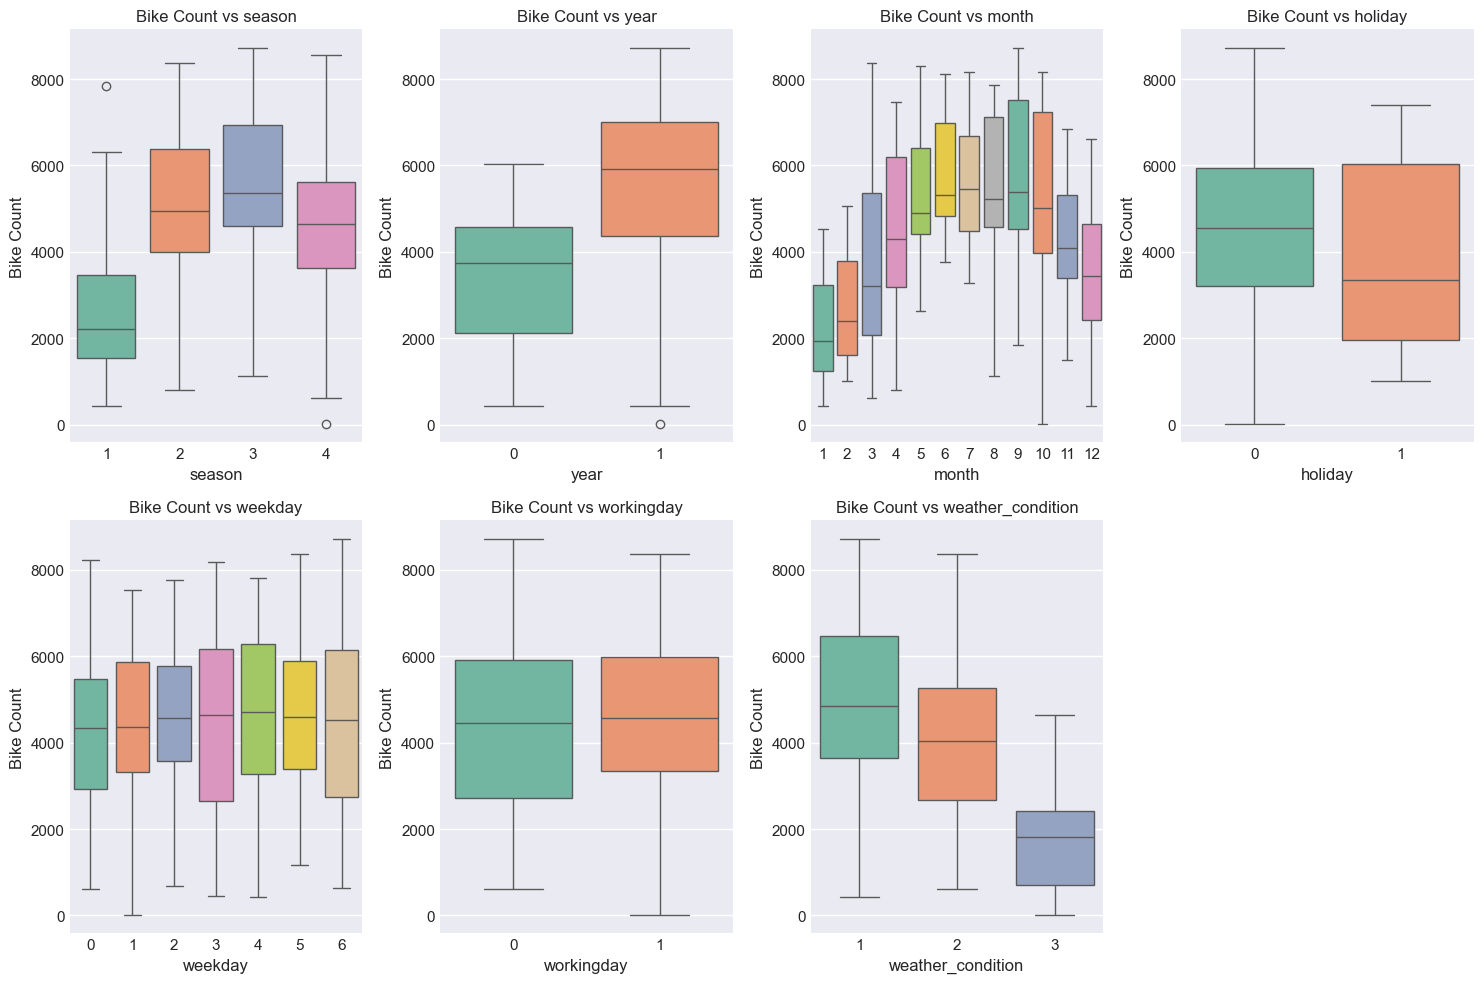

In [1427]:
# Set up plotting grid
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()

# Create boxplots
for i, feature in enumerate(categorical_inputs):
    sns.boxplot(x=feature, y='bike_count', data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Bike Count vs {feature}", fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Bike Count")

# Hide any unused subplots
for j in range(len(categorical_inputs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

`Analysis of Bike Count by Categorical Variables`

1. Bike Count vs Season
    - Season 3 (fall) demonstrates the highest average bike counts.
    - Season 1 (winter) records the lowest usage.
    - This pattern indicates that seasonal variation has a significant impact on demand.

2. Bike Count vs Year
    - Year 1 (2012) exhibits noticeably higher bike counts compared to year 0 (2011).
    - This suggests an increasing popularity of bike rentals over time.

3. Bike Count vs Month
    - Bike counts increase steadily from spring (March–May), reach a peak during summer and early fall (June–September), and decline in the winter months (November–February).
    - This trend aligns with seasonal weather patterns where favorable conditions encourage more rides.

4. Bike Count vs Holiday
    - Non-holidays (0) generally have slightly higher median bike counts than holidays.
    - This suggests that holidays do not necessarily lead to increased rentals. Individuals may travel less or choose alternative modes of transportation.

5. Bike Count vs Weekday
    - Bike counts are relatively consistent across all weekdays, with no pronounced difference between weekdays and weekends.
    - This consistency implies that both commuting and leisure activities contribute to bike rentals throughout the week.

6. Bike Count vs Working Day
    - There is no substantial difference in bike counts between working days (1) and non-working days (0).
    - A slightly higher spread on non-working days indicates that leisure rides may introduce additional variability.

7. Bike Count vs Weather Condition
    - category 1 are associated with the highest bike counts.
    - category 2 correspond to moderate counts.
    - category 3 result in the lowest bike counts.
    - Weather conditions have a strong influence on bike rentals, with adverse weather sharply reducing usage.

Overall Insights

- Season, month, and weather condition are the most influential factors affecting bike counts.
- There is a clear upward trend in demand over the years.
- Holiday, weekday, and working day have comparatively smaller effects, with bike rentals remaining relatively stable across these categories.

For further investigation, a ANOVA test will be conducted in next phase

In [1428]:
import scipy.stats as stats

#
anova_results = []
for col in categorical_inputs:
    # Create groups for each category
    groups = [df.loc[df[col] == cat, "bike_count"] for cat in df[col].unique()]
    # Perform ANOVA test
    f_val, p_val = stats.f_oneway(*groups)
    # Store results
    anova_results.append((col, f_val, p_val))

# Convert results to DataFrame
anova_summary = pd.DataFrame(anova_results, columns=["Feature", "F-value", "p-value"])
# Check if the p-value is less than 0.05 and the F-value is greater than 10
anova_summary["Significant"] = (anova_summary["p-value"] < 0.05) & (anova_summary["F-value"] > 10)

In [1429]:
import plotly.express as px
from plotly.subplots import make_subplots


# Create a new dataframe with the ANOVA results
anova = anova_summary.copy().sort_values("F-value")
# Calculate -log10(p)
anova["-log10(p)"] = -np.log10(anova["p-value"])

# Color map for the bar plot
color_map = {
    True: "green",   # significant
    False: "red"  # not significant
}

# Create subplot layout
fig = make_subplots(
    rows=1, cols=2, shared_yaxes=True,
    subplot_titles=("F-values", "−log₁₀(p-values)")
)

# F-values bar plot
f_bar = px.bar(
    anova, x="F-value", y="Feature", color="Significant",
    color_discrete_map=color_map, orientation="h",
    text=anova["F-value"].round(1).astype(str)
)

# Add the F-values bar plot to the first subplot
for trace in f_bar.data:
    trace.showlegend = False   # suppress duplicate legends
    fig.add_trace(trace, row=1, col=1)
fig.add_vline(x=10, line_dash="dash", line_color="black", row=1, col=1)

# -log10(p) bar plot
p_text = anova["p-value"].apply(lambda p: f"{p:.1e}" if p < 0.001 else f"{p:.3f}")
p_bar = px.bar(
    anova, x="-log10(p)", y="Feature", color="Significant",
    color_discrete_map=color_map, orientation="h",
    text=p_text
)

# Add the -log10(p) bar plot to the second subplot
for trace in p_bar.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_vline(x=-np.log10(0.05), line_dash="dash", line_color="black", row=1, col=2)

# Update the text position and anchor
fig.update_traces(textposition="inside", insidetextanchor="middle")

# Update the layout
fig.update_layout(
    title="ANOVA Results Summary",
    legend_title="Feature Effect",
    legend=dict(
        orientation="h",
        yanchor="bottom", y=1.05,
        xanchor="center", x=0.5
    )
)

# Rename legend items
for trace in fig.data:
    if trace.name == "True":
        trace.name = "Significant (p < 0.05 & F > 10)"
    elif trace.name == "False":
        trace.name = "Not Significant"

fig.show()
anova_summary

Feature     F-value       p-value  Significant
0             season  128.769622  6.720391e-67         True
1               year  344.890586  2.483540e-63         True
2              month   41.903703  4.251077e-70         True
3            holiday    3.421441  6.475936e-02        False
4            weekday    0.782862  5.834941e-01        False
5         workingday    2.736742  9.849496e-02        False
6  weather_condition   40.066045  3.106317e-17         True

An ANOVA was conducted to evaluate the impact of categorical predictors on bike rental counts. The results reveal that year, season, month, and weather condition exhibit statistically significant effects on bike usage, with all corresponding p-values well below 0.05 and high F-values, indicating strong group differences. In particular, year (F=344.89, p≈2.5×10⁻⁶³) and season (F=128.77, p≈6.7×10⁻⁶⁷) demonstrate the strongest associations, suggesting that both temporal progression and seasonal variation are key drivers of demand. Similarly, month (F=41.90, p≈4.3×10⁻⁷⁰) and weather condition (F=40.07, p≈3.1×10⁻¹⁷) significantly influence rental patterns, highlighting the sensitivity of bike usage to climatic conditions.

By contrast, holiday, weekday, and working day did not show statistically significant effects, as their p-values exceeded the 0.05 threshold (e.g., holiday p≈0.065; weekday p≈0.583). These findings indicate that rental activity is not meaningfully affected by whether a given day is a holiday, a weekday, or a designated working day.

The observation was more clearly visible barplot of both F-values and -log(p) value. The plot revealed the similar behaviour such as Year, season, month and weather condition showed strong and statistically significant effects on bike counts. In contrast, holiday, weekday, and workingday did not demonstrate significant influence, suggesting limited explanatory power for these variables.

Overall, the analysis underscores that seasonal cycles, long-term growth (year), and weather variability are the dominant categorical factors shaping bike rental demand, while short-term calendar distinctions exert minimal influence.

### Time Series Analysis

In [1430]:
# Time series plot
fig = px.line(
    df,
    x='datetime',
    y='bike_count',  # Use the correct column name for total bike count
    title='Bike Count Over Time (Daily)',
    labels={
        'bike_count': 'Bike Count',
        'datetime': 'Date'
    }
)

# Update the traces of the plot
fig.update_traces(mode='lines+markers')

# Update the layout of the plot
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Bike Count',
    template='plotly_white',
    hovermode='x unified'
)

# Show the plot
fig.show()


`Key Observations:`
1. Upward Trend (2011 to 2012):
   - Bike usage begins at lower levels in early 2011 (approximately 1,000–2,000 daily rides).
   - There is a steady increase through mid-2011, with daily rides stabilizing around 4,000–6,000 in 2012.
   - This pattern reflects a growing adoption of bike rentals over time.

2. Seasonal Patterns:
   - The data exhibits clear cyclical behavior, with bike counts peaking during warmer months (spring and summer) and declining in colder months (winter).
   - For example, during summer (June to September), daily counts often exceed 6,000–8,000, while in winter (November to February), there are sharp declines, sometimes falling below 2,000.

3. Spikes and Drops:
   - Occasional sharp drops in daily counts, sometimes approaching zero, likely correspond to adverse weather events (such as heavy snow or rain) or system outages and holidays.
   - Peaks in usage tend to align with favorable conditions, including clear weather, weekends, and summer months.

4. Yearly Growth:
   - A comparison between 2011 and 2012 shows that the baseline level of daily bike counts increases in the latter year.
   - This suggests a rising popularity and broader acceptance of the bike-sharing program.

Overall Insight:
The time-series shows both long-term growth in bike usage and seasonal demand cycles. Usage is highest in summer/fall and lowest in winter, consistent with weather-driven outdoor activity trends. By late 2012, daily counts regularly exceed 6,000, highlighting strong user adoption compared to 2011.

#### `Findings from Data Understanding`

- The dataset has 731 samples with 16 features: 6 interval features, 7 categorical features, and 1 datetime64 type feature.

- There were no missing or null values in the dataset.

- There were no duplicate records.


- No potential issues were found with domain logic.

- No inconsistent behavior was observed in the dataset.

- <span style="color:red">The was signifant imbalance in interval feature scales suggesting feature scaling.</span>

- <span style="color:red">The dataset contained potential outliers (39 samples).</span>

- <span style="color:red">There were imbalance across categorical features, specifically in ‘holiday’, ‘workingday’, and ‘weather-condition’.</span>

- <span style="color:red"> 'record_id' and 'datetime' had higher cardinality suggesting eliminating those variables while modeling.

- <span style="color:red">Some interval inputs showed issues of skewness and kurtosis, particularly ‘casual’ and ‘windspeed’.</span>

- <span style="color:red">‘Temp’ and ‘atemp’ had a high correlation, suggesting a need to address multicollinearity.</span>

- ‘Registered’ and ‘casual’ were statistically the most important predictors of the target ‘bike_count’.

- <span style="color:red">The association between ‘season’ and ‘month’, as well as ‘weekday’ and ‘workingday’, reflected high values, indicating further handling of collinearity may be needed.</span>

- <span style="color:red"> The categorical feature were in label-encoded format requiring them to be converted into One-hot encoding system.</span>

- ‘Season’, ‘month’, and ‘weather_condition’ were the most influential predictors affecting ‘bike_count’.

- ‘Bike_count’ increased over the year, suggesting growing demand for bike usage over time.



# 3. Data Preparation <a class="anchor"></a>
All the major issues identified in the Data Understanding(hightled in red) phase will be fixed or minimised in the Data Preparation phase. 

## 3.1 Outlier Handling
Outliers were first detected using the One-Class SVM (OCSVM) method, and only those rows flagged as outliers were processed further. For each interval input feature, the Modified Z-Score was applied to calculate clipping bounds:
$$
\text{MZS}_i = 0.6745 \times \frac{x_i - \text{median}(X)}{\text{MAD}}
$$

where

$$
\text{MAD} = \text{median}\left( \left| x_i - \text{median}(X) \right| \right)
$$

Any values with \( |\text{MZS}_i| > 3.5 \) are clipped to the following bounds:

$$
\text{Lower Bound} = \text{median}(X) - (3.5 \times 0.6745 \times \text{MAD})
$$

$$
\text{Upper Bound} = \text{median}(X) + (3.5 \times 0.6745 \times \text{MAD})
$$

Thus, only OCSVM-identified outlier rows were adjusted, ensuring extreme values were capped while preserving the distribution of inlier data. A final check confirmed whether any outliers remained after clipping.

In [1431]:
# Identify outliers using the OCSVM method
outlier_mask = df["ocsvm_outlier"] == -1
print(f"Number of OCSVM outliers: {outlier_mask.sum()}")

# Outlier handling for interval input features using modified z-score method.
# For each interval input column, calculate the modified z-score.
# Only OCSVM outlier rows are clipped, using the ±3.5 modified z-score threshold.
for col in interval_inputs:
    mzs = modified_z_score(df[col])
    median = np.median(df[col])
    mad = np.median(np.abs(df[col] - median))
    if mad == 0:
        continue  # Avoid division by zero
    threshold = 3.5
    # Calculate the value corresponding to +3.5 and -3.5 modified z-score
    upper, lower = [median + s * threshold * 0.6745 * mad for s in (1, -1)]
    # Only clip OCSVM outlier rows
    df.loc[outlier_mask, col] = np.clip(df.loc[outlier_mask, col], lower, upper)

print(f"Number of samples after outlier clipping: {df.shape[0]}")

# After clipping, check if any outlier values remain in the interval input columns.
outlier_check = []
for col in interval_inputs:
    mzs = modified_z_score(df[col])
    outlier_check.append((np.abs(mzs) > 3.5).any())

if not any(outlier_check):
    print("No outlier values remain in interval inputs after clipping.")
else:
    print(f"Warning: Outliers in some interval inputs after clipping = {outlier_check.count(True)}")

Number of OCSVM outliers: 39
Number of samples after outlier clipping: 731


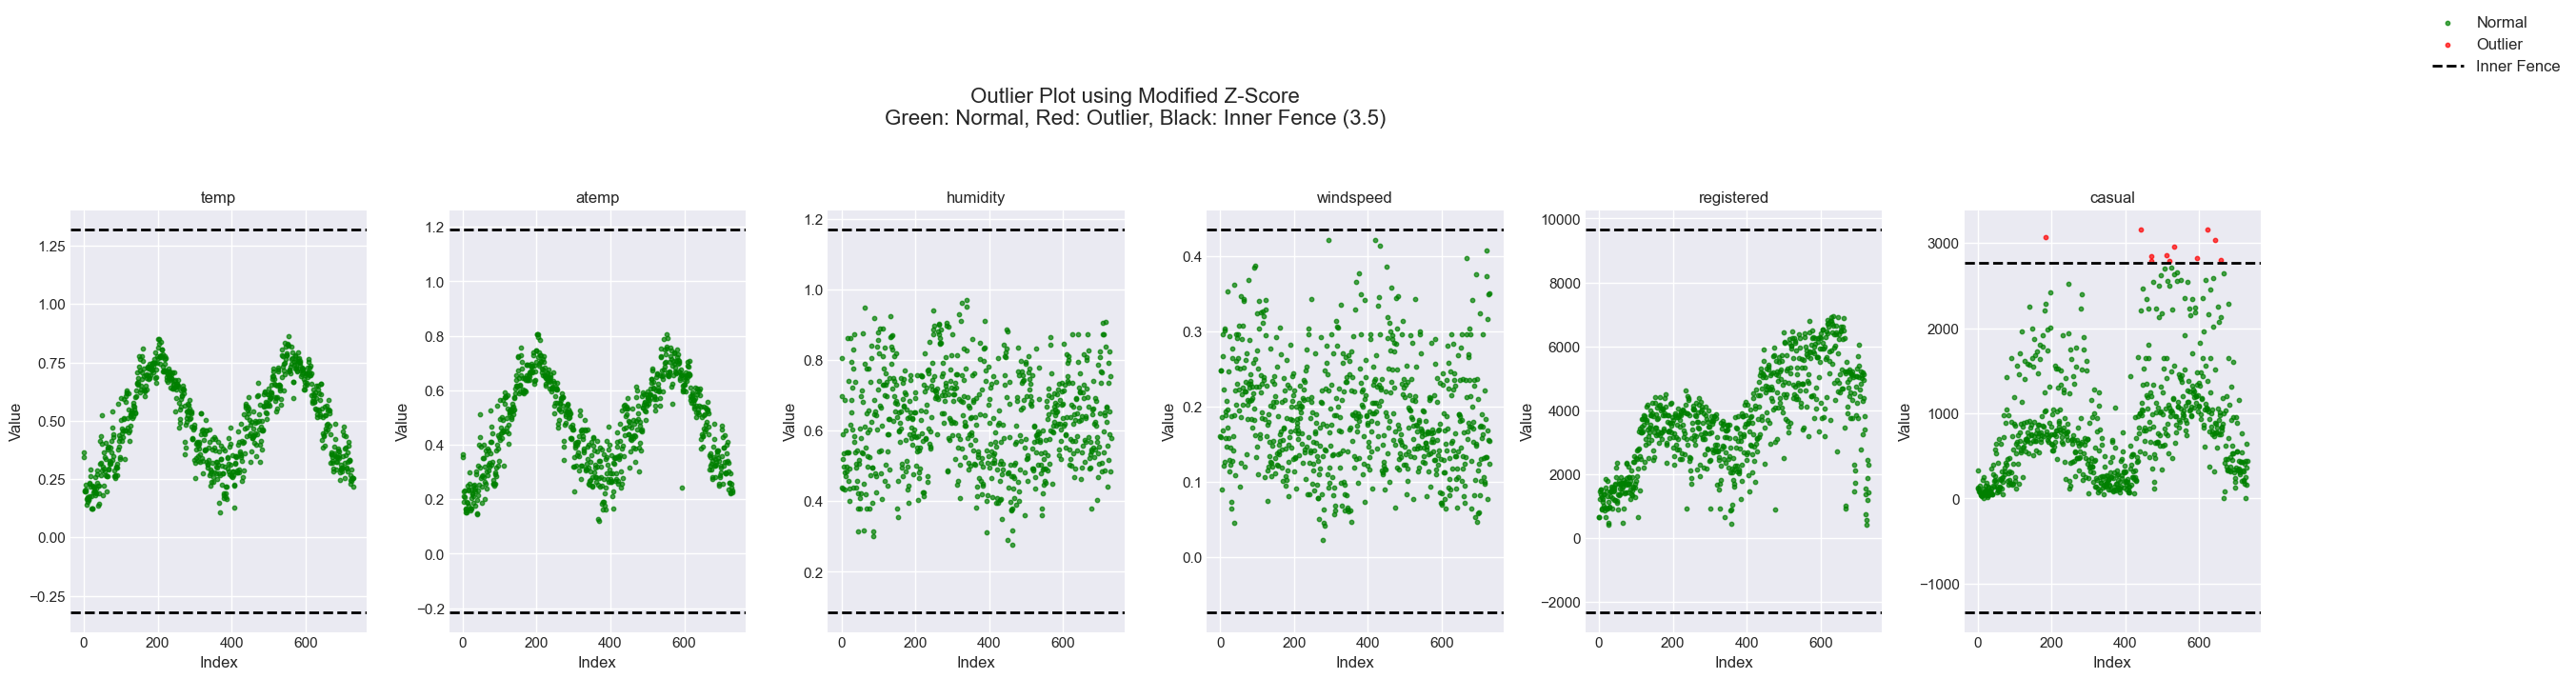

In [1432]:
plot_outliers(df, interval_inputs)

The plot showed the distribution of values for six features after applying modified Z-score based outlier handling. The black dashed lines represented the ±3.5 threshold (inner fences), while the green points represented normal values. Unlike the earlier plot, no red points are present, indicating that all previously detected outliers were successfully clipped within the defined bounds along with the outliers detected using OCSVM. This confirms that extreme values across all features (temp, atemp, humidity, windspeed, registered, and casual) have been effectively adjusted, resulting in a dataset free from statistical outliers according to the modified Z-score criterion.

## 3.2 Eliminate features with High Cardinality

In [1433]:
df.head()

record_id   datetime  season  year  month  holiday  weekday  workingday  \
0          1 2011-01-01       1     0      1        0        6           0   
1          2 2011-01-02       1     0      1        0        0           0   
2          3 2011-01-03       1     0      1        0        1           1   
3          4 2011-01-04       1     0      1        0        2           1   
4          5 2011-01-05       1     0      1        0        3           1   

   weather_condition      temp     atemp  humidity  windspeed  casual  \
0                  2  0.344167  0.363625  0.805833   0.160446     331   
1                  2  0.363478  0.353739  0.696087   0.248539     131   
2                  1  0.196364  0.189405  0.437273   0.248309     120   
3                  1  0.200000  0.212122  0.590435   0.160296     108   
4                  1  0.226957  0.229270  0.436957   0.186900      82   

   registered  bike_count  ocsvm_outlier  
0       654.0         985              1  
1       670.0         801              1  
2      1229.0        1349              1  
3      1454.0        1562              1  
4      1518.0        1600              1

In [1434]:
cardinality(df)

Feature  Unique Values
0                year              2
1             holiday              2
2          workingday              2
3       ocsvm_outlier              2
4   weather_condition              3
5              season              4
6             weekday              7
7               month             12
8                temp            497
9            humidity            584
10             casual            600
11          windspeed            638
12         registered            671
13              atemp            685
14         bike_count            696
15          record_id            731
16           datetime            731

In [1435]:
x = df.drop(columns=["record_id", "datetime", "ocsvm_outlier", "bike_count"])
y = df["bike_count"]
x.head()

season  year  month  holiday  weekday  workingday  weather_condition  \
0       1     0      1        0        6           0                  2   
1       1     0      1        0        0           0                  2   
2       1     0      1        0        1           1                  1   
3       1     0      1        0        2           1                  1   
4       1     0      1        0        3           1                  1   

       temp     atemp  humidity  windspeed  casual  registered  
0  0.344167  0.363625  0.805833   0.160446     331       654.0  
1  0.363478  0.353739  0.696087   0.248539     131       670.0  
2  0.196364  0.189405  0.437273   0.248309     120      1229.0  
3  0.200000  0.212122  0.590435   0.160296     108      1454.0  
4  0.226957  0.229270  0.436957   0.186900      82      1518.0

The dataset consists of a combination of categorical and interval features. After excluding record_id (unique identifier), datetime (high cardinality), and ocsvm_outlier (derived for outlier tracking), the remaining features include six categorical variables (year, holiday, workingday, weather_condition, season, weekday, month) and six interval variables (temp, atemp, humidity, windspeed, casual, registered). The target variable is bike_count. This refined feature set provides a balanced structure where categorical features can be encoded and interval features scaled or normalized for modeling.

## 3.3 Train-test Split

In [1436]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# print the shape of the training and testing sets
print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")


Training set shape: (548, 13)
Testing set shape: (183, 13)


The dataset is split into training and testing subsets using a 75:25 ratio, where 75% of the data is allocated for training and 25% for testing. This ensures that the model has sufficient data to learn underlying patterns while retaining a substantial portion for unbiased evaluation. The choice of 25% test size aligns with common project requirements for maintaining a balance between training efficiency and reliable performance assessment, providing a robust measure of how well the model generalizes to unseen data.

## 3.4 Data Cleaning

### 3.4.1 Handling Skewness and Kurtosis

The features **casual**, **temp**, **atemp**, and **weather_condition** exhibit skewness and kurtosis(explored in Data Understanding phase), which can negatively impact model performance if left unaddressed. To correct this, a power transformation will first be applied to these variables, as it effectively reduces skewness, compresses extreme values, and produces a distribution closer to normality. Once the power transformation is applied, a Min-Max scaling step can then be performed to normalize the features into a common range (typically [0,1]), ensuring consistent scaling across all variables. In this case, mix-max scaler will be only applied to 'casual' 'windspeed' and 'registered' feature as the remaining features were already normalised using min-max according to the dataset description. This sequential approach—log transformation followed by Min-Max scaling—both improves distributional symmetry and provides uniform feature scaling for model training.

In [1437]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer


def transform(x_df, features, method):
    """
    Apply a specified transformation (log or minmax) to selected interval features in a DataFrame,

    Args:
        x_df (pd.DataFrame): Input features.
        features (list of str): Columns to transform.
        method (str): "log" or "minmax".

    Returns:
        x_df (pd.DataFrame): Transformed features.
        summary_df (pd.DataFrame): Summary of transformation.
    """
    x_df = x_df.copy()
    summary_rows = []

    for col in x_df.columns:
        # Calculate the min, max, skew, and kurtosis before transformation
        min_before, max_before = x_df[col].min(), x_df[col].max()
        skew_before, kurt_before = x_df[col].skew(), x_df[col].kurtosis()
        transformation = None

        if col in features:
            if method == "power_yeo-johnson":
                # Apply power transformation
                x_df[col] = PowerTransformer(method='yeo-johnson').fit_transform(x_df[[col]])
            elif method == "minmax":
                # Apply Min-Max scaling to normalize the feature to [0, 1]
                x_df[col] = MinMaxScaler().fit_transform(x_df[[col]]).flatten()
            transformation = method  # Update transformation label

        min_after, max_after = x_df[col].min(), x_df[col].max()
        skew_after, kurt_after = x_df[col].skew(), x_df[col].kurtosis()

        summary_rows.append({
            "Feature": col,
            "Min Before": min_before,
            "Max Before": max_before,
            "Min After": min_after,
            "Max After": max_after,
            "Skew Before": skew_before,
            "Kurtosis Before": kurt_before,
            "Skew After": skew_after,
            "Kurtosis After": kurt_after,
            "Transformation": transformation if transformation else "Not applicable"
        })

    # Create a summary DataFrame from the collected rows
    summary_df = pd.DataFrame(summary_rows)

    # Apply green background to rows where transformation is applied
    def highlight_transformed(row):
        return ['background-color: green' if row['Transformation'] != "Not applicable" else '' for _ in row]

    drop_cols = (["Min Before", "Max Before", "Min After", "Max After"] 
                 if method == "power_yeo-johnson" else 
                 ["Skew Before", "Kurtosis Before", "Skew After", "Kurtosis After"])
    summary_df = summary_df.drop(columns=drop_cols)

    return x_df, summary_df.style.apply(highlight_transformed, axis=1)

In [1438]:
log_features = ["casual", 'windspeed']
x_train, train_log_df = transform(x_train, log_features, method="power_yeo-johnson")
x_test, test_log_df = transform(x_test, log_features, method="power_yeo-johnson")

train_log_df

The skewness and kurtosis analysis before and after transformation shows that most features were already within acceptable ranges and did not require adjustment. However, windspeed and casual exhibited significant skewness and kurtosis, which were corrected using the Power Yeo-Johnson transformation. This improved their distribution, reducing skewness close to zero and lowering kurtosis, making them more suitable for modeling while enhancing data normality and stability.

In [1439]:
summarize_interval_variables(x_train[interval_inputs])

Minimum      Maximum          Mean  Standard Deviation  \
temp          0.124548     0.861667  5.016289e-01            0.181366   
atemp         0.126275     0.806907  4.808817e-01            0.160542   
humidity      0.275833     0.962500  6.332899e-01            0.138063   
windspeed    -2.878866     2.513509 -2.820129e-16            1.000914   
registered  416.000000  6946.000000  3.692078e+03         1528.957565   
casual       -2.550655     2.232150 -3.889832e-17            1.000914   

            Skewness  Kurtosis  
temp       -0.105509 -1.116414  
atemp      -0.180992 -0.997471  
humidity    0.013064 -0.672205  
windspeed   0.018831 -0.352425  
registered  0.010939 -0.616899  
casual     -0.065074 -0.505356

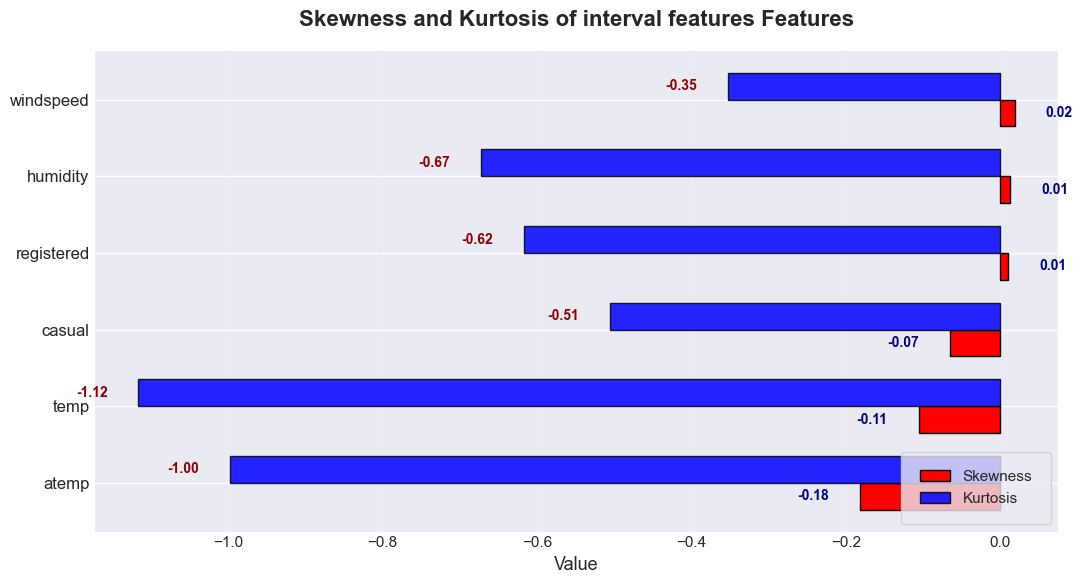

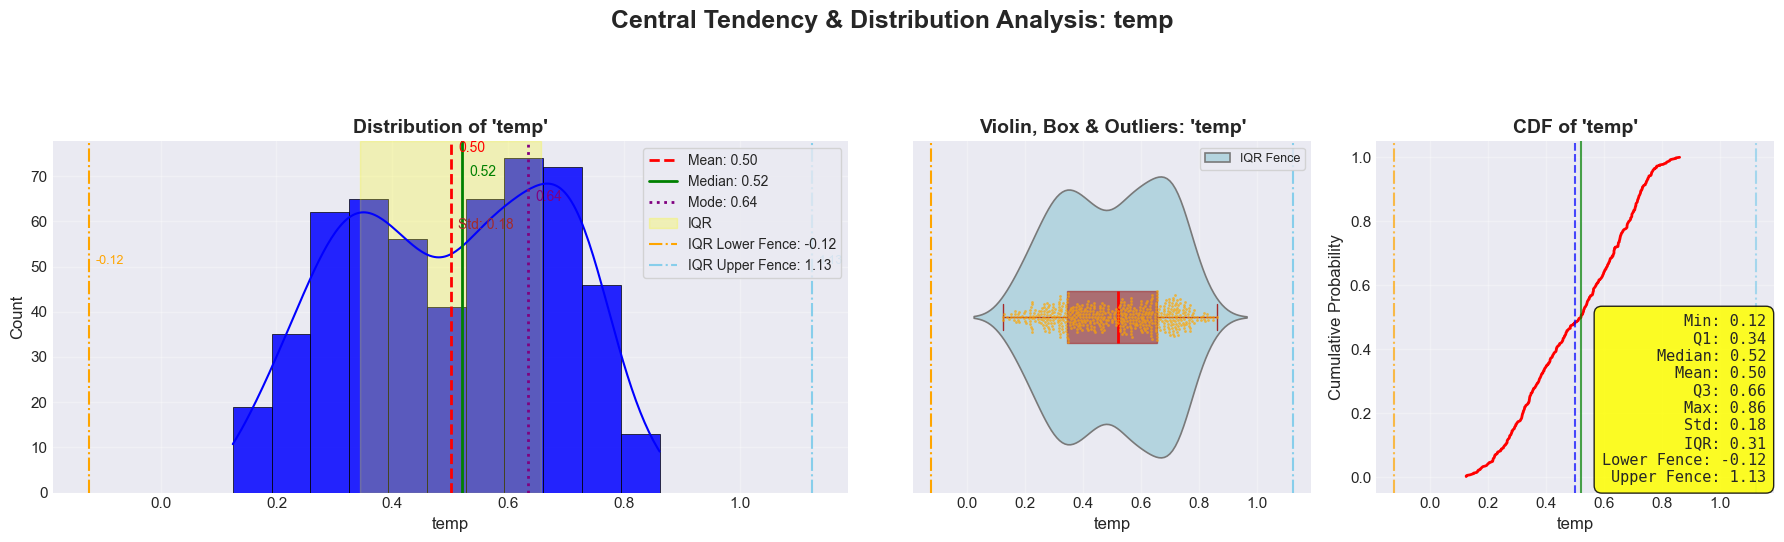

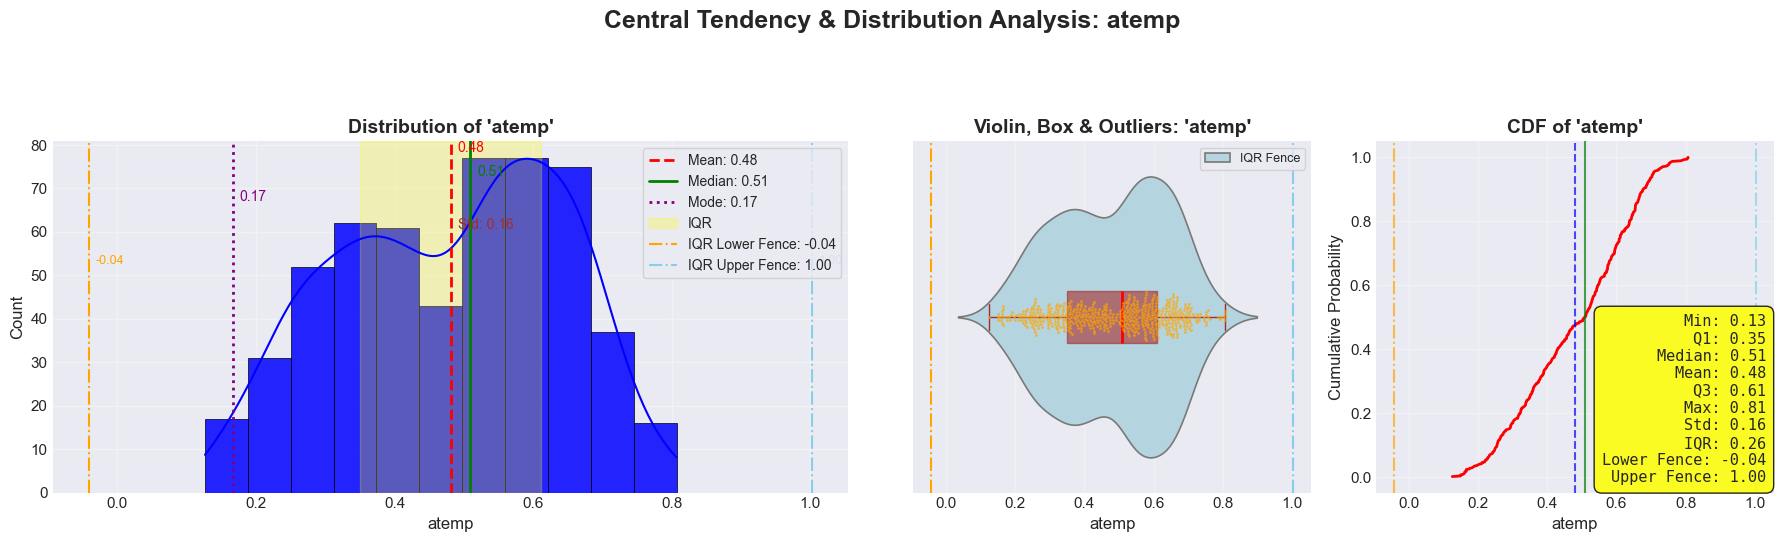

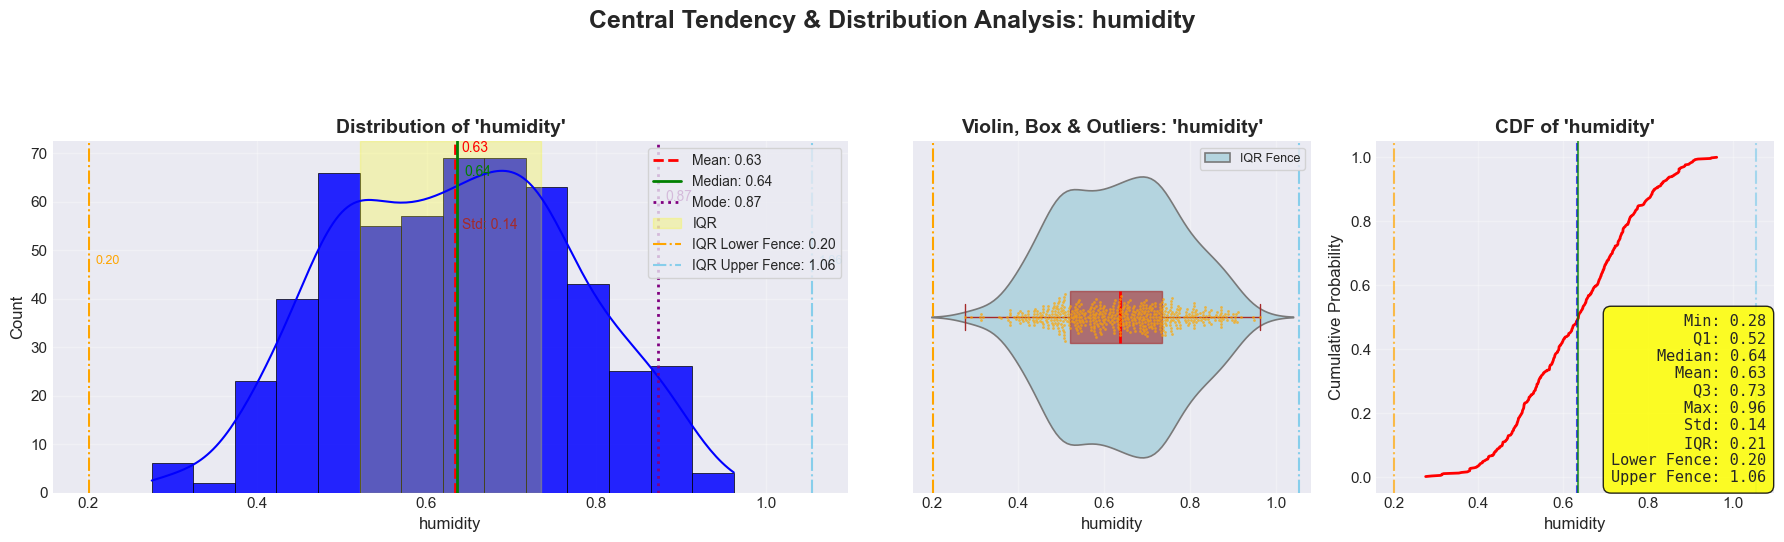

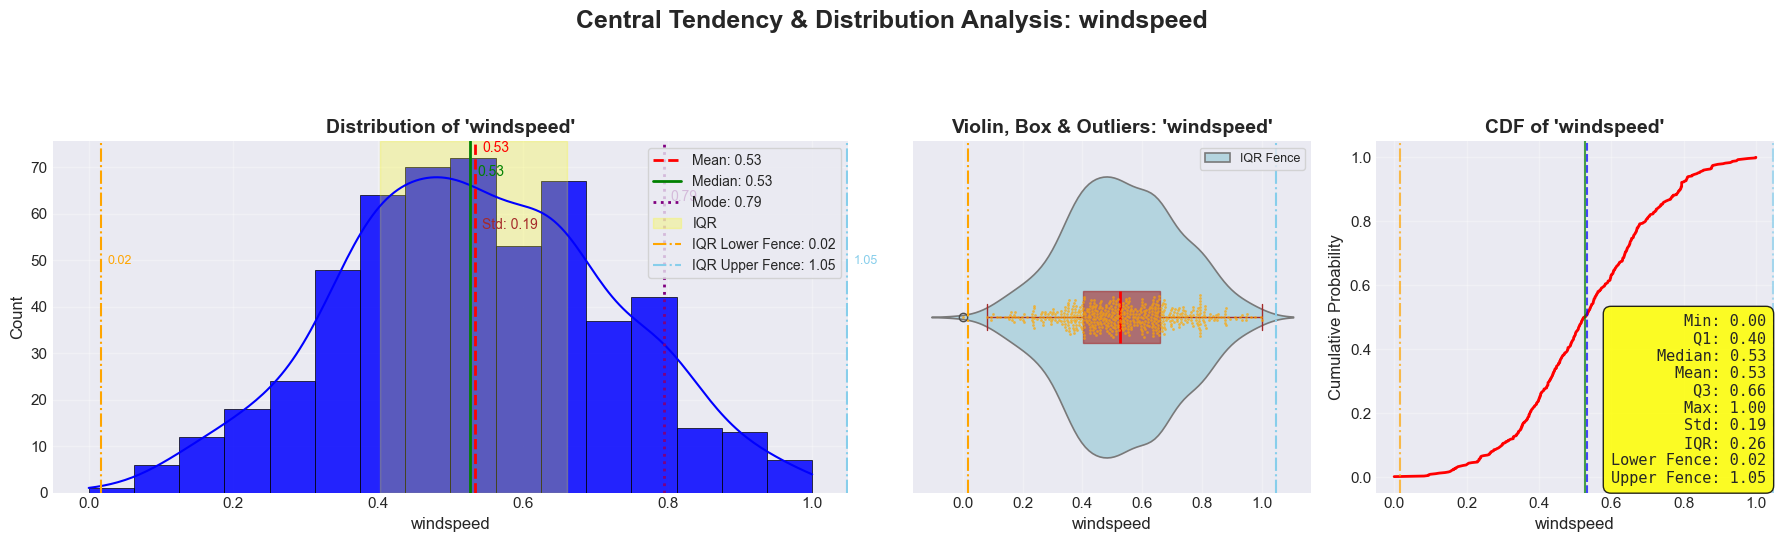

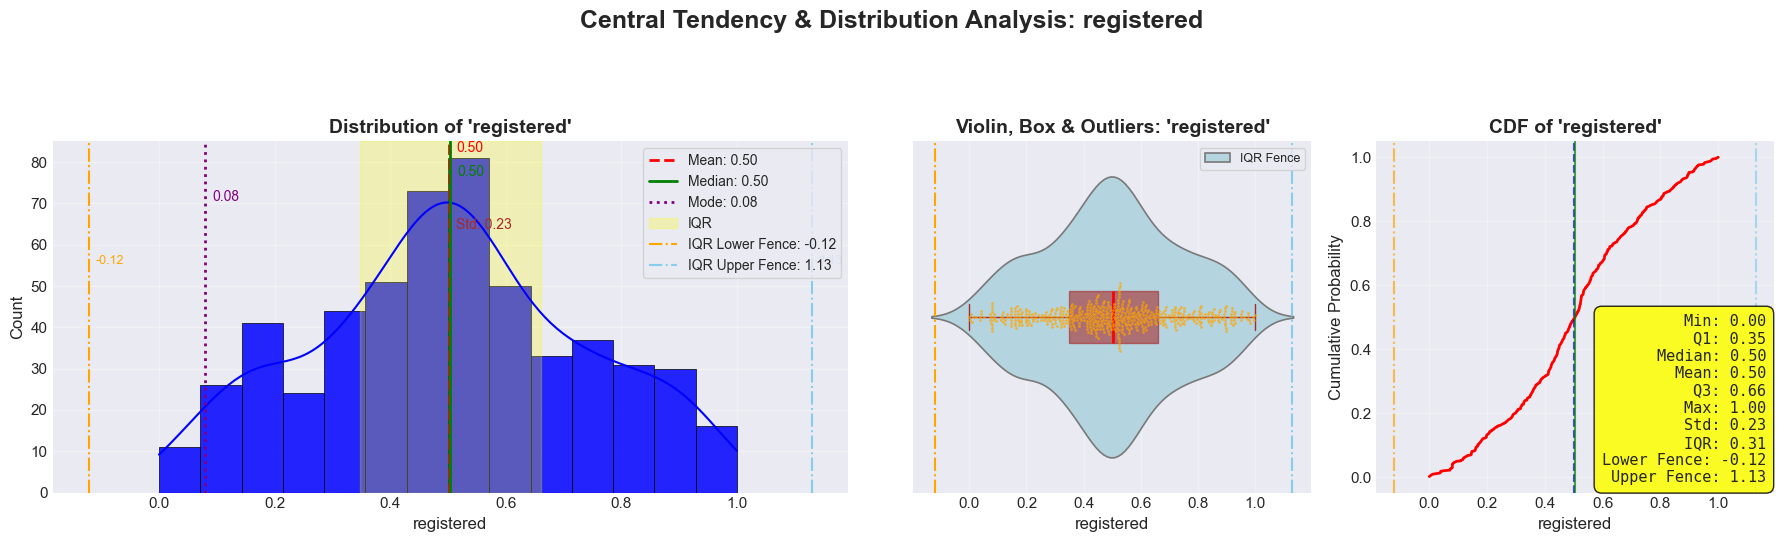

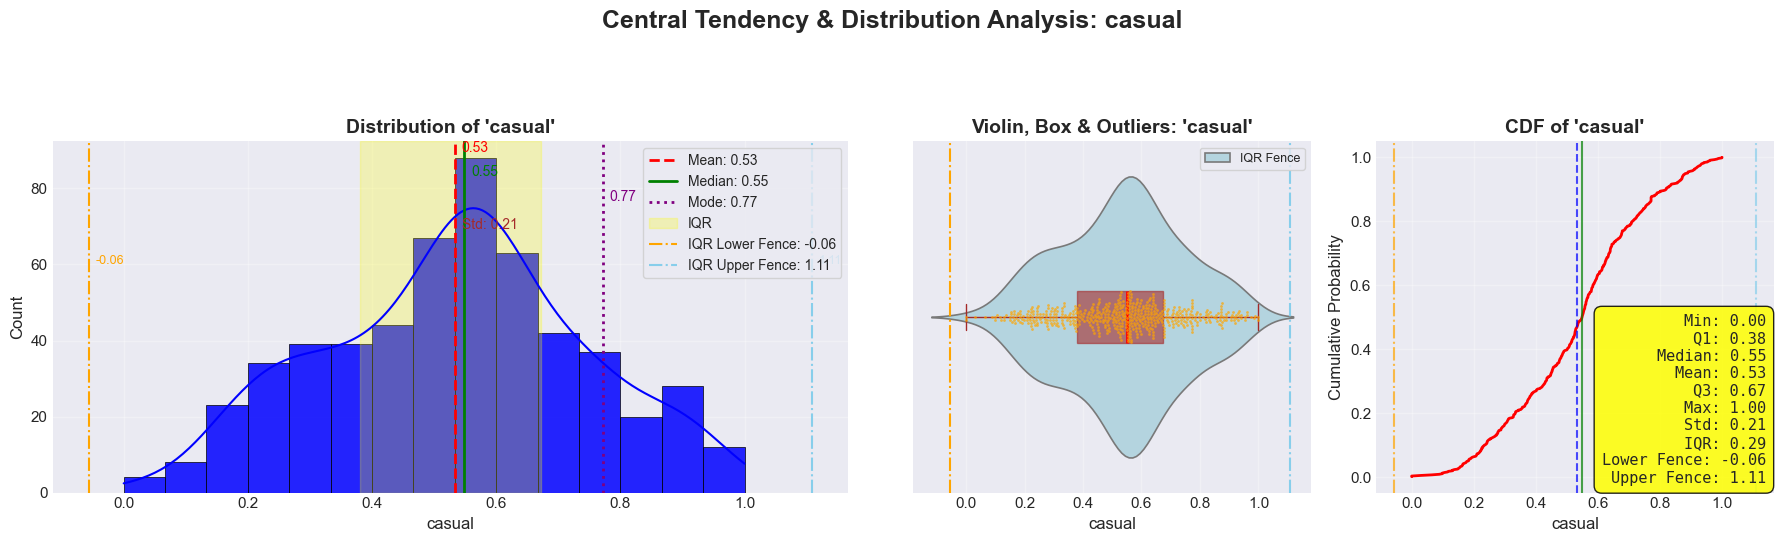

In [1451]:
plot_skewness_kurtosis(x_train[interval_inputs], "interval features")
plot_central_tendency(x_train, interval_inputs)

After applying the power transformer, both casual and windspeed distributions became closer to normal, reducing skewness and stabilizing variance. For casual, the mean (0.53), median (0.55), and mode (0.77) are now well aligned, with a narrower spread (Std: 0.21) and negligible outliers. Similarly, windspeed shows a balanced distribution with mean and median both at 0.53, reduced kurtosis, and a tighter spread (Std: 0.19). Overall, the transformation improved symmetry and normality, making these variables more suitable for modeling.

## 3.4.2 Overcome Imbalance Feature Scale

In [ ]:
# Define the features to be scaled using Min-Max scaling
minmax_features = ["casual", "registered", "windspeed"]

# Apply Min-Max scaling to the selected features in the training set
x_train, train_minmax_df = transform(x_train, minmax_features, method="minmax")

# Apply the same Min-Max scaling to the selected features in the test set
x_test, test_minmax_df = transform(x_test, minmax_features, method="minmax")

# Display the summary DataFrame showing the effect of Min-Max scaling
train_minmax_df

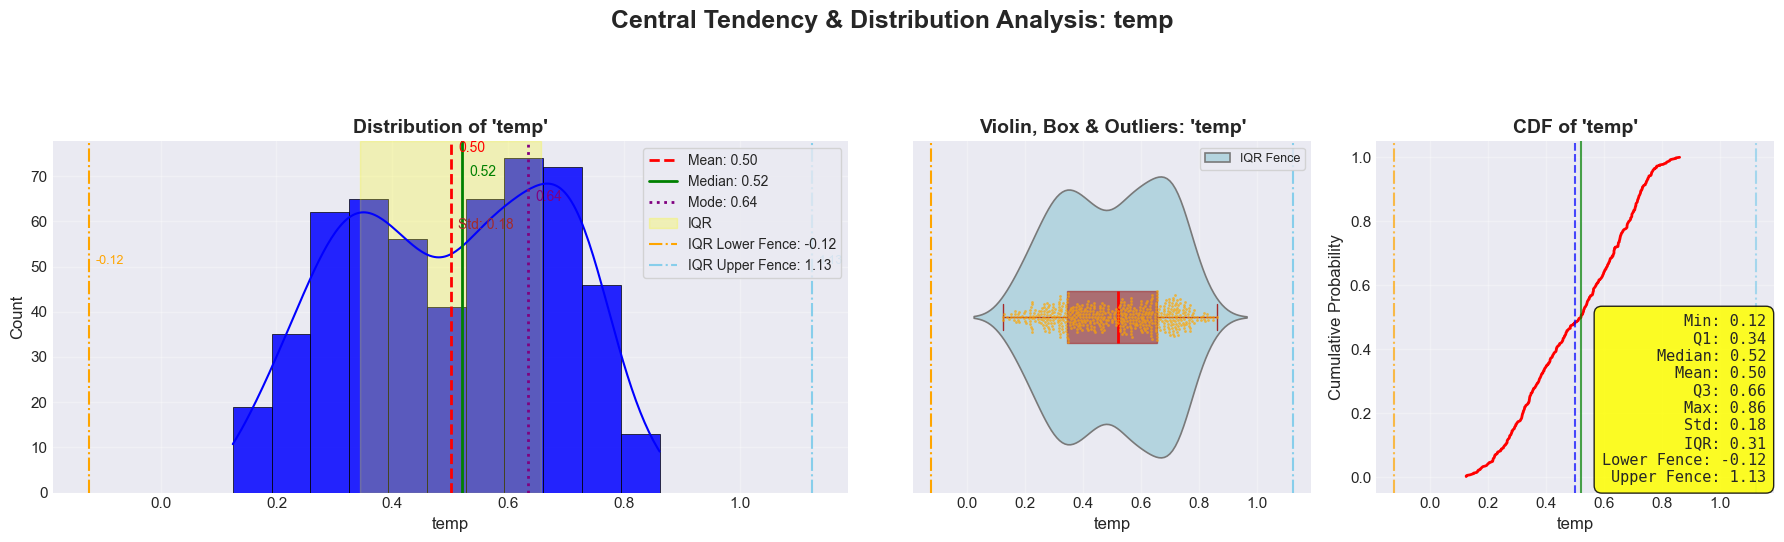

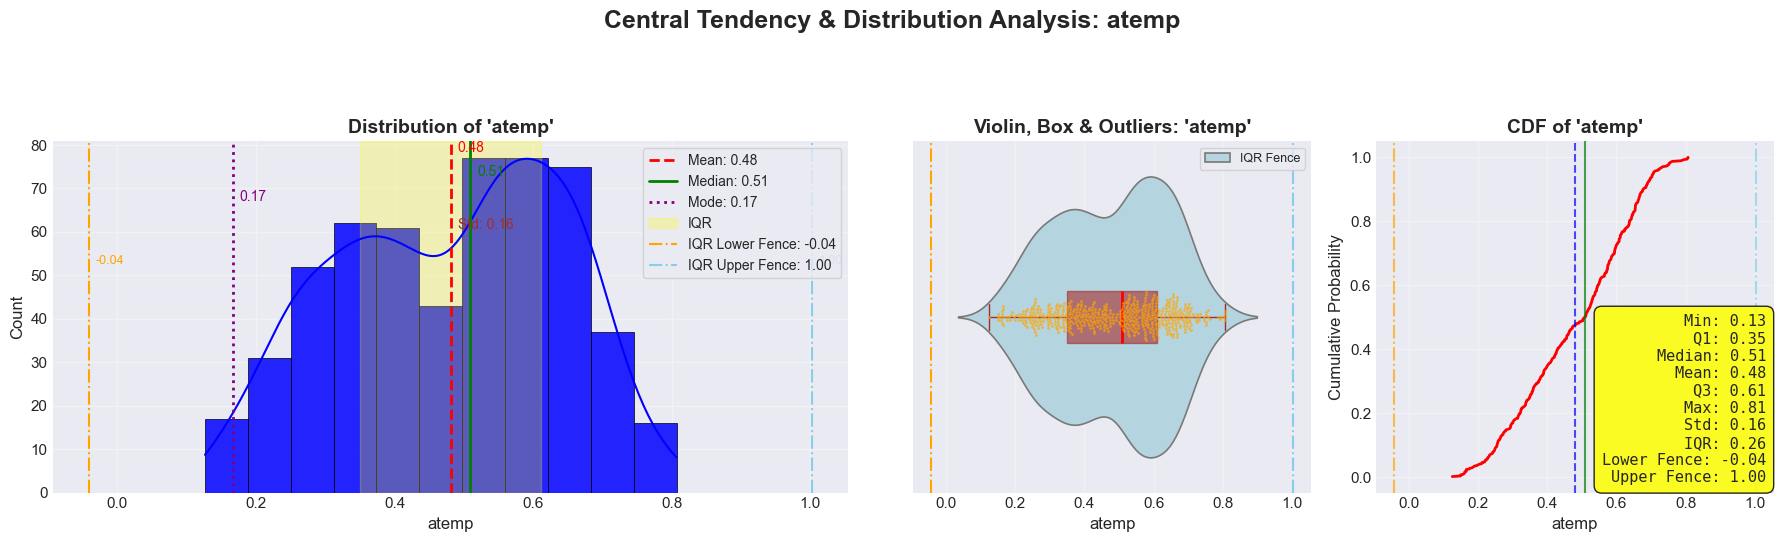

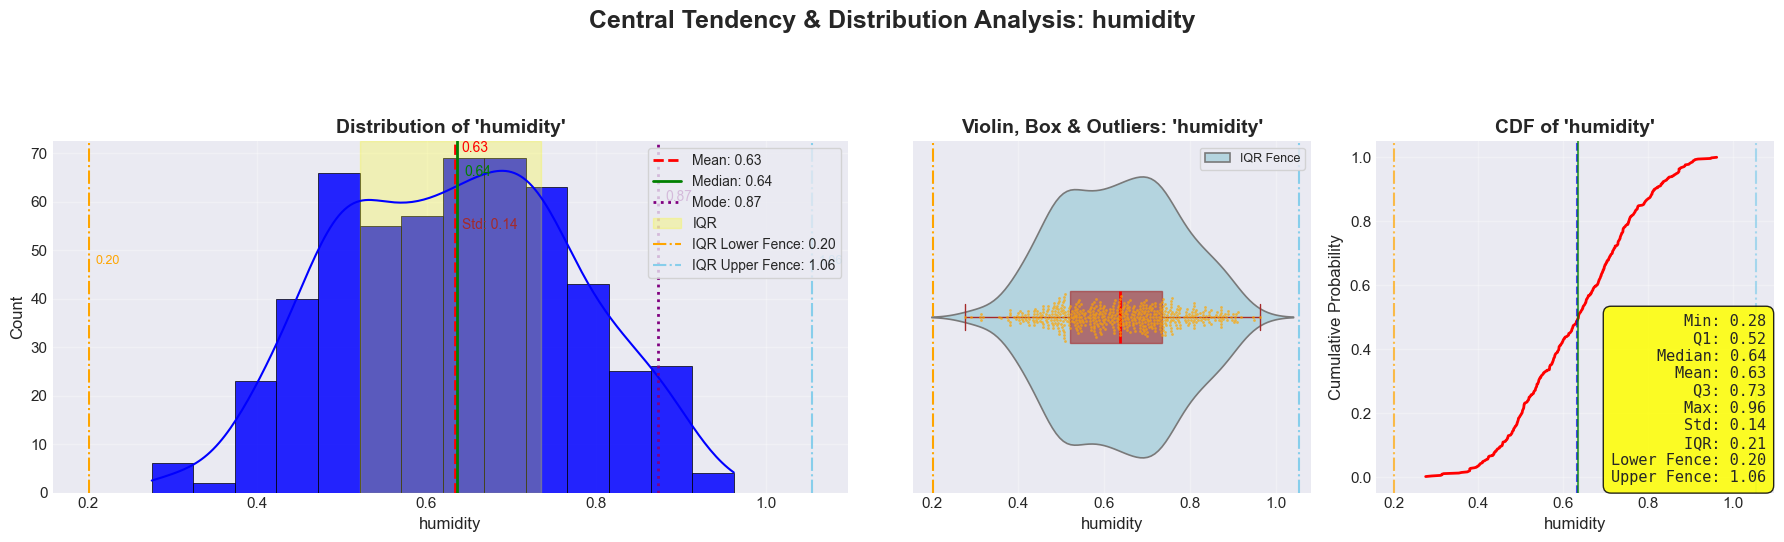

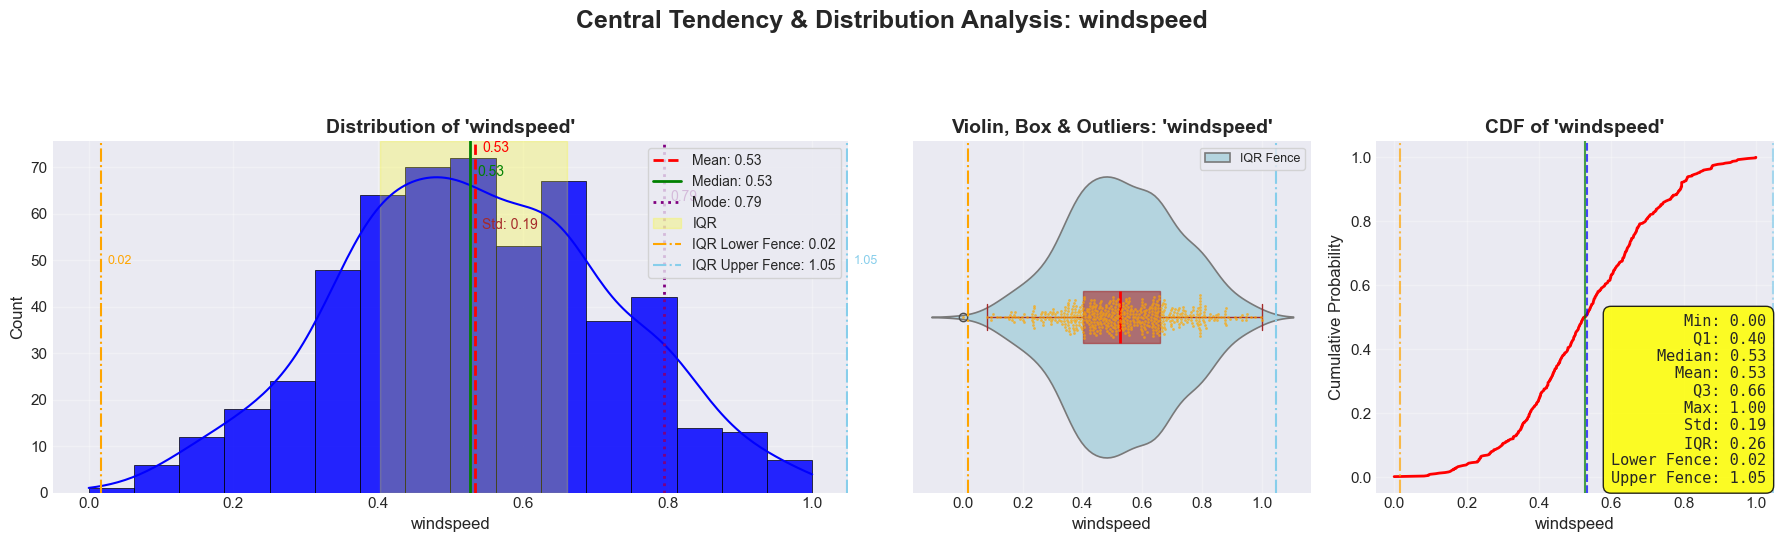

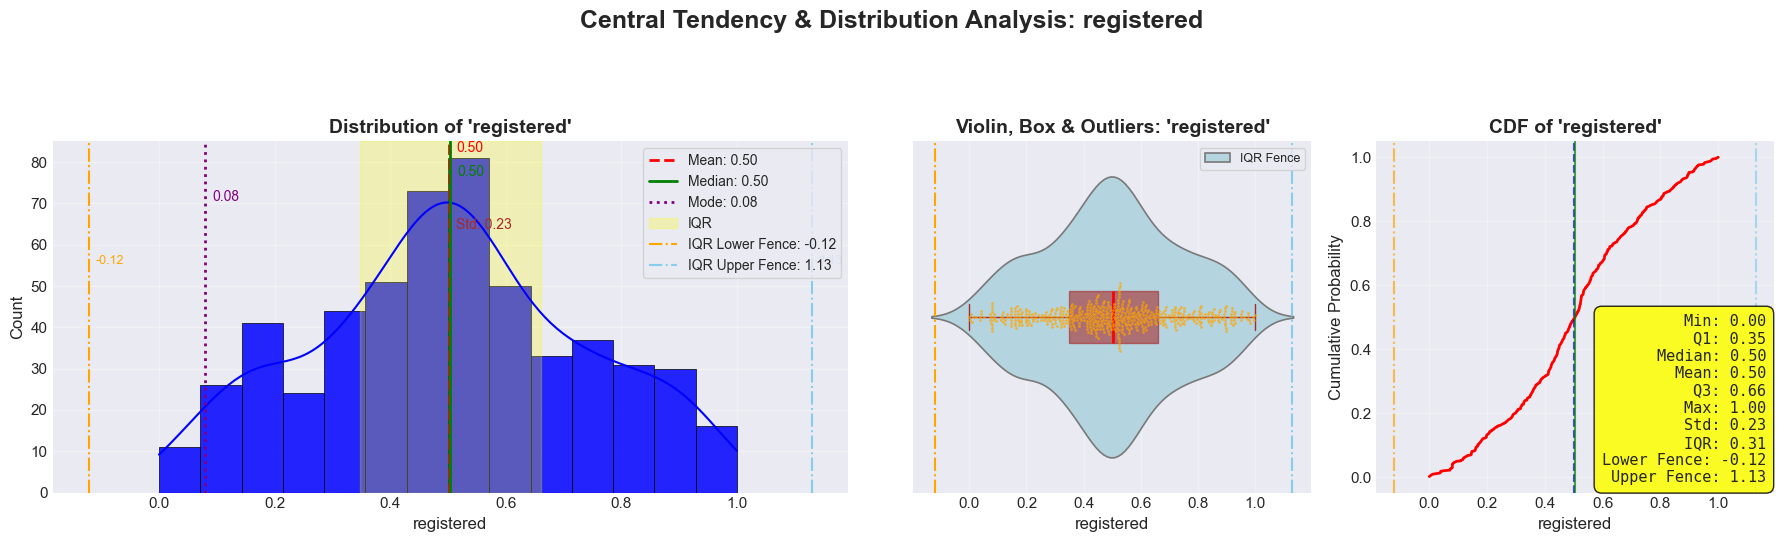

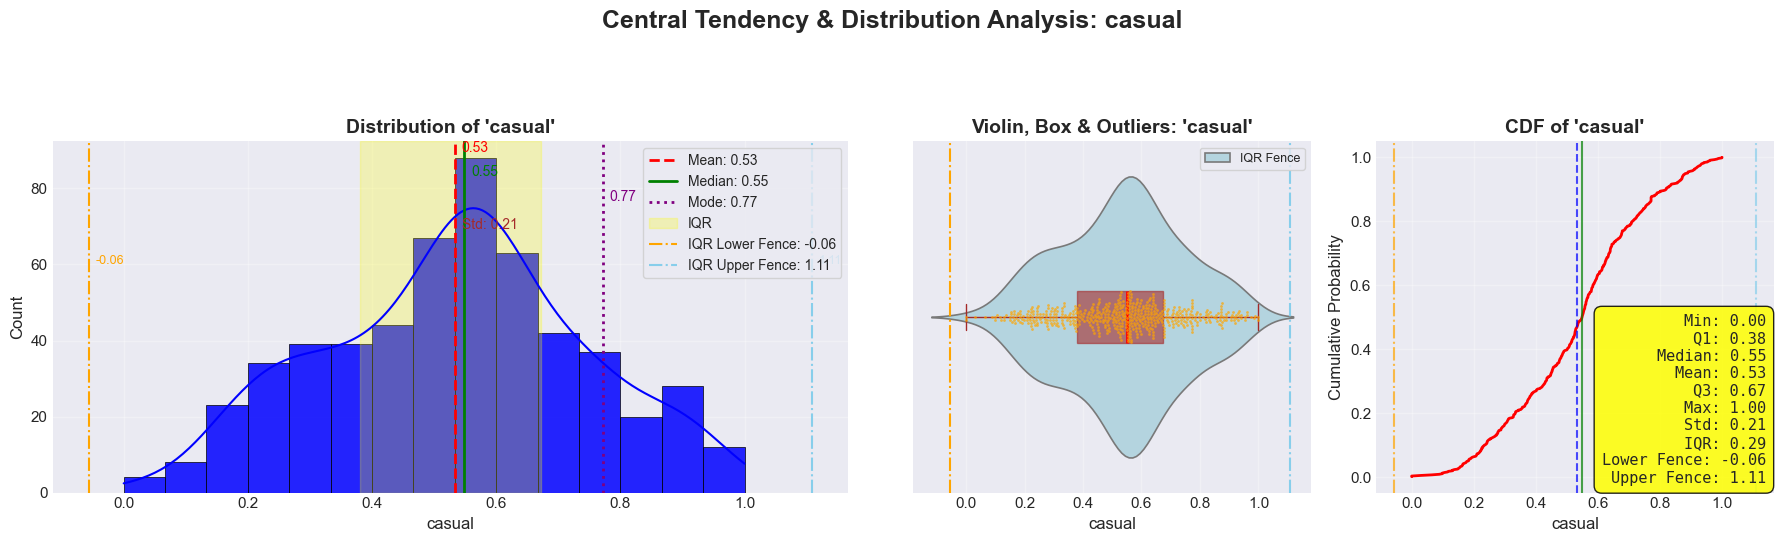

In [1452]:
plot_central_tendency(x_train, interval_inputs)

After applying Min-Max normalization to the windspeed and registered features, their distributions became comparable with the already normalized interval features. Both variables now range between 0 and 1, maintaining their original shapes but scaled to the same interval, ensuring consistency across all features. Windspeed shows a nearly symmetric distribution with mean and median around 0.53, while registered is also balanced around a mean and median of 0.50. This scaling standardizes feature magnitudes, preventing dominance of any single variable and improving model training stability and interpretability.

### 3.4.3 One-hot Encoding

One-hot encoding was applied to convert categorical features that were originally label-encoded into binary vectors, ensuring that the model does not assume any ordinal relationship among the categories.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding_df(X, categorical_cols, numeric_cols):
    """
    Apply One-Hot Encoding for all categorical columns and passthrough numeric columns.
    args:
        X: DataFrame to be encoded
        categorical_cols: List of categorical column names
        numeric_cols: List of numeric column names
    returns:
        DataFrame with appropriate column names
    """
    # Create a ColumnTransformer that applies OneHotEncoder to categorical columns and passes through numeric columns
    ct = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),  # One-hot encode categorical columns
            ("num", "passthrough", numeric_cols)  # Pass through numeric columns unchanged
        ],
        remainder="drop"  # Drop any columns not specified above
    )

    # Fit the transformer and transform the input DataFrame
    X_transformed = ct.fit_transform(X)

    # Get the names of the new one-hot encoded columns
    cat_names = ct.named_transformers_["cat"].get_feature_names_out(categorical_cols)
    # Combine the one-hot encoded column names with the numeric column names
    feature_names = np.concatenate([cat_names, numeric_cols])

    # Create a new DataFrame with the transformed data and appropriate column names
    X_df = pd.DataFrame(X_transformed, columns=feature_names, index=X.index)
    return X_df

# Apply one-hot encoding to the training set
x_train_encoded = one_hot_encoding_df(x_train, categorical_inputs, interval_inputs)
# Apply one-hot encoding to the test set
x_test_encoded = one_hot_encoding_df(x_test, categorical_inputs, interval_inputs)
# Display the first few rows of the encoded training set
x_train_encoded.head()

season_1  season_2  season_3  season_4  year_0  year_1  month_1  month_2  \
688       0.0       0.0       0.0       1.0     0.0     1.0      0.0      0.0   
649       0.0       0.0       0.0       1.0     0.0     1.0      0.0      0.0   
637       0.0       0.0       0.0       1.0     0.0     1.0      0.0      0.0   
525       0.0       1.0       0.0       0.0     0.0     1.0      0.0      0.0   
367       1.0       0.0       0.0       0.0     0.0     1.0      1.0      0.0   

     month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
688      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
649      0.0      0.0      0.0      0.0      0.0      0.0      0.0       1.0   
637      0.0      0.0      0.0      0.0      0.0      0.0      1.0       0.0   
525      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
367      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

     month_11  month_12  holiday_0  holiday_1  weekday_0  weekday_1  \
688       1.0       0.0        1.0        0.0        0.0        1.0   
649       0.0       0.0        1.0        0.0        0.0        0.0   
637       0.0       0.0        1.0        0.0        0.0        0.0   
525       0.0       0.0        1.0        0.0        0.0        0.0   
367       0.0       0.0        1.0        0.0        0.0        0.0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
688        0.0        0.0        0.0        0.0        0.0           0.0   
649        0.0        0.0        1.0        0.0        0.0           0.0   
637        0.0        0.0        0.0        0.0        1.0           1.0   
525        0.0        0.0        0.0        0.0        1.0           1.0   
367        1.0        0.0        0.0        0.0        0.0           0.0   

     workingday_1  weather_condition_1  weather_condition_2  \
688           1.0                  0.0                  1.0   
649           1.0                  1.0                  0.0   
637           0.0                  1.0                  0.0   
525           0.0                  1.0                  0.0   
367           1.0                  1.0                  0.0   

     weather_condition_3      temp     atemp  humidity  windspeed  registered  \
688                  0.0  0.380833  0.375621  0.623333   0.666077    0.709648   
649                  0.0  0.435000  0.431167  0.463333   0.535923    0.914650   
637                  0.0  0.542500  0.530296  0.542917   0.649057    0.849923   
525                  0.0  0.710833  0.648367  0.437083   0.432575    0.669832   
367                  0.0  0.150000  0.126275  0.441250   0.915165    0.265084   

       casual  
688  0.439671  
649  0.579734  
637  0.924632  
525  0.941191  
367  0.185645

In [1448]:
x_train_encoded.shape

(548, 38)

The dataset already exhibited multicollinearity issues, particularly between features such as temp and atemp or season and month. After applying one-hot encoding to categorical variables, the dimensionality further increased (resulting in 38 features), which not only expanded the feature space but also risked amplifying collinearity among derived dummy variables. This justified the application of PCA to reduce redundancy, compress correlated features, and retain the majority of the dataset’s variance while mitigating multicollinearity effects.

## 3.5 Data Selection
## 3.5.1 Handling Multicollinearity and Dimensionality Reduction

To address multicollinearity among features, Principal Component Analysis (PCA) was applied after one-hot encoding. The explained variance ratio and its cumulative plot were used to determine the contribution of each principal component. Based on this, the number of components required to retain 95% of the variance was selected, reducing the feature space while preserving most of the data’s information. This dimensionality reduction improved model efficiency by transforming correlated variables into independent principal components, thereby mitigating multicollinearity without significant loss of variance.

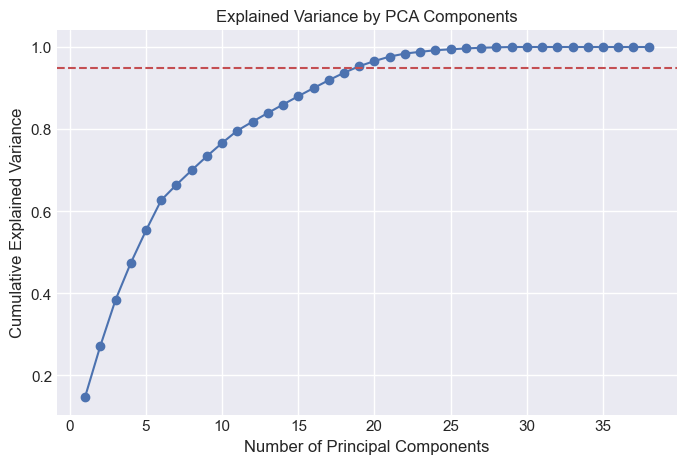

Original features: 38
Reduced features after PCA (95% variance): 19


In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with default parameters
pca = PCA()

# Fit the PCA model to the training data and transform both training and test data
X_train_pca = pca.fit_transform(x_train_encoded)
X_test_pca = pca.transform(x_test_encoded)

# Calculate the explained variance ratio
explained_var = pca.explained_variance_ratio_

# Plot the cumulative variance explained
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o')
# Add a horizontal line at 95% variance
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

# Keep components that explain 95% variance
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(x_train_encoded)
X_test_pca = pca.transform(x_test_encoded)

print(f"Original features: {x_train_encoded.shape[1]}")
print(f"Reduced features after PCA (95% variance): {X_train_pca.shape[1]}")

This plot shows the cumulative explained variance of the dataset after applying Principal Component Analysis (PCA). Initially, the dataset had 38 features, but PCA compresses the correlated information into fewer components while retaining most of the variance. From the curve, we see that about 19 principal components are enough to capture 95% of the total variance, effectively reducing dimensionality by half while minimizing information loss.

However, PCA comes with some cons:
- **Loss of interpretability**: Principal components are linear combinations of original features, making it harder to directly explain model results in terms of original variables.

- **Potential information loss**: Even though 95% variance is retained, some variability (5% here) is discarded, which could contain useful patterns.

- **Assumption of linearity**: PCA only captures linear correlations, so it may not fully handle complex nonlinear relationships.

## 3.5.2 Feature Selection

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
)
from sklearn.feature_selection import SelectFromModel, mutual_info_regression

# Use PCA-reduced features
feature_names = np.array([f"PC{i+1}" for i in range(X_train_pca.shape[1])])
X_arr = np.asarray(X_train_pca)
y_arr = np.asarray(y_train).ravel()

# Define a diverse set of regressors
models = {
    # ridgeCv with 25 alphas, 5 fold cross validation
    "RidgeCV": RidgeCV(alphas=np.logspace(-3, 3, 25), cv=5),
    # lassoCv with 100 alphas, 5 fold cross validation
    "LassoCV": LassoCV(cv=5, n_alphas=100, random_state=42, max_iter=10000),
    # regularization l1 with 7 ratios, 100 alphas, 5 fold cross validation
    "ElasticNetCV": ElasticNetCV(
        cv=5, l1_ratio=[.15, .3, .5, .7, .85, .95, 1.0],
        n_alphas=100, random_state=42, max_iter=10000
    ),
    # linearSVR with 1.0 C, 0.0 epsilon, squared_epsilon_insensitive loss, 20000 max_iter
    "LinearSVR": LinearSVR(
        C=1.0, epsilon=0.0, loss="squared_epsilon_insensitive",
        random_state=42, max_iter=20000
    ),
    # random forest with 600 estimators, n_jobs -1, max_features "sqrt"
    "RandomForest": RandomForestRegressor(
        n_estimators=600, random_state=42, n_jobs=-1, max_features="sqrt"
    ),
    #
    "ExtraTrees": ExtraTreesRegressor(
        n_estimators=600, random_state=42, n_jobs=-1, max_features="sqrt"
    ),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}


import time

def get_importance(estimator, X, y, names):
    """
    Fit model and return a normalized importance vector as a pandas Series.
    args:
        estimator: the model to fit
        X: the features to fit the model on
        y: the target to fit the model on
        names: the names of the features
    returns:
        s: the normalized importance vector as a pandas Series
        estimator: the fitted model
    """
    tic = time.time()
    estimator.fit(X, y)
    toc = time.time()

    # Linear models
    if hasattr(estimator, "coef_"):
        imp = np.abs(estimator.coef_).ravel()
    # Tree-based models
    elif hasattr(estimator, "feature_importances_"):
        imp = estimator.feature_importances_.ravel()
    else:
        raise ValueError(f"Estimator {type(estimator).__name__} has no importances.")

    # Normalize to [0,1] for comparability
    imp_min, imp_max = imp.min(), imp.max()
    imp_norm = (imp - imp_min) / (imp_max - imp_min + 1e-12)

    # Create a pandas Series with the normalized importance values and the estimator name
    s = pd.Series(imp_norm, index=names, name=type(estimator).__name__)
    print(f"{type(estimator).__name__} fitted in {toc - tic:.2f}s")
    return s, estimator


# initialize dictionaries to store the importances and the fitted models
all_imps = {}
fitted = {}
selected_by_model = {}

# fit the models and get the importances
for name, est in models.items():
    imps, fitted_est = get_importance(est, X_train_pca, y_train, feature_names)
    all_imps[name] = imps
    fitted[name] = fitted_est

    # Use SelectFromModel with median threshold 
    selector = SelectFromModel(fitted_est, threshold="median", prefit=True)
    # get the mask of the selected features
    mask = selector.get_support()
    selected_by_model[name] = feature_names[mask]


RidgeCV fitted in 3.69s
LassoCV fitted in 0.03s
ElasticNetCV fitted in 0.15s
LinearSVR fitted in 0.00s
RandomForestRegressor fitted in 0.43s
ExtraTreesRegressor fitted in 0.25s
GradientBoostingRegressor fitted in 0.30s


In [1519]:
# Mutual Information Importance
mi = mutual_info_regression(X_train_pca, y_train, random_state=42)
mi_norm = (mi - mi.min()) / (mi.max() - mi.min() + 1e-12)
all_imps["MutualInfo"] = pd.Series(mi_norm, index=feature_names, name="MutualInfo")


# build importance table + consensus + majority vote
imp_df = pd.DataFrame(all_imps)  # rows=features, cols=models(+MI)
# calculate the consensus score
imp_df["Consensus"] = imp_df.mean(axis=1)
imp_df = imp_df.sort_values("Consensus", ascending=False)

# Majority vote across model-based selectors
# exclude MutualInfo model for voting
vote_df = pd.DataFrame(
    {m: imp_df.index.isin(selected_by_model[m]) for m in models.keys()},
    index=imp_df.index
)

# calculate the majority vote
vote_counts = vote_df.sum(axis=1)
# calculate the majority cut (half of the models)
majority_cut = int(np.ceil(vote_df.shape[1] / 2.0)) 
majority_selected = vote_counts.index[vote_counts >= majority_cut]

print(f"\nMajority vote selected ({len(majority_selected)} features):")
print(list(majority_selected))



Majority vote selected (10 features):
['PC2', 'PC4', 'PC3', 'PC14', 'PC12', 'PC6', 'PC16', 'PC19', 'PC8', 'PC10']


`Note` 

The selected features (PC2, PC4, PC3, PC14, PC12, PC6, PC19, PC10, PC8, and PC16) represent principal components that are linear combinations of multiple original variables rather than individual features such as temp, season, or casual. While PCA effectively reduces dimensionality and resolves multicollinearity, it introduces a significant drawback in terms of interpretability, as the contribution of each original feature is blended across components, making it difficult to identify which real-world factors directly influence the model. This trade-off means the model becomes more efficient and less redundant, but less transparent and harder to explain in practical terms.

<Figure size 1400x800 with 0 Axes>

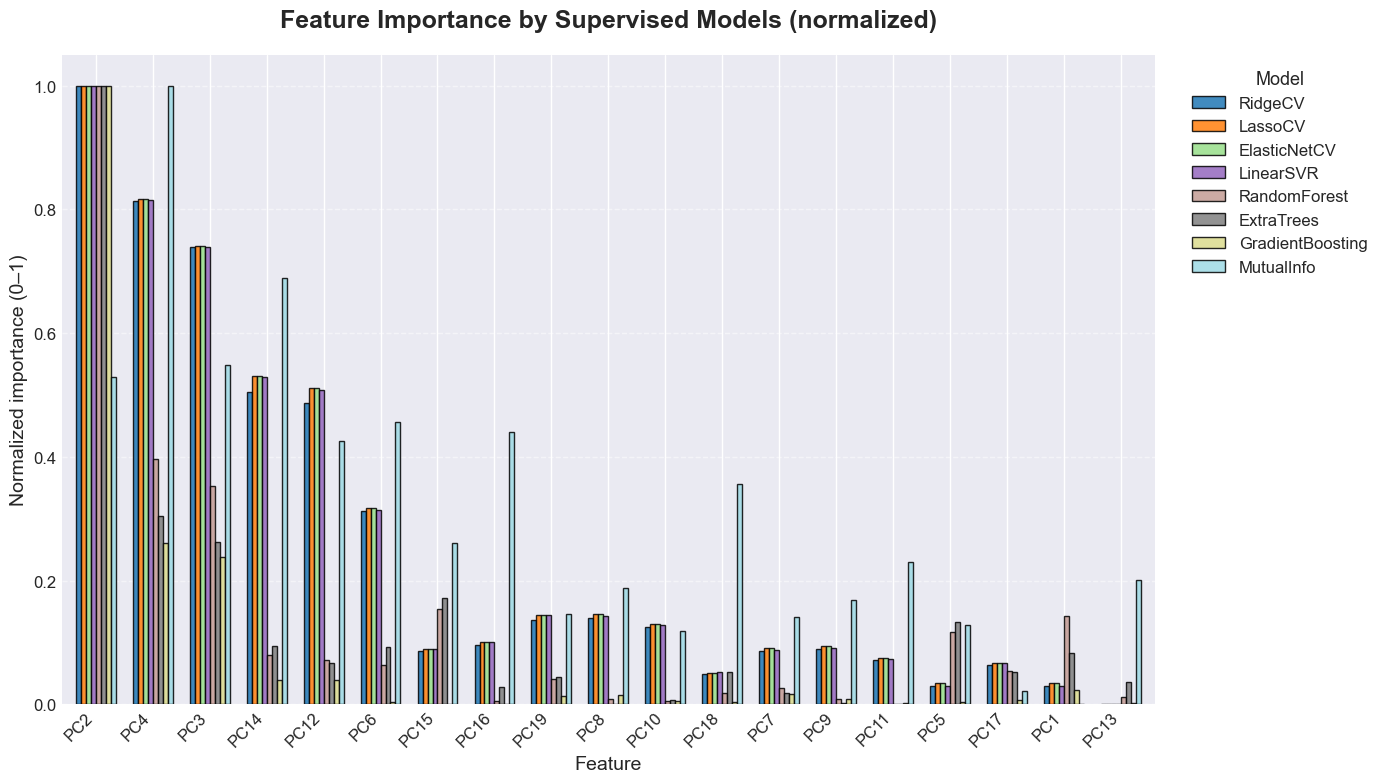

In [1520]:
# Feature Importance by Supervised Models (normalized)
top_k = min(20, imp_df.shape[0])  # show up to 20 features
plot_models = list(models.keys()) + ["MutualInfo"]  # columns to show in grouped chart

# plot the top 20 features by consensus
plot_df = imp_df[plot_models].head(top_k)

# 
plt.figure(figsize=(14, 8))
ax = plot_df.plot(
    kind="bar", 
    width=0.7, 
    edgecolor='black', 
    alpha=0.85, 
    colormap="tab20", 
    figsize=(14, 8)
)
plt.title("Feature Importance by Supervised Models (normalized)", fontsize=18, fontweight='bold', pad=20)
plt.ylabel("Normalized importance (0–1)", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False, fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()



This bar chart shows the normalized feature importance of PCA components (PCs) as determined by different supervised models. The x-axis lists the principal components (PCs), while the y-axis shows their relative importance scaled between 0 and 1.

From the plot, PC2, PC4, and PC3 consistently rank as the most important features across nearly all models, followed by PC14 and PC12, indicating they capture the most predictive variance for the target. Tree-based methods (RandomForest, ExtraTrees, GradientBoosting) and linear models (Ridge, Lasso, ElasticNet, SVR) broadly agree on the ranking, while Mutual Information shows more spread across many PCs, suggesting it captures non-linear dependencies. Overall, this confirms that a small subset of components drives most predictive power, while the rest contribute marginally.

In [1494]:
# copy importance table to rank table
rank_table = imp_df.copy()

# calculate the rank of the features by consensus, and sort by rank and consensus
rank_table["Rank"] = rank_table["Consensus"].rank(ascending=False, method="dense").astype(int)
rank_table = rank_table.sort_values(["Rank", "Consensus"])
print("Top features by consensus:")
rank_table.head(20).T

Top features by consensus:


PC2       PC4       PC3      PC14      PC12       PC6  \
RidgeCV           1.0  0.812993  0.738543  0.505424  0.487865  0.312549   
LassoCV           1.0  0.816843  0.740446  0.530569  0.510751  0.317302   
ElasticNetCV      1.0  0.816843  0.740446  0.530569  0.510751  0.317302   
LinearSVR         1.0  0.815785  0.739165  0.528660  0.508893  0.314319   
RandomForest      1.0  0.396662  0.352803  0.079662  0.071440  0.063799   
ExtraTrees        1.0  0.304089  0.262988  0.094285  0.066881  0.092617   
GradientBoosting  1.0  0.260277  0.238847  0.039359  0.039782  0.003422   
MutualInfo        1.0  0.689951  0.548850  0.187811  0.141939  0.456104   
Consensus         1.0  0.614180  0.545261  0.312042  0.292288  0.234677   
Rank              1.0  2.000000  3.000000  4.000000  5.000000  6.000000   

                      PC15       PC1      PC19        PC5       PC17  \
RidgeCV           0.086229  0.029978  0.136184   0.030532   0.064204   
LassoCV           0.090415  0.034405  0.143842   0.034534   0.067198   
ElasticNetCV      0.090415  0.034405  0.143842   0.034534   0.067198   
LinearSVR         0.090273  0.029566  0.144605   0.030384   0.067430   
RandomForest      0.154669  0.143081  0.041407   0.116694   0.054444   
ExtraTrees        0.171565  0.082443  0.044022   0.134004   0.052888   
GradientBoosting  0.000927  0.022816  0.013043   0.003498   0.007142   
MutualInfo        0.440085  0.529593  0.201365   0.426047   0.356726   
Consensus         0.140572  0.113286  0.108539   0.101278   0.092154   
Rank              7.000000  8.000000  9.000000  10.000000  11.000000   

                        PC7       PC10        PC8       PC16        PC9  \
RidgeCV            0.087073   0.124918   0.140261   0.095463   0.089927   
LassoCV            0.091220   0.130079   0.145631   0.100145   0.094152   
ElasticNetCV       0.091220   0.130079   0.145631   0.100145   0.094152   
LinearSVR          0.088717   0.128124   0.143384   0.100143   0.091978   
RandomForest       0.026298   0.005018   0.008512   0.005507   0.008064   
ExtraTrees         0.019221   0.007087   0.001335   0.028034   0.002717   
GradientBoosting   0.016798   0.004805   0.015495   0.000000   0.009381   
MutualInfo         0.260515   0.128848   0.000000   0.168965   0.146855   
Consensus          0.085133   0.082370   0.075031   0.074800   0.067153   
Rank              12.000000  13.000000  14.000000  15.000000  16.000000   

                       PC18       PC11       PC13  
RidgeCV            0.049403   0.071226   0.000000  
LassoCV            0.051416   0.074931   0.000000  
ElasticNetCV       0.051416   0.074931   0.000000  
LinearSVR          0.052131   0.073202   0.000000  
RandomForest       0.017955   0.000000   0.012680  
ExtraTrees         0.052196   0.000000   0.036932  
GradientBoosting   0.003160   0.002937   0.003093  
MutualInfo         0.231002   0.021980   0.118884  
Consensus          0.063585   0.039901   0.021449  
Rank              17.000000  18.000000  19.000000

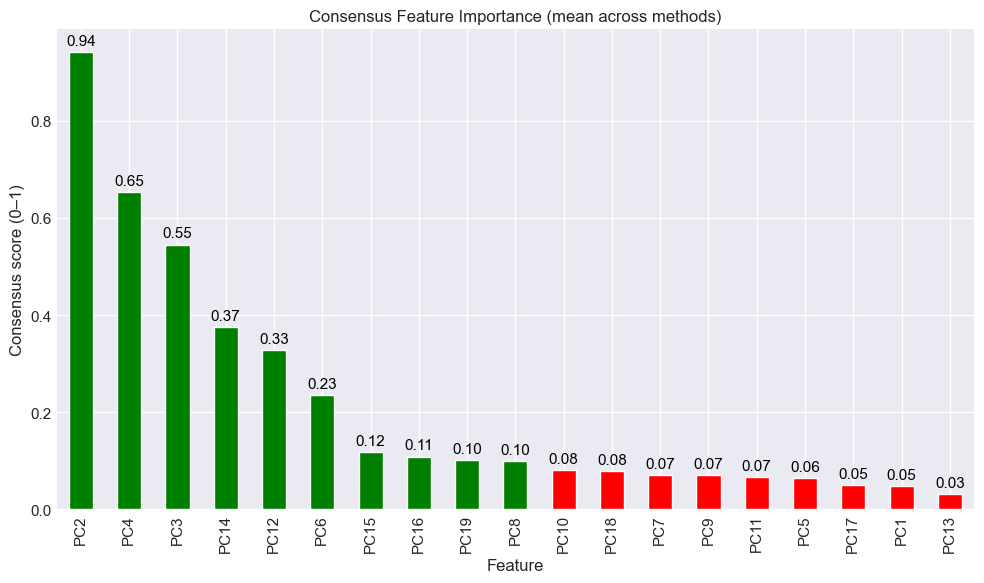

In [1513]:
plt.figure(figsize=(10, 6))
consensus_vals = imp_df["Consensus"].head(top_k)
colors = ['green' if i < 10 else 'red' for i in range(len(consensus_vals))]
ax = consensus_vals.plot(kind="bar", color=colors)
plt.title("Consensus Feature Importance (mean across methods)")
plt.ylabel("Consensus score (0–1)")
plt.xlabel("Feature")
# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 3), textcoords='offset points')
plt.tight_layout()
plt.show()

The top 10 PCA features ranked by consensus importance were shown in the above plot. Among them, PC2, PC4, and PC3 are by far the most influential, carrying the bulk of predictive power. PC14, PC12, and PC6 provide moderate contributions, while PC15, PC1, PC19, and PC5 offer smaller but still meaningful impact. Together, these top 10 features capture most of the useful variance and represent the core drivers for the model, making them the best candidates for reducing dimensionality without sacrificing performance.

In [1518]:
def get_feature_index(feature_selected_by_model, consensus_importance):
    common_features = set(consensus_importance) & set(feature_selected_by_model)
    return [int(i.replace("PC", "")) for i in common_features]  

# Example usage
print(f"features selected both by model and consensus: PC --> {get_feature_index(majority_selected, imp_df.index[:10])}")


features selected both by model and consensus: PC --> [14, 2, 19, 6, 4, 12, 3, 16, 8]


The final selected features, identified as principal components [14, 2, 19, 6, 4, 12, 3, 16, 8], represent the intersection between the majority-vote model selection and the top consensus-ranked components. This overlap ensures that the chosen features are not only consistently important across multiple supervised models but also hold strong relevance in the consensus analysis, thereby providing a robust and reliable reduced feature set for downstream modeling while preserving predictive power and minimizing redundancy.